# Exploración
## Plan
* Leer un archivo
* Validar como unir todos los archivos
* Filtrar los Code necesarios


* Explorar comportamiento
* Predecir serie de tiempo
* Regresión GeoEspacial


* Clasificar tipos de variables

* Linea 11 con promblemas en columnas

# Conclusiones
* Poca información de estas variables: LOCALIDAD, MUNICIPIO, DEPARTAMENTO, SITIO, REGIONAL, LATITUD, LONGITUD, TIPOAFECTACION
* Pedir información de Geo
* Eliminar duplicados

### Preguntas
* Significado y comportamiento de cada variable  (como inpretar los nulos)
* porque hay registros duplicados son eventos diferentes? o es el mismo

* Estado de la integración (estimado de tiempo) (confirmar sin retroactivo)
* Conexión a las fuentes de información
* Otras fuentes de información

* como funciona la recoleccion de Netcool (First Ocurrence)

## Filtros

* AGENT =BOSSC
* Codigo de Alarma

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import contextily
#import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
##Modelos
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
#from fbprophet import Prophet
from croston import croston
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [538]:
from datetime import timedelta
from lightgbm import LGBMClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve #roc_curve
from sklearn.metrics import roc_auc_score #auc

In [839]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", -1)

C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\2336295311.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [168]:
df= pd.read_csv(f'netcool_new/alarms_ml_20220222090004.txt',sep=';', engine='python',error_bad_lines=False)

C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\2523973896.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df= pd.read_csv(f'netcool_new/alarms_ml_20220222090004.txt',sep=';', engine='python',error_bad_lines=False)


EmptyDataError: No columns to parse from file

In [169]:
df

IDENTIFIER  \
11     5.160.26.201 | 1012 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 19240466     
245    5.207.78.56 | 9334 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 19240468      
326    5.207.11.144 | 891 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5             
346    5.161.13.222 | 1012 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 19240472     
347    5.207.78.56 | 9334 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 19240473      
...                                                                                             ...      
27220  5.15.72.133 | 975 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4              
27233  5.107.77.245 | 1012 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5            
27311  172.27.155.39 | 2934 | Optical Nodes | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 19240969   
27392  5.65.3.101 | 1012 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5              
27429  5.246.41.45 | 3304 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 19240972      

                NODE  AGENT  SEVERITY  \
11     5.160.26.201   BOSSC  0          
245    5.207.78.56    BOSSC  0          
326    5.207.11.144   BOSSC  0          
346    5.161.13.222   BOSSC  0          
347    5.207.78.56    BOSSC  0          
...            ...      ... ..          
27220  5.15.72.133    BOSSC  4          
27233  5.107.77.245   BOSSC  5          
27311  172.27.155.39  BOSSC  0          
27392  5.65.3.101     BOSSC  5          
27429  5.246.41.45    BOSSC  0          

                                                                           SUMMARY  \
11     Site Recovered     MAC: 0090EA07403B   Voltage:  -5:0                         
245    Battery on Normal Mode     MAC: 0090EA07ACF7   Voltage:  37.80                
326    Site Faulted     MAC: 0090EA11AD39   Voltage:  -5:0                           
346    Site Recovered     MAC: 0090EA05F709   Voltage:  -5:0                         
347    Battery on Normal Mode     MAC: 0090EA07ACF7   Voltage:  37.80                
...                                                               ...                
27220  Major Discrete Alarm For Major Alarm     MAC: 0090EA03114D   Voltage:  -5:0   
27233  Site Faulted     MAC: 0090EA07A7F7   Voltage:  -5:0                           
27311  Site Recovered     MAC: 001AC3FF5302   Voltage:  -5:0                         
27392  Site Faulted     MAC: 00030814066C   Voltage:  -5:0                           
27429  Site Recovered     MAC: 000BC9149316   Voltage:  -5:0                         

           FIRSTOCCURRENCE       LASTOCCURRENCE  TYPE  TALLY LOCATION  \
11     2022-02-18 02:32:18  2022-02-18 02:32:18  2     1      NaN       
245    2022-02-18 02:32:24  2022-02-18 02:32:24  2     1      NaN       
326    2022-02-18 02:32:25  2022-02-18 02:32:25  1     1      NaN       
346    2022-02-18 02:32:26  2022-02-18 02:32:26  2     1      NaN       
347    2022-02-18 02:32:26  2022-02-18 02:32:26  2     1      NaN       
...                    ...                  ... ..    ..      ...       
27220  2022-02-18 02:45:02  2022-02-18 02:45:02  1     1      NaN       
27233  2022-02-18 02:45:02  2022-02-18 02:45:02  1     1      NaN       
27311  2022-02-18 02:45:08  2022-02-18 02:45:08  2     1      NaN       
27392  2022-02-18 02:45:09  2022-02-18 02:45:09  1     1      NaN       
27429  2022-02-18 02:45:11  2022-02-18 02:45:11  2     1      NaN       

                DELETEDATE ENRICHED     STATUS LOCALIDAD    MUNICIPIO  \
11     2022-02-18 02:35:24  NaN      NaN        NaN       NaN           
245    2022-02-18 02:35:24  NaN      NaN        NaN       NaN           
326    2022-02-18 02:39:25  Y        OPERATING  NaN       GIRARDOT      
346    2022-02-18 02:35:24  NaN      NaN        NaN       NaN           
347    2022-02-18 02:35:24  NaN      NaN        NaN

In [6]:
df.columns

Index(['IDENTIFIER', 'NODE', 'AGENT', 'SEVERITY', 'SUMMARY', 'FIRSTOCCURRENCE',
       'LASTOCCURRENCE', 'TYPE', 'TALLY', 'LOCATION', 'DELETEDATE', 'ENRICHED',
       'STATUS', 'LOCALIDAD', 'MUNICIPIO', 'DEPARTAMENTO', 'SITIO', 'REGIONAL',
       'CODALARM', 'TTNUMBER', 'TECNOLOGIA', 'LATITUD', 'LONGITUD',
       'TIPOAFECTACION', 'NODEALIAS'],
      dtype='object')

In [7]:
df.dtypes

IDENTIFIER         object 
NODE               object 
AGENT              object 
SEVERITY           int64  
SUMMARY            object 
FIRSTOCCURRENCE    object 
LASTOCCURRENCE     object 
TYPE               int64  
TALLY              int64  
LOCATION           object 
DELETEDATE         object 
ENRICHED           object 
STATUS             object 
LOCALIDAD          object 
MUNICIPIO          object 
DEPARTAMENTO       object 
SITIO              object 
REGIONAL           object 
CODALARM           object 
TTNUMBER           object 
TECNOLOGIA         object 
LATITUD            float64
LONGITUD           float64
TIPOAFECTACION     object 
NODEALIAS          object 
dtype: object

In [8]:
df.describe()

SEVERITY          TYPE          TALLY  LATITUD  LONGITUD
count  30654.000000  30654.000000  30654.000000   0.0      0.0     
mean   0.960788      1.765120      474.663600    NaN      NaN      
std    1.436107      1.497645      5824.978778   NaN      NaN      
min    0.000000      0.000000      1.000000      NaN      NaN      
25%    0.000000      1.000000      1.000000      NaN      NaN      
50%    0.000000      2.000000      1.000000      NaN      NaN      
75%    3.000000      2.000000      1.000000      NaN      NaN      
max    5.000000      13.000000     178785.000000 NaN      NaN

In [9]:
df.shape

(30654, 25)

In [10]:
df.isnull().sum()

IDENTIFIER         6    
NODE               134  
AGENT              44   
SEVERITY           0    
SUMMARY            2388 
FIRSTOCCURRENCE    0    
LASTOCCURRENCE     0    
TYPE               0    
TALLY              0    
LOCATION           16103
DELETEDATE         14858
ENRICHED           26019
STATUS             28668
LOCALIDAD          30580
MUNICIPIO          29648
DEPARTAMENTO       29648
SITIO              29648
REGIONAL           29650
CODALARM           11633
TTNUMBER           30556
TECNOLOGIA         28651
LATITUD            30654
LONGITUD           30654
TIPOAFECTACION     27103
NODEALIAS          13   
dtype: int64

In [11]:
df.isnull().sum()/len(df)

IDENTIFIER         0.000196
NODE               0.004371
AGENT              0.001435
SEVERITY           0.000000
SUMMARY            0.077902
FIRSTOCCURRENCE    0.000000
LASTOCCURRENCE     0.000000
TYPE               0.000000
TALLY              0.000000
LOCATION           0.525315
DELETEDATE         0.484700
ENRICHED           0.848796
STATUS             0.935212
LOCALIDAD          0.997586
MUNICIPIO          0.967182
DEPARTAMENTO       0.967182
SITIO              0.967182
REGIONAL           0.967247
CODALARM           0.379494
TTNUMBER           0.996803
TECNOLOGIA         0.934658
LATITUD            1.000000
LONGITUD           1.000000
TIPOAFECTACION     0.884159
NODEALIAS          0.000424
dtype: float64

# Analisis de cada columna

In [12]:
# Identifier
df['IDENTIFIER'].value_counts().to_frame()

IDENTIFIER
Impact:Queue Status for NCI5:NCICLUSTER : EventProcessor                                                                                                                                        8         
Impact:Memory Status for NCI32:NCICLUSTER32                                                                                                                                                     8         
Impact:Memory Status for NCI5:NCICLUSTER5                                                                                                                                                       8         
Impact:Memory Status for NCI:NCICLUSTER1                                                                                                                                                        8         
Impact:Queue Status for NCI:NCICLUSTER : EventProcessor                                                                                                                                         8         
...                                                                                                                                                                                            ..         
192.168.31.184 | intSrvFlowEntry.808158 rsvpSessionEntry.808158 rsvpResvFwdEntry.2830 rsvpResvEntry.2830 rsvpSenderEntry.2830 | lostFlow | 1 | RSVP-MIB | MTTrapd Probe on GSR_CMDB_TRI13 | 2   1         
192.168.31.184 | intSrvFlowEntry.808196 rsvpSessionEntry.808196 rsvpResvFwdEntry.1653 rsvpResvEntry.1653 rsvpSenderEntry.1653 | lostFlow | 1 | RSVP-MIB | MTTrapd Probe on GSR_CMDB_TRI13 | 2   1         
192.168.31.184 | intSrvFlowEntry.789943 rsvpSessionEntry.789943 rsvpResvFwdEntry.8538 rsvpResvEntry.8538 rsvpSenderEntry.8538 | newFlow | 1 | RSVP-MIB | MTTrapd Probe on GSR_CMDB_TRI13 | 1    1         
192.168.56.71 | intSrvFlowEntry.1567793 rsvpSessionEntry.1567793 rsvpResvFwdEntry.2830 rsvpResvEntry.2830 rsvpSenderEntry.2830 | lostFlow | 1 | RSVP-MIB | MTTrapd Probe on GSR_CMDB_TRI13 | 2  1         
192.168.7.3 | intSrvFlowEntry.163657 rsvpSessionEntry.163657 rsvpResvFwdEntry.4508 rsvpResvEntry.4508 rsvpSenderEntry.4508 | newFlow | 1 | RSVP-MIB | MTTrapd Probe on GSR_CMDB_TRI13 | 1       1         

[23365 rows x 1 columns]

In [13]:
df['IDENTIFIER'].value_counts().to_frame().value_counts()

IDENTIFIER
1             16558
2             6522 
3             189  
4             57   
5             12   
7             11   
8             9    
6             7    
dtype: int64

In [14]:
df['IDENTIFIER'].isnull().sum()/len(df)

0.00019573302016050108

In [15]:
#NODE
df['NODE'].value_counts().to_frame()

NODE
10.68.86.6                                1543
192.168.56.71                             1148
192.168.6.3                               759 
192.168.195.50                            718 
192.168.31.184                            695 
...                                       ... 
PLMN-PLMN/BSC-974125/BCF-253/BTS-255      1   
5.129.65.193                              1   
PLMN-PLMN/BSC-972166/BCF-77/BTS-78        1   
PLMN-PLMN/IMSNFM-CCFMEGA01/REPOSERVER-02  1   
192.168.6.137                             1   

[2410 rows x 1 columns]

In [16]:
df['NODE'].value_counts().to_frame().value_counts()

NODE
2       830
1       622
4       159
3       96 
6       56 
        .. 
90      1  
82      1  
78      1  
77      1  
1543    1  
Length: 130, dtype: int64

In [17]:
df['NODE'].nunique()

2410

In [18]:
df['NODE'].isnull().sum()/len(df)

0.004371370783584524

In [19]:
#AGENT
df['AGENT'].value_counts().to_frame()

AGENT
RSVP-MIB                  7222 
NCE-T(OTN)                6966 
U2000 TX VIRTUALIZADO     3806 
NSP-MW Nokia              1314 
BOSSC                     1277 
...                        ... 
Cisco-IOS ( IP-TCP_NSR )  1    
GPRS                      1    
10SalidaInternet          1    
M2000_Venecia             1    
CLARO-SOC                 1    

[93 rows x 1 columns]

In [20]:
df['AGENT'].value_counts().to_frame().value_counts()

AGENT
1        9
3        8
2        7
9        4
4        3
5        3
8        3
10       3
15       2
83       2
38       2
33       2
6        2
1277     1
1314     1
190      1
195      1
204      1
229      1
6966     1
246      1
319      1
332      1
333      1
335      1
627      1
668      1
3806     1
733      1
154      1
943      1
1230     1
1236     1
170      1
104      1
150      1
43       1
7        1
11       1
12       1
13       1
17       1
20       1
31       1
37       1
48       1
145      1
60       1
61       1
64       1
74       1
80       1
122      1
125      1
143      1
7222     1
dtype: int64

In [21]:
df[df['AGENT'].notnull() & df['AGENT'].str.contains("BOSS")]

IDENTIFIER  \
28     5.192.9.146 | 788 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4           
29     5.224.55.174 | 958 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18295295   
31     5.126.1.36 | 978 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 3            
44     5.126.1.36 | 969 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4            
69     5.94.209.94 | 1012 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 18295300   
...                                                                                             ...   
30389  5.15.72.133 | 975 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297717    
30390  5.15.72.133 | 913 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297718    
30407  5.102.13.63 | 761 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297719    
30408  5.251.0.109 | 752 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297720    
30433  5.0.70.247 | 761 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4            

               NODE  AGENT  SEVERITY  \
28     5.192.9.146   BOSSC  0          
29     5.224.55.174  BOSSC  0          
31     5.126.1.36    BOSSC  0          
44     5.126.1.36    BOSSC  0          
69     5.94.209.94   BOSSC  0          
...            ...     ... ..          
30389  5.15.72.133   BOSSC  0          
30390  5.15.72.133   BOSSC  0          
30407  5.102.13.63   BOSSC  0          
30408  5.251.0.109   BOSSC  0          
30433  5.0.70.247    BOSSC  4          

                                                                                    SUMMARY  \
28     Major Analog Alarm For String1Battery2Voltage     MAC: 0090EA1E5AB4   Voltage:  -5:0   
29     Site Recovered for Temperature     MAC: 0090EA5202AE   Voltage:  -5:0                  
31     Minor Discrete Alarm For Minor Alarm     MAC: 0090EA00A3CD   Voltage:  -5:0            
44     Major Discrete Alarm For Inverter Status     MAC: 0090EA00A3CD   Voltage:  37.60       
69     Site Recovered     MAC: 0090EA1B6CA2   Voltage:  -5:0                                  
...                                                      ...                                  
30389  Site Recovered for Major Alarm     MAC: 0090EA03114D   Voltage:  -5:0                  
30390  Site Recovered for Total String Voltage     MAC: 0090EA03114D   Voltage:  -5:0         
30407  Site Recovered for PS Input Voltage     MAC: 0090EA11022B   Voltage:  -5:0             
30408  Site Recovered for Output Voltage     MAC: 0090EA0B2562   Voltage:  -5:0               
30433  Major Analog Alarm For PS Input Voltage     MAC: 0090EA08CE1E   Voltage:  -5:0         

           FIRSTOCCURRENCE       LASTOCCURRENCE  TYPE  TALLY LOCATION  \
28     2022-02-07 23:31:32  2022-02-07 23:31:32  1     1      NaN       
29     2022-02-07 23:31:32  2022-02-07 23:31:32  2     1      NaN       
31     2022-02-07 23:31:32  2022-02-07 23:31:32  1     1      NaN       
44     2022-02-07 23:31:32  2022-02-07 23:31:32  1     1      NaN       
69     2022-02-07 23:31:33  2022-02-07 23:31:33  2     1      NaN       
...                    ...                  ... ..    ..      ...       
30389  2022-02-07 23:46:13  2022-02-07 23:46:13  2     1      NaN       
30390  2022-02-07 23:46:13  2022-02-07 23:46:13  2     1      NaN       
30407  2022-02-07 23:46:14  2022-02-07 23:46:14  2     1      NaN       
30408  2022-02-07 23:46:14  2022-02-07 23:46:14  2     1      NaN       
30433  2022-02-07 23:41:17  2022-02-07 23:46:16  1     9      NaN       

                DELETEDATE ENRICHED     STATUS LOCALIDAD MUNICIPIO  \
28     2022-02-07 23:36:18  NaN      NaN        NaN       NaN        
29     2022-02-07 23:36:18  NaN      NaN        NaN       NaN        
31     2022-02-07 23:42:18  Y        OPERATING  NaN       JAMUNDI    
44     2022-02-07 23:42:18  Y        OPERATING  NaN       JAMUNDI    
69 

In [22]:
df[df['AGENT'].notnull() & df['AGENT'].str.contains("BOSS")]['AGENT'].unique()

array(['BOSSC'], dtype=object)

In [23]:
df['AGENT'].isnull().sum()/len(df)

0.001435375481177008

In [24]:
#SEVERITY
df['SEVERITY'].value_counts().to_frame()

SEVERITY
0  20880   
3  8450    
2  506     
4  336     
5  316     
1  166

In [25]:
df['SEVERITY'].isnull().sum()/len(df)

0.0

In [26]:
#SUMMARY
df['SUMMARY'].value_counts().to_frame()

SUMMARY
newFlow (see details)                                                                                                                                                                   3655   
lostFlow: The lostFlow trap indicates that the originating system has removed a flow from its classifier.                                                                               3567   
SECU_ALM                                                                                                                                                                                2764   
DROPRATIO_OVER                                                                                                                                                                          2656   
Info:  Prob Cause: INDETERMINATE                                                                                                                                                        997    
...                                                                                                                                                                                     ...    
Info: CRITICAL UNIT IN INCORRECT WORKING STATE 0001 03E5 12 0000FFFF 0000FFFF 0000FFFF 00  Prob Cause: INDETERMINATE : 2699                                                             1      
Site Faulted     MAC: 001AC3FF53DF   Voltage:  -5:0                                                                                                                                     1      
DDMRxOpticalPowerHighAlarm  Port 5/2/12-ddm  equipment.DigitalDiagnosticMonitoring.rxOpticalPower=-1.7353644 equipment.DigitalDiagnosticMonitoring.rxOpticalPowerLowWarning=-21.02373   1      
DDMRxOpticalPowerLowWarning  Port 5/1/4-ddm  equipment.DigitalDiagnosticMonitoring.rxOpticalPower=-21.980162 equipment.DigitalDiagnosticMonitoring.rxOpticalPowerLowWarning=-21.501556  1      
ALERT: details count (alerts.details) is high: 98745                                                                                                                                    1      

[2674 rows x 1 columns]

In [27]:
df['SUMMARY'].value_counts().to_frame().value_counts()

SUMMARY
1          1390
2          672 
4          149 
3          125 
5          48  
           ..  
74         1   
76         1   
79         1   
104        1   
3655       1   
Length: 74, dtype: int64

In [28]:
df['SUMMARY'].isnull().sum()/len(df)

0.07790174202387942

In [29]:
#FIRSTOCCURRENCE
df['FIRSTOCCURRENCE'].value_counts().to_frame()

FIRSTOCCURRENCE
2022-02-07 23:33:44  341            
2022-02-07 23:33:41  187            
2022-02-07 23:33:38  186            
2022-02-07 23:33:39  159            
2022-02-07 23:33:45  145            
...                  ...            
2022-02-07 23:29:28  1              
2022-02-07 23:11:39  1              
2022-02-07 23:29:12  1              
2022-02-07 23:27:50  1              
2022-02-07 22:13:34  1              

[1654 rows x 1 columns]

In [30]:
df['FIRSTOCCURRENCE'].min()

'2021-12-13 15:42:31'

In [31]:
df['FIRSTOCCURRENCE'].max()

'2022-02-07 23:46:32'

In [32]:
df['FIRSTOCCURRENCE']=pd.to_datetime(df['FIRSTOCCURRENCE'])

In [33]:
df['FIRSTOCCURRENCE'].value_counts().to_frame()

FIRSTOCCURRENCE
2022-02-07 23:33:44  341            
2022-02-07 23:33:41  187            
2022-02-07 23:33:38  186            
2022-02-07 23:33:39  159            
2022-02-07 23:33:45  145            
...                  ...            
2022-02-07 23:29:28  1              
2022-02-07 23:11:39  1              
2022-02-07 23:29:12  1              
2022-02-07 23:27:50  1              
2022-02-07 22:13:34  1              

[1654 rows x 1 columns]

In [34]:
df['FIRSTOCCURRENCE'].isnull().sum()/len(df)

0.0

In [35]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [36]:
df['FIRSTOCCURRENCE'].apply(to_integer)

0        20220207
1        20220207
2        20220207
3        20220207
4        20220207
           ...   
30649    20220207
30650    20220207
30651    20220207
30652    20220207
30653    20220207
Name: FIRSTOCCURRENCE, Length: 30654, dtype: int64

In [37]:
df['FIRSTOCCURRENCE'].apply(to_integer).value_counts()

20220207    30113
20220120    67   
20220206    66   
20220114    63   
20220115    60   
20220205    43   
20220117    40   
20220130    18   
20220128    18   
20220129    17   
20220202    16   
20220131    13   
20220204    13   
20220203    11   
20220127    11   
20220126    11   
20220201    10   
20211224    9    
20220118    7    
20220123    7    
20220102    6    
20220121    5    
20220107    5    
20220119    3    
20220125    3    
20220108    3    
20220110    2    
20211226    2    
20220124    2    
20211229    2    
20220116    2    
20211214    1    
20211217    1    
20220112    1    
20220111    1    
20211213    1    
20211228    1    
Name: FIRSTOCCURRENCE, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebfe69a070>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebfe69a6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebfe6aed60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebfe69abb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebfe69ae80>],
 'means': []}

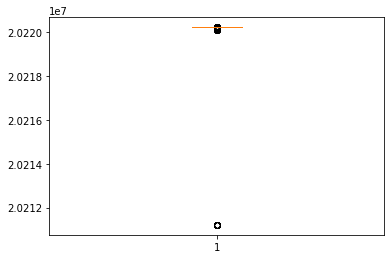

In [38]:
plt.boxplot(df['FIRSTOCCURRENCE'].apply(to_integer))

In [39]:
#LASTOCCURRENCE
df['LASTOCCURRENCE'].value_counts().to_frame()

LASTOCCURRENCE
2022-02-07 23:33:44  339           
2022-02-07 23:33:41  183           
2022-02-07 23:33:38  177           
2022-02-07 23:33:39  160           
2022-02-07 23:33:45  143           
...                  ...           
2022-02-07 23:46:24  4             
2022-02-07 23:44:52  4             
2022-02-07 23:46:08  3             
2022-02-07 23:44:54  3             
2022-02-07 23:44:48  1             

[899 rows x 1 columns]

In [40]:
df['LASTOCCURRENCE'].isnull().sum()/len(df)

0.0

In [41]:
df['LASTOCCURRENCE']=pd.to_datetime(df['LASTOCCURRENCE'])

In [42]:
df['LASTOCCURRENCE'].apply(to_integer).value_counts()

20220207    30654
Name: LASTOCCURRENCE, dtype: int64

In [43]:
print(df['LASTOCCURRENCE'].min(),df['LASTOCCURRENCE'].max())

2022-02-07 23:31:32 2022-02-07 23:46:32


In [44]:
#TYPE
df['TYPE'].value_counts().to_frame()

TYPE
2   17852
1   12182
13  462  
0   140  
12  18

In [45]:
df['TYPE'].isnull().sum()/len(df)

0.0

In [46]:
#TALLY
df['TALLY'].value_counts().to_frame()

TALLY
1      27975
3      775  
5      340  
9      297  
7      275  
...    ...  
14799  1    
17527  1    
43358  1    
27941  1    
49935  1    

[333 rows x 1 columns]

In [47]:
df['TALLY'].isnull().sum()/len(df)

0.0

In [48]:
df['TALLY'].describe()

count    30654.000000 
mean     474.663600   
std      5824.978778  
min      1.000000     
25%      1.000000     
50%      1.000000     
75%      1.000000     
max      178785.000000
Name: TALLY, dtype: float64

In [49]:
#LOCATION
df['LOCATION'].value_counts().to_frame()

LOCATION
100.123.22.18                                                  6966    
172.18.89.122                                                  3806    
100.123.22.96                                                  915     
100.123.22.2                                                   733     
10.67.100.12-NORTE_PRINCIPAL                                   195     
...                                                            ...     
PLMN-PLMN/MRBTS-787992                                         1       
PLMN-PLMN/MRBTS-787097/EQM_R-1/APEQM_R-1/CABINET_R-2/SMOD_R-1  1       
PLMN-PLMN/MSC-374783/FU-GISU-8                                 1       
PLMN-PLMN/MRBTS-3885/LNBTS-3885                                1       
PLMN-PLMN/MRBTS-8937/EQM_R-1/APEQM_R-1/CABINET_R-1/SMOD_R-1    1       

[615 rows x 1 columns]

In [50]:
df['LOCATION'].isnull().sum()/len(df)

0.5253148039407581

In [51]:
df['LOCATION'].value_counts().to_frame().value_counts()

LOCATION
1           404
2           133
3           21 
4           15 
6           8  
5           7  
7           3  
9           2  
11          2  
164         1  
150         1  
151         1  
915         1  
195         1  
733         1  
122         1  
3806        1  
144         1  
24          1  
67          1  
46          1  
36          1  
30          1  
18          1  
17          1  
12          1  
10          1  
8           1  
6966        1  
dtype: int64

In [52]:
# DELETEDATE
df['DELETEDATE'].value_counts().to_frame()

DELETEDATE
2022-02-07 23:39:31  3402      
2022-02-07 23:45:56  1561      
2022-02-07 23:45:18  1353      
2022-02-07 23:44:08  1002      
2022-02-07 23:43:57  910       
2022-02-07 23:46:08  848       
2022-02-07 23:48:08  804       
2022-02-07 23:41:31  650       
2022-02-07 23:40:18  613       
2022-02-07 23:47:31  545       
2022-02-07 23:45:31  540       
2022-02-07 23:42:18  537       
2022-02-07 23:46:18  531       
2022-02-07 23:44:18  438       
2022-02-07 23:43:31  415       
2022-02-07 23:47:18  393       
2022-02-07 23:38:18  316       
2022-02-07 23:36:18  250       
2022-02-07 23:42:07  221       
2022-02-07 23:43:18  138       
2022-02-07 23:41:18  102       
2022-02-07 23:34:18  64        
2022-02-07 23:40:07  50        
2022-02-07 23:34:17  44        
2022-02-07 23:37:30  25        
2022-02-07 23:41:17  14        
2022-02-07 23:41:56  12        
2022-02-07 23:38:07  10        
2022-02-07 23:39:17  5         
2022-02-07 23:35:17  3

In [53]:
df['LOCATION'].isnull().sum()/len(df)

0.5253148039407581

In [54]:
#ENRICHED
df['ENRICHED'].value_counts().to_frame()

ENRICHED
N  2561    
Y  2074

In [55]:
df['ENRICHED'].isnull().sum()/len(df)

0.8487962419260129

In [56]:
#STATUS
df['STATUS'].value_counts().to_frame()

STATUS
OPERATING  1986

In [57]:
df['STATUS'].isnull().sum()/len(df)

0.9352123703268741

In [58]:
#LOCALIDAD
df['LOCALIDAD'].value_counts().to_frame()

LOCALIDAD
Localidad Usaquen            31       
Localidad Fontibon           15       
Rio Mar                      7        
Localidad Suba               6        
Localidad Usme               4        
Localidad Engativa           3        
Historica Y Caribe Norte     1        
Sur Oriental                 1        
La Virgen Y Turistica        1        
Nororiental                  1        
Comuna 8 - Villavicencio     1        
San Francisco - Bucaramanga  1        
Norte Centro Historico       1        
Industrial De La Bahia       1

In [59]:
df['LOCALIDAD'].isnull().sum()/len(df)

0.9975859594180205

In [60]:
#MUNICIPIO
df['MUNICIPIO'].value_counts().to_frame()

MUNICIPIO
BOGOTA D.C.   378      
BARRANQUILLA  92       
CARTAGENA     63       
MEDELLIN      51       
CALI          50       
...           ..       
ROVIRA        1        
ACACIAS       1        
ANGOSTURA     1        
EL PAUJIL     1        
AYAPEL        1        

[64 rows x 1 columns]

In [61]:
df['MUNICIPIO'].isnull().sum()/len(df)

0.9671820969530893

In [62]:
#DEPARTAMENTO
df['DEPARTAMENTO'].value_counts().to_frame()

DEPARTAMENTO
BOGOTA D.C          378         
ATLANTICO           96          
VALLE DEL CAUCA     92          
ANTIOQUIA           83          
BOLIVAR             66          
CUNDINAMARCA        60          
TOLIMA              32          
NORTE DE SANTANDER  28          
RISARALDA           27          
SANTANDER           23          
BOYACA              23          
META                23          
QUINDIO             16          
CALDAS              11          
HUILA               10          
MAGDALENA           9           
CASANARE            6           
CAUCA               5           
SUCRE               5           
CORDOBA             4           
CESAR               3           
GUAJIRA             3           
NARINO              2           
CAQUETA             1

In [63]:
df['DEPARTAMENTO'].isnull().sum()/len(df)

0.9671820969530893

In [64]:
#SITIO
df['SITIO'].value_counts().to_frame()

SITIO
SDS-TOBERIN-TOBE-X                  90   
SDS-BOSTON                          56   
SDS-POLO-POLO-X                     36   
CCM VENECIA - BOGOTA                35   
BOG.CASTELLANA                      30   
...                                 ..   
CIUDAD BERNA 3 3D - BOGOTA          1    
SUC.SAN MARCOS-5                    1    
EL EDEN CONSTRUCTORA - BOGOTA D.C.  1    
BAR.GRAN CENTRO                     1    
LUCERO 5 - BARRANQUILLA             1    

[311 rows x 1 columns]

In [65]:
df['SITIO'].isnull().sum()/len(df)

0.9671820969530893

In [66]:
#REGIONAL
df['REGIONAL'].value_counts().to_frame()

REGIONAL
CENTRO ORIENTE  412     
COSTA           186     
OCCIDENTE       142     
NORTE           137     
ORIENTE         127

In [67]:
df['REGIONAL'].isnull().sum()/len(df)

0.9672473412931428

In [68]:
#CODALARM
df['CODALARM'].value_counts().to_frame()

CODALARM
200              2764    
13418            2656    
1                1169    
69657            1027    
2                803     
...              ...     
7717             1       
7711             1       
PartialResyncPr  1       
7604             1       
168              1       

[446 rows x 1 columns]

In [69]:
#df['CODALARM_2']=np.where(df['CODALARM'].isnull(),0,df['CODALARM'].astype(int))
df['CODALARM_2']= pd.to_numeric(df['CODALARM'], errors='coerce')

In [70]:
df['CODALARM_2']=np.where(df['CODALARM_2'].isnull(),0,df['CODALARM_2'])

In [71]:
df['CODALARM_2']=df['CODALARM_2'].astype(int)

In [72]:
df['CODALARM'].isnull().sum()/len(df)

0.3794937039211848

In [73]:
df['CODALARM_2'].isnull().sum()/len(df)

0.0

In [74]:
codeAlarms= pd.read_csv(f'AlarmsCode.csv',sep=';', engine='python',error_bad_lines=False)

C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\420930864.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  codeAlarms= pd.read_csv(f'AlarmsCode.csv',sep=';', engine='python',error_bad_lines=False)


In [75]:
codeAlarms.dtypes

Alarms Codes    int64
dtype: object

In [76]:
df[df['CODALARM_2'].isin(codeAlarms['Alarms Codes'].unique())]

IDENTIFIER  \
2      ORTEZAL | 245398516 | Communication | 1 | IP FOTONICO | MTTrapd Probe on GSR_CMDB_TRI05 | 1                                                                                                 
3      10.64.158.17 | IDU MODEM SW GRP1 | MIB-PNMSJ-IPASOLINK-100-200-COMMON-MIB Unlocked | 2 | PNMSJ+_OCCIDENTE_PRINCIPAL | AC_PNMSJ_GSR_CMDB_TRI05_PSLINK_2-4649B TMX.CAU.Parques_NMS | 1        
4      10.64.160.18 | IDU MODEM Slot01 | MIB-PNMSJ-IPASOLINK-400-COMMON-MIB MODEM Power Supply Alarm | 2 | PNMSJ+_NORTE_PRINCIPAL | AC_PNMSJ_GSR_CMDB_TRI05_PSLINK_4-5581B ANT.Salgar SL_NMS | 1   
6      10.70.70.8 | IDU FAN No.1 | MIB-PNMSJ-IPASOLINK-VR10-COMMON-MIB FAN FAIL | 2 | PNMSJ+_NORTE_PRINCIPAL | AC_PNMSJ_GSR_CMDB_TRI05_PSLINK_5-6781B MAG.EL Roble_NMS | 1                         
44     5.126.1.36 | 969 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4                                                                                                         
...                                                                                    ...                                                                                                         
30388  5.83.109.3 | 913 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4                                                                                                         
30389  5.15.72.133 | 975 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297717                                                                                                 
30390  5.15.72.133 | 913 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297718                                                                                                 
30407  5.102.13.63 | 761 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18297719                                                                                                 
30433  5.0.70.247 | 761 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4                                                                                                         

               NODE                       AGENT  SEVERITY  \
2      ORTEZAL       IP FOTONICO                 0          
3      10.64.158.17  PNMSJ+_OCCIDENTE_PRINCIPAL  0          
4      10.64.160.18  PNMSJ+_NORTE_PRINCIPAL      0          
6      10.70.70.8    PNMSJ+_NORTE_PRINCIPAL      0          
44     5.126.1.36    BOSSC                       0          
...           ...      ...                      ..          
30388  5.83.109.3    BOSSC                       4          
30389  5.15.72.133   BOSSC                       0          
30390  5.15.72.133   BOSSC                       0          
30407  5.102.13.63   BOSSC                       0          
30433  5.0.70.247    BOSSC                       4          

                                                                                  SUMMARY  \
2      R_LOS Location Information: 0-28-172_Ortezal-5-U6U402-1(IN1/OUT1)-OCH:1              
3      Unlocked                                                                             
4      MODEM Power Supply Alarm                                                             
6      FAN FAIL                                                                             
44     Major Discrete Alarm For Inverter Status     MAC: 0090EA00A3CD   Voltage:  37.60     
...                                                                                 ...     
30388  Major Analog Alarm For Total String Voltage     MAC: 0090EA045BA0   Voltage:  -5:0   
30389  Site Recovered for Major Alarm     MAC: 0090EA03114D   Voltage:  -5:0                
30390  Site Recovered for Total String Voltage     MAC: 0090EA03114D   Voltage:  -5:0       
30407  Site Recovered for PS Input Voltage     MAC: 0090EA11022B   Voltage:  -5:0           
30433  Major Analog Alarm For PS Input Voltage     MAC: 0090EA08CE1E   Vo

In [77]:
#TTNUMBER
df['TTNUMBER'].value_counts().to_frame()

TTNUMBER
CHG327273   51      
INC5792805  17      
INC5838674  4       
INC5838813  3       
INC5838770  2       
INC4895422  2       
INC5187441  2       
INC5847402  1       
INC5821999  1       
INC5770198  1       
INC5812045  1       
INC5848457  1       
INC5846486  1       
INC5845177  1       
INC5847346  1       
INC5843358  1       
INC5844402  1       
INC5847819  1       
INC5833631  1       
INC5847594  1       
INC5848258  1       
INC5653177  1       
INC5675550  1       
INC5683801  1

In [78]:
df['TTNUMBER'].isnull().sum()/len(df)

0.9968030273373785

In [79]:
#TECNOLOGIA
df['TECNOLOGIA'].value_counts().to_frame()

TECNOLOGIA
FIJA  1847      
UMTS  60        
GSM   56        
LTE   40

In [80]:
df['TECNOLOGIA'].isnull().sum()/len(df)

0.9346577934364194

In [81]:
# LATITUD LONGITUD todo null 

In [82]:
#TIPOAFECTACION
df['TIPOAFECTACION'].value_counts().to_frame()

TIPOAFECTACION
AS   2526          
PAS  632           
NAS  393

In [83]:
df['TIPOAFECTACION'].isnull().sum()/len(df)

0.8841586742350102

In [84]:
#NODEALIAS
df['NODEALIAS'].value_counts().to_frame()

NODEALIAS
10.68.86.6                                                   1543     
10.67.47.9                                                   1236     
192.168.56.71                                                1148     
192.168.6.3                                                  759      
192.168.195.50                                               718      
...                                                          ...      
MRBTS-787065,ENBFunction=LNBTS-787065,EUtranCellFDD=LNCEL-2  1        
OTN-ZTE_CALI_NORTE                                           1        
GB1                                                          1        
5-6382A GUJ.Carraipia                                        1        
192.168.6.137                                                1        

[2032 rows x 1 columns]

In [85]:
df['NODEALIAS'].isnull().sum()/len(df)

0.00042408821034775233

In [86]:
### Validar un caso
df[df['IDENTIFIER']=='Impact:Memory Status for NCI32:NCICLUSTER32']

IDENTIFIER          NODE  \
28387  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28388  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28389  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28390  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28391  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28392  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28406  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   
28407  Impact:Memory Status for NCI32:NCICLUSTER32  GSRCMDBTRI32   

                       AGENT  SEVERITY  \
28387  Impact SelfMonitoring  1          
28388  Impact SelfMonitoring  1          
28389  Impact SelfMonitoring  1          
28390  Impact SelfMonitoring  1          
28391  Impact SelfMonitoring  1          
28392  Impact SelfMonitoring  1          
28406  Impact SelfMonitoring  1          
28407  Impact SelfMonitoring  1          

                                                                                                         SUMMARY  \
28387  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28388  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28389  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28390  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28391  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28392  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28406  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   
28407  Impact's Heap using 335M out of 20000M, Free System Memory Available: 58325M, Total System Memory: 64247M   

          FIRSTOCCURRENCE      LASTOCCURRENCE  TYPE  TALLY LOCATION  \
28387 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28388 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28389 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28390 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28391 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28392 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28406 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       
28407 2022-01-14 18:28:42 2022-02-07 23:44:22  13    68785  NaN       

      DELETEDATE ENRICHED STATUS LOCALIDAD MUNICIPIO DEPARTAMENTO SITIO  \
28387  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28388  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28389  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28390  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28391  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28392  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28406  NaN        NaN      NaN    NaN       NaN       NaN          NaN    
28407  NaN        NaN      NaN    NaN       NaN       NaN          NaN    

      REGIONAL CODALARM TTNUMBER TECNOLOGIA  LATITUD  LONGITUD TIPOAFECTACION  \
28387  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28388  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28389  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28390  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28391  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28392  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28406  NaN      NaN      NaN      NaN       NaN      NaN        NaN             
28407  NaN      NaN      NaN      NaN  

## Leer y Filtar todos los archivos

In [87]:
# import necessary libraries
import pandas as pd
import os
import glob

datosFinal=pd.DataFrame()
  
# use glob to get all the csv files 
# in the folder
path = os.getcwd()+"\\netcool_new\\"
print (path)
#path = "netcool_new"
csv_files = glob.glob(os.path.join(path, "*.txt"))
  
flag=0
# loop over the list of csv files
for f in csv_files:
    print('File Name:', f.split("\\")[-1])
    try:
        # read the csv file
        df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)

        #Filtro BOSSC
        df= df[df['AGENT'].notnull() & df['AGENT'].str.contains("BOSS")]
        # filtro codalarm
        df['CODALARM_2']= pd.to_numeric(df['CODALARM'], errors='coerce')
        df=df[df['CODALARM_2'].isin(codeAlarms['Alarms Codes'].unique())]

        # print the location and filename
        #print('Location:', f)


        if flag==0:
            datosFinal=df
            flag=1
        else:
            datosFinal=datosFinal.append(df)
        # print the content
        ##print('Content:')
        ##display(df)
        ##print()
    except:
        print("problems opening file")

C:\Users\CristhianJohnatanIzq\OneDrive - SQDM\proyecto20_Ale_Fase4\netcool_new\
File Name: alarms_ml_20220207233018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220207234525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208000026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208001519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208003018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208004520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208010021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208011518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208013018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208014518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208020020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208021524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208023017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208024517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208030018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208031534.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208033027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208034528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208040035.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208041523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208043022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208044522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208050025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208051520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208053026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208054522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208060026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208061530.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208063021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208064524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208071520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208073021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208074527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208080030.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208081521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208083022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208084525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208090027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208091523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208093021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208094522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208100024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208101522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208103022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208104522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208110022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208111522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208113022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208114519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208120057.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208121529.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208123020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208124524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208130025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208131519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208133022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208134522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208140026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208141518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208143020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208144519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208150020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208151519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208153020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208154520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208160021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208161520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208163019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208164713.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208170017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208171516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208173020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208174522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208180021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208181516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208183020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208184519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208190019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208191519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208193018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208194519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208200019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208201528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208203019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208204518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208210019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208211518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208213018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208214519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208220020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208221519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208223019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208224519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208230018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208231518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208233019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220208234520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209000022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209001527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209003019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209004522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209010024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209011518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209013023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209014522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209020022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209021529.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209023031.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209024520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209030017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209031517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209033049.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209034725.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209040039.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209041521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209043017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209044524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209050025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209051520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209053020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209054521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209060024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209061531.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209063021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209064523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209070024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209071521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209074528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209080026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209081524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209083020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209084524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209090027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209091525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209093023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209094523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209100027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209101525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209103023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209104523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209110022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209111524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209113024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209114523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209120101.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209121522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209123022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209124521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209130021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209131520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209133021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209134520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209140028.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209141521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209143020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209144524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209150024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209151521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209153022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209154519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209160019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209161517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209163019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209164519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209170020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209171519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209173020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209174518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209180019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209181518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209183020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209184515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209190019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209191518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209193018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209194516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209200023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209201517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209203018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209204517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209210017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209211514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209213020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209214515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209220022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209221518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209223017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209224517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209230018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209231517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209233017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220209234516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210000019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210001517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210004520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210010021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210011518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210013023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210014516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210020030.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210021516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210023025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210024515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210030018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210031515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210033043.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210034531.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210040032.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210041520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210043019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210044527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210050021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210051519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210053018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210054519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210060022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210061528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210063210.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210064525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210070027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210071530.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210073021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210074528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210080039.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210081520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210083018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210084523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210090023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210091522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210093019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210094523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210100022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210101519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210103020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210104520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210110021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210111521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210113019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210114519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210120058.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210121521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210123019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210124520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210130020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210131519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210133020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210134519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210140019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210141519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210143021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210144519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210150246.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210151515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210153021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210154520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210160020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210161519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210164515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210170011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210171517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210173015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210174516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210180017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210181512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210183016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210184512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210190008.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210191517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210193015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210194514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210200018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210201517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210203018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210204517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210210018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210211516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210213017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210214514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210220018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210221514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210223020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210224518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210230018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210231518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210233016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220210234519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211000020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211001520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211003019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211004520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211010022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211011518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211013031.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211014529.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211020027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211021526.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211023026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211024515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211030027.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211031517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211033015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211034537.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211040043.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211041522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211043022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211044523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211050024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211051520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211053020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211054521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211060026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211061528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211063018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211064525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211070023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211071519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211073113.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211074526.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211080023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211081519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211083022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211084524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211090025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211091524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211093022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211094521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211100018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211101519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211103023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211104522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211110018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211111519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211113020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211114519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211120105.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211121520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211123022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211124521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211130024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211131519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211133021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211134520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211140020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211141522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211143021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211144520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211150020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211151529.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211153020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211154519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211160023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211161523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211163019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211164519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211170020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211171517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211173018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211174547.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211180020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211181511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211183018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211184518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211190019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211191517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211193017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211194517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211200020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211201521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211203024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211204517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211210018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211211516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211213017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211214517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211220020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211221520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211224523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211230020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211231518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211233017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220211234545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212000018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212001518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212003017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212004518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212010019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212011510.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212013016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212014518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212020016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212021527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212023022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212024517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212030018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212031542.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)


File Name: alarms_ml_20220212033007.txt
File Name: alarms_ml_20220212034504.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


problems opening file
File Name: alarms_ml_20220212040004.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212041506.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212043010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212044516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212050017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212051516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212053016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212054517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212060024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212061521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212063019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212064521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212070019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212071518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212073018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212074524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212080025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212081520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212083017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212084523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212090022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212091520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212093020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212094524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212100020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212101520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212103021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212104523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212110022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212111521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212113019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212114521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212120107.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212121520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212123020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212124519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212130021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212131519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212133019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212134520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212140033.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212141520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212143018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212144520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212150021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212151518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212153020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212154523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212160023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212161519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212163019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212164505.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212170019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212171520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212173019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212174519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212180023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212181515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212183017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212184518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212190019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212191518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212193011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212194509.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212200021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212201514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212203007.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212204511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212210013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212211516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212213017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212214518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212220013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212221514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212223007.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212224518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)


File Name: alarms_ml_20220212230008.txt
problems opening file
File Name: alarms_ml_20220212231504.txt
File Name: alarms_ml_20220212233004.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220212234515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213000017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213001515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213003014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213004510.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213010009.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213011508.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213013008.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213014509.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213020008.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213021512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213023008.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213024508.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213030008.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213031508.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213033012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213034508.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213040008.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213041508.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)


File Name: alarms_ml_20220213043007.txt
File Name: alarms_ml_20220213044504.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


problems opening file
File Name: alarms_ml_20220213050003.txt
problems opening file
File Name: alarms_ml_20220213051504.txt
problems opening file
File Name: alarms_ml_20220213053004.txt
problems opening file
File Name: alarms_ml_20220213054504.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213060007.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213061514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213063319.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213064511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213070017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213071512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213073012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213074515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213080014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213081512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213083012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213084515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213090016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213091515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213093012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213094517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213100015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213101512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213103013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213104515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213110014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213111513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213113012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213114514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213120104.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213121513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213123012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213124513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213130012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213131512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213133012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213134523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213140013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213141512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213143013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213144514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213150012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213151516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213153021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213154519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213160019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213161518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213163019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213164518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213170016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213171514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213173014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213174515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213180017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213181513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213183014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213184515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213191512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213193011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213194511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213200019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213201512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213203015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213204511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213210012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213211510.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213213012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213214512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213220013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213221511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213223011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213224512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213230011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213231511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213233010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220213234512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214000011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214001512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214003010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214004514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214010013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214011510.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214013010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214014512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214020015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214021511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214023010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214024511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214030012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214031512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214033013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214034518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214040020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214041513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214043013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214044514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214050014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214051513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214053011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214054514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214060018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214061520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214063013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214064516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214070015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214071514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214073012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214074520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214080023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214081513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214083017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214084519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214090021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214091520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214093015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214094515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214100015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214101514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214103012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214104517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214110014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214111513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214113013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214114514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214120106.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214121513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214123013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214124513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214130014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214131514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214134514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214140018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214141513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214143013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214144513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214150015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214151514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214153021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214154514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214160019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214161515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214163015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214164516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214170013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214171514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214173013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214174513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214180019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214181513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214183012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214184513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214191513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214193013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214194512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214200018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214201513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214203013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214204512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214210012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214211511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214213012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214214511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214220016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214221527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214223012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214224512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214230011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214231511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214233011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220214234512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215000014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215001512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215003011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215004517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215010013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215011511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215013012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215014525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215020017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215021517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215023010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215024511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215030013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215031521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215033012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215034514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215040019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215041511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215043010.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215044514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215050015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215051515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215053012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215054515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215060014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215061521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215063014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215064517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215070017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215071512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215073013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215074519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215080016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215081513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215083013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215084518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215090017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215091516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215093014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215094515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215100015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215101517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215103014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215104516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215110016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215111515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215113016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215114519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215120121.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215121514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215123018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215124519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215130019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215131519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215133019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215134518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215140017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215141517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215143013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215144524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215150018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215151521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215153018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215154520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215160018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215161519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215163016.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215164514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215170015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215171516.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215173013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215174514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215180017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215181514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215183014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215184514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215190013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215191514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215193014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215194514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215200017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215201513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215203012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215204513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215210013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215211512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215213013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215214513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215220015.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215221511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215223011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215224511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215230013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215231511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215233011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220215234513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216000017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216001512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216003011.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216004512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216010012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216011511.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216013013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216014513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216020024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216021513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216023012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216024512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216030038.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216031515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216033013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216034514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216040028.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216041512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216043012.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216044512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216050013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216051515.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216053013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216054513.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216060025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216061520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216063013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216064517.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216070017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216071512.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216073013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216074519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216080021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216081514.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216083013.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216084518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216090034.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216091524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216093023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216094524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216100023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216101521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216103020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216104526.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216110029.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216111530.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216113023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216114527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216120125.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216121526.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216123028.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216124528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216130026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216131529.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216133026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216134525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216140028.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216141525.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216143025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216144529.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216150028.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216151528.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216153026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216154527.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216160024.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216161522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216163026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216164523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216170021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216171523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216173021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216174519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216180018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216181520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216183019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216184520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216190017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216191518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216193018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216194518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216200021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216201524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216203021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216204518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216210022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216211518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216213018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216214640.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216220014.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216221518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216223019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216224521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216230021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216231518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216233018.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220216234534.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217000019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217001518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217003020.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217004520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217010023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217011518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217013021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217014518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217020026.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217021518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217023017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217024519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217030105.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217031522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217033017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217034523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217040023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217041518.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217043017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217044521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217050019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217051519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217053017.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217054521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217060025.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217061524.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217063019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217064522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217070023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217071520.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217073019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217074623.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217080028.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217081521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217083019.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217084523.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217090022.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217091522.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217093021.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217094521.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217100023.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217101519.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217103048.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217104545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217110045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217111548.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217113047.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217114546.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217120149.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217121547.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217123049.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217124549.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217130045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217131546.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217133101.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217134546.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217140049.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217141545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217143045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217144545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217150046.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217151545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217153045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217154549.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217160051.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217161550.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217163046.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217164547.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217170046.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217171544.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217173045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217174542.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217180049.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217181545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217183044.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217184545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217190044.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217191544.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217193043.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217194545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217200046.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217201544.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217203103.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217204547.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217210045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217211546.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217213042.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217214545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217220048.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217221544.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217223048.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217224545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217230045.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217231544.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217233044.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220217234546.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218000050.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218001548.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218003044.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218004545.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218010047.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218011543.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218013048.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218014548.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218020050.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218021544.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218023046.txt


C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datosFinal=datosFinal.append(df)
C:\Users\CristhianJohnatanIzq\AppData\Local\Temp\ipykernel_18864\338960386.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,sep=';', engine='python',error_bad_lines=False)


File Name: alarms_ml_20220218024508.txt
problems opening file
File Name: alarms_ml_20220218030003.txt
problems opening file
File Name: alarms_ml_20220218031503.txt
problems opening file
File Name: alarms_ml_20220218033003.txt
problems opening file
File Name: alarms_ml_20220218034504.txt
problems opening file
File Name: alarms_ml_20220218040004.txt
problems opening file
File Name: alarms_ml_20220218041504.txt
problems opening file
File Name: alarms_ml_20220218043004.txt
problems opening file
File Name: alarms_ml_20220218044503.txt
problems opening file
File Name: alarms_ml_20220218050003.txt
problems opening file
File Name: alarms_ml_20220218051504.txt
problems opening file
File Name: alarms_ml_20220218053004.txt
problems opening file
File Name: alarms_ml_20220218054504.txt
problems opening file
File Name: alarms_ml_20220218060003.txt
problems opening file
File Name: alarms_ml_20220218061503.txt
problems opening file
File Name: alarms_ml_20220218063004.txt
problems opening file
File Nam

problems opening file
File Name: alarms_ml_20220219123003.txt
problems opening file
File Name: alarms_ml_20220219124503.txt
problems opening file
File Name: alarms_ml_20220219130004.txt
problems opening file
File Name: alarms_ml_20220219131504.txt
problems opening file
File Name: alarms_ml_20220219133004.txt
problems opening file
File Name: alarms_ml_20220219134503.txt
problems opening file
File Name: alarms_ml_20220219140003.txt
problems opening file
File Name: alarms_ml_20220219141504.txt
problems opening file
File Name: alarms_ml_20220219143004.txt
problems opening file
File Name: alarms_ml_20220219144504.txt
problems opening file
File Name: alarms_ml_20220219150004.txt
problems opening file
File Name: alarms_ml_20220219151503.txt
problems opening file
File Name: alarms_ml_20220219153003.txt
problems opening file
File Name: alarms_ml_20220219154504.txt
problems opening file
File Name: alarms_ml_20220219160004.txt
problems opening file
File Name: alarms_ml_20220219161504.txt
problems

problems opening file
File Name: alarms_ml_20220221011504.txt
problems opening file
File Name: alarms_ml_20220221013004.txt
problems opening file
File Name: alarms_ml_20220221014504.txt
problems opening file
File Name: alarms_ml_20220221020004.txt
problems opening file
File Name: alarms_ml_20220221021503.txt
problems opening file
File Name: alarms_ml_20220221023003.txt
problems opening file
File Name: alarms_ml_20220221024504.txt
problems opening file
File Name: alarms_ml_20220221030004.txt
problems opening file
File Name: alarms_ml_20220221031504.txt
problems opening file
File Name: alarms_ml_20220221033003.txt
problems opening file
File Name: alarms_ml_20220221034503.txt
problems opening file
File Name: alarms_ml_20220221040004.txt
problems opening file
File Name: alarms_ml_20220221041504.txt
problems opening file
File Name: alarms_ml_20220221043004.txt
problems opening file
File Name: alarms_ml_20220221044503.txt
problems opening file
File Name: alarms_ml_20220221050003.txt
problems

In [88]:
datosFinal

IDENTIFIER  \
44     5.126.1.36 | 969 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4               
69     5.94.209.94 | 1012 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 18295300      
107    5.171.16.213 | 913 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4             
108    5.171.16.213 | 975 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4             
163    5.0.70.247 | 761 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18295305        
...                                                                                           ...        
27220  5.15.72.133 | 975 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4              
27233  5.107.77.245 | 1012 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5            
27311  172.27.155.39 | 2934 | Optical Nodes | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 19240969   
27392  5.65.3.101 | 1012 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5              
27429  5.246.41.45 | 3304 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 19240972      

                NODE  AGENT  SEVERITY  \
44     5.126.1.36     BOSSC  0.0        
69     5.94.209.94    BOSSC  0.0        
107    5.171.16.213   BOSSC  4.0        
108    5.171.16.213   BOSSC  4.0        
163    5.0.70.247     BOSSC  0.0        
...           ...       ...  ...        
27220  5.15.72.133    BOSSC  4.0        
27233  5.107.77.245   BOSSC  5.0        
27311  172.27.155.39  BOSSC  0.0        
27392  5.65.3.101     BOSSC  5.0        
27429  5.246.41.45    BOSSC  0.0        

                                                                                  SUMMARY  \
44     Major Discrete Alarm For Inverter Status     MAC: 0090EA00A3CD   Voltage:  37.60     
69     Site Recovered     MAC: 0090EA1B6CA2   Voltage:  -5:0                                
107    Major Analog Alarm For Total String Voltage     MAC: 0090EA06DCF6   Voltage:  -5:0   
108    Major Discrete Alarm For Major Alarm     MAC: 0090EA06DCF6   Voltage:  -5:0          
163    Site Recovered for PS Input Voltage     MAC: 0090EA08CE1E   Voltage:  -5:0           
...                                                                           ...           
27220  Major Discrete Alarm For Major Alarm     MAC: 0090EA03114D   Voltage:  -5:0          
27233  Site Faulted     MAC: 0090EA07A7F7   Voltage:  -5:0                                  
27311  Site Recovered     MAC: 001AC3FF5302   Voltage:  -5:0                                
27392  Site Faulted     MAC: 00030814066C   Voltage:  -5:0                                  
27429  Site Recovered     MAC: 000BC9149316   Voltage:  -5:0                                

           FIRSTOCCURRENCE       LASTOCCURRENCE  TYPE  TALLY LOCATION  \
44     2022-02-07 23:31:32  2022-02-07 23:31:32  1.0   1.0    NaN       
69     2022-02-07 23:31:33  2022-02-07 23:31:33  2.0   1.0    NaN       
107    2022-02-07 23:24:54  2022-02-07 23:31:34  1.0   11.0   NaN       
108    2022-02-07 23:24:54  2022-02-07 23:31:34  1.0   11.0   NaN       
163    2022-02-07 23:31:36  2022-02-07 23:31:36  2.0   1.0    NaN       
...                    ...                  ...  ...   ...    ...       
27220  2022-02-18 02:45:02  2022-02-18 02:45:02  1.0   1.0    NaN       
27233  2022-02-18 02:45:02  2022-02-18 02:45:02  1.0   1.0    NaN       
27311  2022-02-18 02:45:08  2022-02-18 02:45:08  2.0   1.0    NaN       
27392  2022-02-18 02:45:09  2022-02-18 02:45:09  1.0   1.0    NaN       
27429  2022-02-18 02:45:11  2022-02-18 02:45:11  2.0   1.0    NaN       

                DELETEDATE ENRICHED     STATUS LOCALIDAD    MUNICIPIO  \
44     2022-02-07 23:42:18  Y        OPERATING  NaN       JAMUNDI       
69     2022-02-07 23:36:18  NaN      NaN        NaN       NaN           
107    NaN                  Y        OPERATING  NaN       BUCARAMANGA   
108    NaN                  Y        OPE

In [170]:
min_fecha=datosFinal['LASTOCCURRENCE'].min()
min_fecha

'2022-02-07 23:31:32'

In [171]:
max_fecha=datosFinal['LASTOCCURRENCE'].max()
max_fecha

'2022-02-18 02:45:11'

In [91]:
datosFinal['NODEALIAS'].nunique()

13197

In [92]:
#guardar parcial
datosFinal.to_csv('parcial.csv')

In [93]:
datosFinal=pd.read_csv('parcial.csv')

In [ ]:
### Quitar primer y ultimo día



#### Clasificación de las 25 columnas

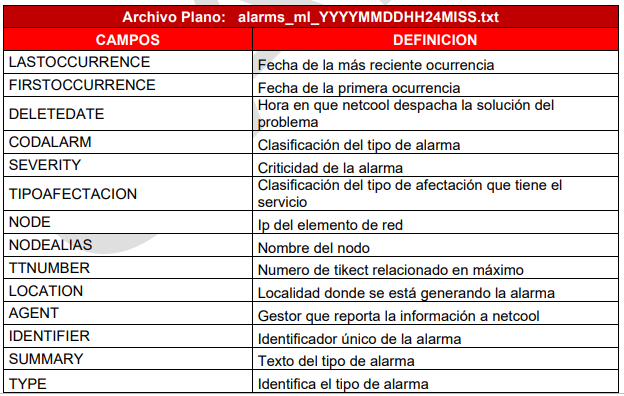
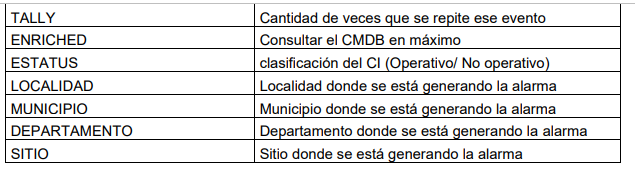

In [94]:
datosFinal.isnull().sum()/len(datosFinal)

Unnamed: 0         0.000000
IDENTIFIER         0.000000
NODE               0.000000
AGENT              0.000000
SEVERITY           0.000000
SUMMARY            0.000000
FIRSTOCCURRENCE    0.000000
LASTOCCURRENCE     0.000000
TYPE               0.000000
TALLY              0.000000
LOCATION           1.000000
DELETEDATE         0.407400
ENRICHED           0.525120
STATUS             0.543604
LOCALIDAD          1.000000
MUNICIPIO          0.546385
DEPARTAMENTO       0.546385
SITIO              0.546385
REGIONAL           0.546385
CODALARM           0.000000
TTNUMBER           0.997573
TECNOLOGIA         0.543604
LATITUD            1.000000
LONGITUD           1.000000
TIPOAFECTACION     0.495006
NODEALIAS          0.000000
CODALARM_2         0.000000
dtype: float64

### Val fechas

In [95]:
datosFinal[datosFinal['FIRSTOCCURRENCE']!=datosFinal['FIRSTOCCURRENCE']]
# Todas las fechas coinciden}

Empty DataFrame
Columns: [Unnamed: 0, IDENTIFIER, NODE, AGENT, SEVERITY, SUMMARY, FIRSTOCCURRENCE, LASTOCCURRENCE, TYPE, TALLY, LOCATION, DELETEDATE, ENRICHED, STATUS, LOCALIDAD, MUNICIPIO, DEPARTAMENTO, SITIO, REGIONAL, CODALARM, TTNUMBER, TECNOLOGIA, LATITUD, LONGITUD, TIPOAFECTACION, NODEALIAS, CODALARM_2]
Index: []

In [96]:
# Val identificador
datosFinal['NODE'].nunique()

7750

In [97]:
datosFinal['NODEALIAS'].nunique()

13197

In [98]:
#Por alias o por nodo

In [99]:
maestroNodos=datosFinal[['NODE','NODEALIAS']].drop_duplicates()

In [100]:
maestroNodos.sort_values('NODE')

NODE               NODEALIAS
594     172.21.150.53  EDR                   
1092    172.21.150.53  NODO EDR - SAN PEDRO 2
608     172.21.150.69  AEO                   
1093    172.21.150.69  NODO AEO - SAN PEDRO 1
2575    172.21.150.70  NODO NPE - SAN PEDRO 3
...               ...                     ...
199569  5.99.90.121    DSR                   
160722  5.99.91.207    C075                  
160961  5.99.91.207    CALC075PS01-VIP       
149067  5.99.91.69     CALIT5PS02            
27914   5.99.91.69     IT5                   

[14204 rows x 2 columns]

In [368]:
maestroNodos.sample(100)

NODE         NODEALIAS
157263  5.171.33.142  2AG             
15449   5.200.50.185  NEI1TOPS01      
205314  5.15.47.214   BOGBDGPS01      
50299   5.230.90.187  2EI             
90808   5.56.37.207   BOGGYMPS01      
...             ...          ...      
213417  5.222.35.232  GCH             
275041  5.75.64.135   VIG             
288478  5.84.208.73   OV2             
129709  5.119.226.44  P1B             
72346   5.251.57.4    BOG3A9021-23-VIP

[100 rows x 2 columns]

In [101]:
### Identificador
datosFinal['IDENTIFIER'].value_counts()

5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4            1727
5.48.15.168 | 9332 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4           775 
5.222.32.175 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4           717 
5.160.10.173 | 9332 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4          691 
5.237.99.1 | 913 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4             665 
                                                                                               ...  
5.131.27.70 | 1012 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 18599533    1   
5.218.35.57 | 3304 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 18599536    1   
5.218.35.57 | 3304 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 18599537    1   
5.218.35.57 | 2 | Power Supply | 2 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 4 | 18599539  

In [102]:
datosFinal[datosFinal['IDENTIFIER']=="5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4"]

Unnamed: 0  \
62688   35979        
63114   19445        
63337   1037         
63504   29357        
63652   48150        
...       ...        
318675  10168        
318763  20175        
319007  27045        
319146  8784         
319203  15701        

                                                                                  IDENTIFIER  \
62688   5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
63114   5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
63337   5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
63504   5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
63652   5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
...                                                                                      ...   
318675  5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
318763  5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
319007  5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
319146  5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   
319203  5.19.55.231 | 894 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4   

               NODE  AGENT  SEVERITY  \
62688   5.19.55.231  BOSSC  4.0        
63114   5.19.55.231  BOSSC  0.0        
63337   5.19.55.231  BOSSC  0.0        
63504   5.19.55.231  BOSSC  0.0        
63652   5.19.55.231  BOSSC  0.0        
...             ...    ...  ...        
318675  5.19.55.231  BOSSC  0.0        
318763  5.19.55.231  BOSSC  4.0        
319007  5.19.55.231  BOSSC  0.0        
319146  5.19.55.231  BOSSC  0.0        
319203  5.19.55.231  BOSSC  0.0        

                                                                             SUMMARY  \
62688   Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
63114   Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
63337   Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
63504   Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
63652   Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
...                                                                              ...   
318675  Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
318763  Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
319007  Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
319146  Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   
319203  Major Analog Alarm For TimeToCritical     MAC: 0090EA013AF1   Voltage:  -5:0   

            FIRSTOCCURRENCE       LASTOCCURRENCE  TYPE  TALLY  LOCATION  \
62688   2022-02-09 09:22:12  2022-02-09 09:30:21  1.0   7.0   NaN         
63114   2022-02-09 09:33:47  2022-02-09 09:37:55  1.0   7.0   NaN         
63337   2022-02-09 09:46:29  2022-02-09 09:47:03  1.0   3.0   NaN         
63504   2022-02-09 09:54:03  2022-02-09 09:55:03  1.0   3.0   NaN         
63652   2022-02-09 10:00:09  2022-02-09 10:00:09  1.0   1.0   NaN         
...                     ...                  ...  ...   ...    ..         
318675  2022-02-18 02:05:06  2022-02-18 02:07:07  1.0   3.0   NaN         
318763  2022-02-18 02:10:36  2022-02-18 02:11:37  1.0   3.0   NaN         
319007  2022-02-18 02:22:37  2022-02-18 02:29:36  1.0   3.0   NaN         
319146  2022-02-18 02:35:06  2022-02-18 02:36:07  1.0   3.0   NaN         
319203  2022-02-18 02:39:37  2022-02-18 02:39:37  1.0   1.0   NaN         

                 DELETEDATE ENRICHED     STATUS  LOCALIDAD    MUNICIPIO  \
62688   NaN                  Y        OPERATING NaN         BOGOTA D.C.   
6

### Analisis y formación Series de Tiempo

In [103]:
datosFinal[datosFinal['NODEALIAS']=='EDR']['IDENTIFIER'].value_counts()

172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5    104
5.17.19.225 | 969 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4        1  
5.17.19.225 | 9332 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 3       1  
Name: IDENTIFIER, dtype: int64

In [104]:
datosFinal[datosFinal['NODEALIAS']=='EDR'].drop(columns=['SITIO','LOCALIDAD','MUNICIPIO','DEPARTAMENTO','REGIONAL','TECNOLOGIA','LATITUD','LONGITUD','LOCATION','CODALARM']).sort_values(['IDENTIFIER','LASTOCCURRENCE'])

Unnamed: 0  \
594     27965        
4617    10562        
11097   10789        
20804   25784        
26024   21008        
...       ...        
310943  9643         
313388  32609        
316159  33284        
77869   24074        
77782   15372        

                                                                                      IDENTIFIER  \
594     172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
4617    172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
11097   172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
20804   172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
26024   172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
...                                                                                          ...   
310943  172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
313388  172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
316159  172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5   
77869   5.17.19.225 | 9332 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 3      
77782   5.17.19.225 | 969 | Power Supply | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 5 | 4       

                 NODE  AGENT  SEVERITY  \
594     172.21.150.53  BOSSC  5.0        
4617    172.21.150.53  BOSSC  0.0        
11097   172.21.150.53  BOSSC  0.0        
20804   172.21.150.53  BOSSC  0.0        
26024   172.21.150.53  BOSSC  0.0        
...               ...    ...  ...        
310943  172.21.150.53  BOSSC  0.0        
313388  172.21.150.53  BOSSC  5.0        
316159  172.21.150.53  BOSSC  5.0        
77869   5.17.19.225    BOSSC  0.0        
77782   5.17.19.225    BOSSC  0.0        

                                                                                 SUMMARY  \
594     Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
4617    Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
11097   Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
20804   Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
26024   Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
...                                                     ...                                
310943  Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
313388  Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
316159  Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0                                
77869   Battery on Standby     MAC: 0090EA026DAF   Voltage:  36.80                         
77782   Major Discrete Alarm For Inverter Status     MAC: 0090EA026DAF   Voltage:  36.80   

            FIRSTOCCURRENCE       LASTOCCURRENCE  TYPE  TALLY  \
594     2022-02-07 23:44:07  2022-02-07 23:44:07  1.0   1.0     
4617    2022-02-08 01:06:28  2022-02-08 01:06:28  1.0   1.0     
11097   2022-02-08 03:06:23  2022-02-08 03:06:23  1.0   1.0     
20804   2022-02-08 06:07:42  2022-02-08 06:07:42  1.0   1.0     
26024   2022-02-08 07:51:04  2022-02-08 07:51:04  1.0   1.0     
...                     ...                  ...  ...   ...     
310943  2022-02-17 19:51:12  2022-02-17 19:51:12  1.0   1.0     
313388  2022-02-17 21:46:00  2022-02-17 21:46:00  1.0   1.0     
316159  2022-02-17 23:45:35  2022-02-17 23:45:35  1.0   1.0     
77869   2022-02-09 21:38:46  2022-02-09 21:43:56  1.0   11.0    
77782   2022-02-09 21:38:46  2022-02-09 21:38:46  1.0   1.0     

                 DELETEDATE ENRICHED     STATUS TTNUMBER TIPOAFECTACION  \
594     NaN                  Y        OPERATING  NaN      AS              
4

In [105]:
datosFinal[datosFinal['NODEALIAS']=='EDR'][0:1].values

array([[27965,
        '172.21.150.53 | 2934 | Optical Nodes | 1 | BOSSC | MTTrapd Probe on GSRCMDBTRI31 | 2 | 5',
        '172.21.150.53', 'BOSSC', 5.0,
        'Site Faulted     MAC: 38C85C29A348   Voltage:  -5:0',
        '2022-02-07 23:44:07', '2022-02-07 23:44:07', 1.0, 1.0, nan, nan,
        'Y', 'OPERATING', nan, 'BOGOTA D.C.', 'BOGOTA D.C',
        'SAN PEDRO 2 - BOGOTA D.C.', 'CENTRO ORIENTE', 2934, nan, 'FIJA',
        nan, nan, 'AS', 'EDR', 2934.0]], dtype=object)

### Conclusiones
* Tomar varios casos en un lapso de tiempo como el mismo
* Predecir el dia con promblemas, No las horas

In [106]:
# Serie de tiempo  NODEALIAS y CODEALARM por día  (máxima severidad)

In [107]:
datosFinal.dtypes

Unnamed: 0         int64  
IDENTIFIER         object 
NODE               object 
AGENT              object 
SEVERITY           float64
SUMMARY            object 
FIRSTOCCURRENCE    object 
LASTOCCURRENCE     object 
TYPE               float64
TALLY              float64
LOCATION           float64
DELETEDATE         object 
ENRICHED           object 
STATUS             object 
LOCALIDAD          float64
MUNICIPIO          object 
DEPARTAMENTO       object 
SITIO              object 
REGIONAL           object 
CODALARM           int64  
TTNUMBER           object 
TECNOLOGIA         object 
LATITUD            float64
LONGITUD           float64
TIPOAFECTACION     object 
NODEALIAS          object 
CODALARM_2         float64
dtype: object

In [108]:
datosFinal['fecha']=pd.to_datetime(datosFinal['LASTOCCURRENCE']).dt.date

In [173]:
### quitar primer y último
datosFinal=datosFinal[datosFinal['fecha']!=datosFinal['fecha'].min()]
datosFinal=datosFinal[datosFinal['fecha']!=datosFinal['fecha'].max()]

In [174]:
datosFinal['CODALARM_2']=datosFinal['CODALARM_2'].astype(int)

In [175]:
resumenSeries=datosFinal.groupby(['NODEALIAS','CODALARM_2','fecha'])[['SEVERITY']].max().reset_index()
resumenSeries

NODEALIAS  CODALARM_2       fecha  SEVERITY
0      - CAMPO AZUL  3229        2022-02-12  0.0     
1      - CAMPO AZUL  3229        2022-02-17  0.0     
2      001AC3FF5272  2934        2022-02-16  5.0     
3      001AC3FF5272  2934        2022-02-17  5.0     
4      012           1012        2022-02-16  5.0     
...    ...            ...               ...  ...     
62789  ZVZ           913         2022-02-11  4.0     
62790  ZVZ           969         2022-02-11  4.0     
62791  ZVZ           975         2022-02-11  4.0     
62792  ZVZ           1012        2022-02-16  0.0     
62793  ZVZ           9332        2022-02-11  4.0     

[62794 rows x 4 columns]

In [176]:
max_fecha=resumenSeries['fecha'].max()
max_fecha

datetime.date(2022, 2, 17)

In [177]:
## Validacion

In [178]:
resumenSeries['NODEALIAS'].value_counts()

AQL             60
RICAQLPS01      59
CHIUCI3DPS01    58
BOG2FEPS01      57
ZFI             57
                ..
RG5             1 
GRF             1 
GR21            1 
RGE             1 
BOG5B7011-12    1 
Name: NODEALIAS, Length: 13155, dtype: int64

In [179]:
resumenSeries[resumenSeries['NODEALIAS']=='RICAQLPS01']

NODEALIAS  CODALARM_2       fecha  SEVERITY
50469  RICAQLPS01  894         2022-02-08  1.0     
50470  RICAQLPS01  894         2022-02-09  0.0     
50471  RICAQLPS01  894         2022-02-10  0.0     
50472  RICAQLPS01  894         2022-02-11  0.0     
50473  RICAQLPS01  894         2022-02-12  0.0     
50474  RICAQLPS01  894         2022-02-13  4.0     
50475  RICAQLPS01  894         2022-02-14  0.0     
50476  RICAQLPS01  894         2022-02-15  0.0     
50477  RICAQLPS01  894         2022-02-17  0.0     
50478  RICAQLPS01  895         2022-02-08  0.0     
50479  RICAQLPS01  895         2022-02-09  0.0     
50480  RICAQLPS01  895         2022-02-11  0.0     
50481  RICAQLPS01  895         2022-02-12  0.0     
50482  RICAQLPS01  895         2022-02-13  0.0     
50483  RICAQLPS01  895         2022-02-14  0.0     
50484  RICAQLPS01  904         2022-02-08  1.0     
50485  RICAQLPS01  904         2022-02-09  0.0     
50486  RICAQLPS01  904         2022-02-10  0.0     
50487  RICAQLPS01  904         2022-02-11  0.0     
50488  RICAQLPS01  904         2022-02-12  0.0     
50489  RICAQLPS01  904         2022-02-13  0.0     
50490  RICAQLPS01  904         2022-02-14  0.0     
50491  RICAQLPS01  904         2022-02-15  0.0     
50492  RICAQLPS01  904         2022-02-17  0.0     
50493  RICAQLPS01  913         2022-02-08  4.0     
50494  RICAQLPS01  913         2022-02-09  0.0     
50495  RICAQLPS01  913         2022-02-10  0.0     
50496  RICAQLPS01  913         2022-02-11  0.0     
50497  RICAQLPS01  913         2022-02-12  0.0     
50498  RICAQLPS01  913         2022-02-13  0.0     
50499  RICAQLPS01  913         2022-02-14  4.0     
50500  RICAQLPS01  913         2022-02-15  0.0     
50501  RICAQLPS01  913         2022-02-17  0.0     
50502  RICAQLPS01  969         2022-02-08  1.0     
50503  RICAQLPS01  969         2022-02-09  0.0     
50504  RICAQLPS01  969         2022-02-10  0.0     
50505  RICAQLPS01  969         2022-02-11  0.0     
50506  RICAQLPS01  969         2022-02-12  0.0     
50507  RICAQLPS01  969         2022-02-13  0.0     
50508  RICAQLPS01  969         2022-02-14  0.0     
50509  RICAQLPS01  969         2022-02-15  0.0     
50510  RICAQLPS01  975         2022-02-08  1.0     
50511  RICAQLPS01  975         2022-02-09  0.0     
50512  RICAQLPS01  975         2022-02-10  0.0     
50513  RICAQLPS01  975         2022-02-11  0.0     
50514  RICAQLPS01  975         2022-02-12  0.0     
50515  RICAQLPS01  975         2022-02-13  4.0     
50516  RICAQLPS01  975         2022-02-14  4.0     
50517  RICAQLPS01  975         2022-02-15  0.0     
50518  RICAQLPS01  975         2022-02-17  0.0     
50519  RICAQLPS01  9332        2022-02-08  1.0     
50520  RICAQLPS01  9332        2022-02-09  0.0     
50521  RICAQLPS01  9332        2022-02-10  0.0     
50522  RICAQLPS01  9332        2022-02-11  0.0     
50523  RICAQLPS01  9332        2022-02-12  3.0     
50524  RICAQLPS01  9332        2022-02-13  4.0     
50525  RICAQLPS01  9332        2022-02-14  0.0     
50526  RICAQLPS01  9332        2022-02-15  0.0     
50527  RICAQLPS01  9332        2022-02-17  0.0

### Estadisticas Estado de los nodos

### Series Nodo_CodAlarm

In [180]:
resumen_dias_alarma=resumenSeries[['NODEALIAS','CODALARM_2']].value_counts().to_frame()
resumen_dias_alarma

0
NODEALIAS              CODALARM_2    
BRS                    2934        10
B55                    2934        10
NODO BEX - BELLO 49    2934        10
NODO B0E - BELLO 10    2934        10
NODO AUC - ARANJUEZ 12 2934        10
...                                ..
CHIMORPS01             9334        1 
                       893         1 
                       833         1 
                       827         1 
ZVZ                    9332        1 

[33129 rows x 1 columns]

In [181]:
resumen_dias_alarma.sample(10)

0
NODEALIAS    CODALARM_2   
BUCMPRPS01   969         1
BMJSYVPS01   9334        2
FLRJUTPS01   904         1
NEILJAPS01   975         1
BOGINEPS01   891         1
CML          12          1
ELT          1012        1
SINIC1PS02   969         2
BOG40E2DPS01 904         1
BOG5AM011-12 1012        1

In [182]:
resumen_dias_alarma.describe()

0
count  33129.000000
mean   1.895439    
std    2.056655    
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    2.000000    
max    10.000000

In [183]:
resumen_dias_alarma.value_counts().sort_index(ascending=False)

10    1174 
9     309  
8     276  
7     273  
6     238  
5     332  
4     589  
3     1566 
2     5640 
1     22732
dtype: int64

In [184]:
resumen_dias_alarma_df=resumen_dias_alarma.value_counts().sort_index(ascending=False).to_frame()
resumen_dias_alarma_df.columns=['num_nodos_alarmCodes']

In [185]:
resumen_dias_alarma_df['part']=resumen_dias_alarma_df['num_nodos_alarmCodes']/resumen_dias_alarma_df['num_nodos_alarmCodes'].sum()
resumen_dias_alarma_df.columns=['num_nodos_alarmCodes','part']
resumen_dias_alarma_df.index.name='diasAlarm'
resumen_dias_alarma_df

num_nodos_alarmCodes      part
0                                 
10  1174                  0.035437
9   309                   0.009327
8   276                   0.008331
7   273                   0.008241
6   238                   0.007184
5   332                   0.010021
4   589                   0.017779
3   1566                  0.047270
2   5640                  0.170244
1   22732                 0.686166

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

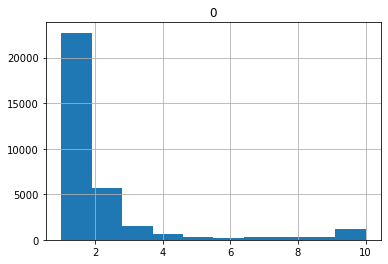

In [186]:
resumen_dias_alarma.hist()

In [234]:
resumen_dias_alarma_df['num_nodos_alarmCodes'].sum()

33129

### Nodo

In [187]:
resumenNodos=datosFinal.groupby(['NODEALIAS','fecha'])[['SEVERITY']].max().reset_index()
resumenNodos

NODEALIAS       fecha  SEVERITY
0      - CAMPO AZUL  2022-02-12  0.0     
1      - CAMPO AZUL  2022-02-17  0.0     
2      001AC3FF5272  2022-02-16  5.0     
3      001AC3FF5272  2022-02-17  5.0     
4      012           2022-02-16  5.0     
...    ...                  ...  ...     
37807  ZUP           2022-02-10  4.0     
37808  ZVS           2022-02-15  0.0     
37809  ZVT           2022-02-08  4.0     
37810  ZVZ           2022-02-11  4.0     
37811  ZVZ           2022-02-16  0.0     

[37812 rows x 3 columns]

In [188]:
resumen_dias_nodo=resumenNodos[['NODEALIAS']].value_counts().to_frame()
resumen_dias_nodo

0
NODEALIAS                                
GS7000 HMS:172.28.152.19:001E6B57B4A2  10
Nodo V2R - CANAVERALES 2               10
Nodo T4L - TRONCAL 4                   10
BOGCCOPS01                             10
Nodo T6T - TRANSITO 6                  10
...                                    ..
MLA                                    1 
MKV                                    1 
MKR                                    1 
BOGZ4RPS01                             1 
BOGGO21PS01                            1 

[13155 rows x 1 columns]

In [189]:
resumen_dias_nodo.describe()

0
count  13155.000000
mean   2.874344    
std    2.858017    
min    1.000000    
25%    1.000000    
50%    2.000000    
75%    3.000000    
max    10.000000

In [190]:
resumen_dias_nodo_df=resumen_dias_nodo.value_counts().sort_index(ascending=False).to_frame()
resumen_dias_nodo_df

0
0       
10  1128
9   301 
8   244 
7   241 
6   225 
5   302 
4   510 
3   1135
2   2810
1   6259

In [191]:
resumen_dias_nodo_df['part']=resumen_dias_nodo_df[0]/resumen_dias_nodo_df[0].sum()
resumen_dias_nodo_df.columns=['num_nodos','part']
resumen_dias_nodo_df

num_nodos      part
0                      
10  1128       0.085747
9   301        0.022881
8   244        0.018548
7   241        0.018320
6   225        0.017104
5   302        0.022957
4   510        0.038769
3   1135       0.086279
2   2810       0.213607
1   6259       0.475789

In [192]:
print("numero Nodos: ",len(resumen_dias_nodo))

numero Nodos:  13155


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

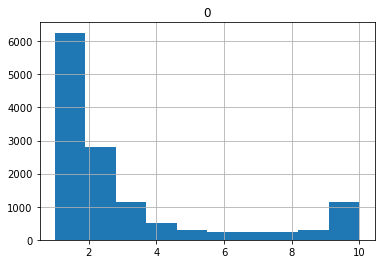

In [193]:
resumen_dias_nodo.hist()

# Preparacion Series

In [194]:
resumenSeries['SEVERITY']=resumenSeries['SEVERITY']+1

In [195]:
resumenSeries['key']=resumenSeries['NODEALIAS']+'---'+resumenSeries['CODALARM_2'].astype(str)

In [196]:
resumenSeries

NODEALIAS  CODALARM_2       fecha  SEVERITY                  key
0      - CAMPO AZUL  3229        2022-02-12  1.0       - CAMPO AZUL---3229
1      - CAMPO AZUL  3229        2022-02-17  1.0       - CAMPO AZUL---3229
2      001AC3FF5272  2934        2022-02-16  6.0       001AC3FF5272---2934
3      001AC3FF5272  2934        2022-02-17  6.0       001AC3FF5272---2934
4      012           1012        2022-02-16  6.0       012---1012         
...    ...            ...               ...  ...              ...         
62789  ZVZ           913         2022-02-11  5.0       ZVZ---913          
62790  ZVZ           969         2022-02-11  5.0       ZVZ---969          
62791  ZVZ           975         2022-02-11  5.0       ZVZ---975          
62792  ZVZ           1012        2022-02-16  1.0       ZVZ---1012         
62793  ZVZ           9332        2022-02-11  5.0       ZVZ---9332         

[62794 rows x 5 columns]

In [197]:
resumenSeries_pv=pd.pivot_table(resumenSeries, index=['fecha'], columns=['key'], values=['SEVERITY'])
#resumenSeries_pv['IVE--3304']
resumenSeries_pv.columns = resumenSeries_pv.columns.droplevel()

In [198]:
resumenSeries_pv['IVE---3304']

fecha
2022-02-08    6.0
2022-02-09    6.0
2022-02-10    6.0
2022-02-11    6.0
2022-02-12    6.0
2022-02-13    6.0
2022-02-14    6.0
2022-02-15    6.0
2022-02-16    6.0
2022-02-17    6.0
Name: IVE---3304, dtype: float64

In [199]:
dias_totales=len(resumenSeries_pv)
dias_totales

10

In [200]:
resumenSeries_pv.fillna(0, inplace=True)

In [201]:
resumenSeries_un=resumenSeries_pv.reset_index().melt(id_vars=['fecha'], var_name='key', value_name='SEVERITY')
resumenSeries_un.set_index('fecha',inplace=True)
resumenSeries_un

key  SEVERITY
fecha                                    
2022-02-08  - CAMPO AZUL---3229  0.0     
2022-02-09  - CAMPO AZUL---3229  0.0     
2022-02-10  - CAMPO AZUL---3229  0.0     
2022-02-11  - CAMPO AZUL---3229  0.0     
2022-02-12  - CAMPO AZUL---3229  1.0     
...                         ...  ...     
2022-02-13  ZVZ---975            0.0     
2022-02-14  ZVZ---975            0.0     
2022-02-15  ZVZ---975            0.0     
2022-02-16  ZVZ---975            0.0     
2022-02-17  ZVZ---975            0.0     

[331290 rows x 2 columns]

#  Recurrencia de Eventos

In [202]:
resumenSeries_un=resumenSeries_un.sort_values(['key','fecha'])

In [203]:
resumenSeries_un

key  SEVERITY
fecha                                    
2022-02-08  - CAMPO AZUL---3229  0.0     
2022-02-09  - CAMPO AZUL---3229  0.0     
2022-02-10  - CAMPO AZUL---3229  0.0     
2022-02-11  - CAMPO AZUL---3229  0.0     
2022-02-12  - CAMPO AZUL---3229  1.0     
...                         ...  ...     
2022-02-13  ZVZ---975            0.0     
2022-02-14  ZVZ---975            0.0     
2022-02-15  ZVZ---975            0.0     
2022-02-16  ZVZ---975            0.0     
2022-02-17  ZVZ---975            0.0     

[331290 rows x 2 columns]

In [204]:
resumenSeries_un.reset_index()

fecha                  key  SEVERITY
0       2022-02-08  - CAMPO AZUL---3229  0.0     
1       2022-02-09  - CAMPO AZUL---3229  0.0     
2       2022-02-10  - CAMPO AZUL---3229  0.0     
3       2022-02-11  - CAMPO AZUL---3229  0.0     
4       2022-02-12  - CAMPO AZUL---3229  1.0     
...            ...                  ...  ...     
331285  2022-02-13  ZVZ---975            0.0     
331286  2022-02-14  ZVZ---975            0.0     
331287  2022-02-15  ZVZ---975            0.0     
331288  2022-02-16  ZVZ---975            0.0     
331289  2022-02-17  ZVZ---975            0.0     

[331290 rows x 3 columns]

In [205]:
#y= x[x!=0].reset_index().reset_index()

In [206]:
resumenSeries_un_nonZero=resumenSeries_un.reset_index()
resumenSeries_un_nonZero=resumenSeries_un_nonZero[resumenSeries_un_nonZero['SEVERITY']!=0].reset_index()

In [207]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY
0      4       2022-02-12  - CAMPO AZUL---3229  1.0     
1      9       2022-02-17  - CAMPO AZUL---3229  1.0     
2      18      2022-02-16  001AC3FF5272---2934  6.0     
3      19      2022-02-17  001AC3FF5272---2934  6.0     
4      28      2022-02-16  012---1012           6.0     
...    ..             ...         ...           ...     
62789  331243  2022-02-11  ZVZ---904            5.0     
62790  331253  2022-02-11  ZVZ---913            5.0     
62791  331263  2022-02-11  ZVZ---9332           5.0     
62792  331273  2022-02-11  ZVZ---969            5.0     
62793  331283  2022-02-11  ZVZ---975            5.0     

[62794 rows x 4 columns]

In [208]:
resumenSeries_un_nonZero['sig_event']=resumenSeries_un_nonZero.groupby('key')['index'].shift(periods=-1)

In [209]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY  sig_event
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       9.0      
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN       
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0     
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN       
4      28      2022-02-16  012---1012           6.0      NaN       
...    ..             ...         ...           ...       ..       
62789  331243  2022-02-11  ZVZ---904            5.0      NaN       
62790  331253  2022-02-11  ZVZ---913            5.0      NaN       
62791  331263  2022-02-11  ZVZ---9332           5.0      NaN       
62792  331273  2022-02-11  ZVZ---969            5.0      NaN       
62793  331283  2022-02-11  ZVZ---975            5.0      NaN       

[62794 rows x 5 columns]

In [210]:
resumenSeries_un_nonZero['dias_inter_event']=resumenSeries_un_nonZero['sig_event']-resumenSeries_un_nonZero['index']

In [211]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY  sig_event  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       9.0         
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN          
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0        
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN          
4      28      2022-02-16  012---1012           6.0      NaN          
...    ..             ...         ...           ...       ..          
62789  331243  2022-02-11  ZVZ---904            5.0      NaN          
62790  331253  2022-02-11  ZVZ---913            5.0      NaN          
62791  331263  2022-02-11  ZVZ---9332           5.0      NaN          
62792  331273  2022-02-11  ZVZ---969            5.0      NaN          
62793  331283  2022-02-11  ZVZ---975            5.0      NaN          

       dias_inter_event  
0      5.0               
1     NaN                
2      1.0               
3     NaN                
4     NaN                
...    ..                
62789 NaN                
62790 NaN                
62791 NaN                
62792 NaN                
62793 NaN                

[62794 rows x 6 columns]

In [212]:
resumenSeries_un_nonZero['dias_inter_event'].describe()

count    29665.000000
mean     1.777785    
std      1.563032    
min      1.000000    
25%      1.000000    
50%      1.000000    
75%      2.000000    
max      9.000000    
Name: dias_inter_event, dtype: float64

<AxesSubplot:>

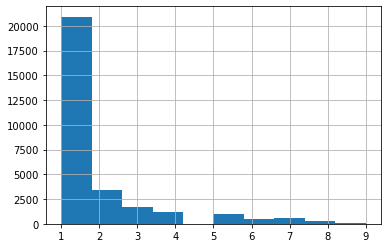

In [213]:
resumenSeries_un_nonZero['dias_inter_event'].hist()

In [214]:
resumenSeries_un_nonZero_df=resumenSeries_un_nonZero['dias_inter_event'].value_counts().to_frame()
resumenSeries_un_nonZero_df

dias_inter_event
1.0  20925           
2.0  3394            
3.0  1723            
4.0  1203            
5.0  942             
7.0  559             
6.0  507             
8.0  329             
9.0  83

In [215]:
resumenSeries_un_nonZero_df['part']=resumenSeries_un_nonZero['dias_inter_event'].value_counts()/len(resumenSeries_un_nonZero)
resumenSeries_un_nonZero_df

dias_inter_event      part
1.0  20925             0.333232
2.0  3394              0.054050
3.0  1723              0.027439
4.0  1203              0.019158
5.0  942               0.015001
7.0  559               0.008902
6.0  507               0.008074
8.0  329               0.005239
9.0  83                0.001322

In [216]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY  sig_event  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       9.0         
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN          
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0        
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN          
4      28      2022-02-16  012---1012           6.0      NaN          
...    ..             ...         ...           ...       ..          
62789  331243  2022-02-11  ZVZ---904            5.0      NaN          
62790  331253  2022-02-11  ZVZ---913            5.0      NaN          
62791  331263  2022-02-11  ZVZ---9332           5.0      NaN          
62792  331273  2022-02-11  ZVZ---969            5.0      NaN          
62793  331283  2022-02-11  ZVZ---975            5.0      NaN          

       dias_inter_event  
0      5.0               
1     NaN                
2      1.0               
3     NaN                
4     NaN                
...    ..                
62789 NaN                
62790 NaN                
62791 NaN                
62792 NaN                
62793 NaN                

[62794 rows x 6 columns]

In [217]:
resumenSeries_un_nonZero[['NODO','code']] = resumenSeries_un_nonZero['key'].str.split('---',expand=True)

In [218]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY  sig_event  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       9.0         
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN          
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0        
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN          
4      28      2022-02-16  012---1012           6.0      NaN          
...    ..             ...         ...           ...       ..          
62789  331243  2022-02-11  ZVZ---904            5.0      NaN          
62790  331253  2022-02-11  ZVZ---913            5.0      NaN          
62791  331263  2022-02-11  ZVZ---9332           5.0      NaN          
62792  331273  2022-02-11  ZVZ---969            5.0      NaN          
62793  331283  2022-02-11  ZVZ---975            5.0      NaN          

       dias_inter_event          NODO  code  
0      5.0               - CAMPO AZUL  3229  
1     NaN                - CAMPO AZUL  3229  
2      1.0               001AC3FF5272  2934  
3     NaN                001AC3FF5272  2934  
4     NaN                012           1012  
...    ..                ...            ...  
62789 NaN                ZVZ           904   
62790 NaN                ZVZ           913   
62791 NaN                ZVZ           9332  
62792 NaN                ZVZ           969   
62793 NaN                ZVZ           975   

[62794 rows x 8 columns]

## Conclusiones
* ¿Los eventos en dias consecutivos se pueden asociar a la misma ocurrencia?
* ¿ Son efectivas las reparaciones?¿Cuanto tiempo se se espera que dure la intervención?

# Validacion Espacial

## Exploración

In [219]:
import geopandas
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors

In [220]:
gdf1 = geopandas.read_file("espacial/OCTUBRE/COBERTURA_UNIF_OCTUBRE.shp")

In [221]:
gdf1

NODO TIPO           mpio_cnmbr    dpto_cnmbr       DIVISION  \
0      LSU   HFC  ZIPAQUIRÁ            CUNDINAMARCA  REGION CENTRO   
1      EDZ   HFC  ZIPAQUIRÁ            CUNDINAMARCA  REGION CENTRO   
2      MZQ   HFC  ZIPAQUIRÁ            CUNDINAMARCA  REGION CENTRO   
3      ULB   HFC  ZIPAQUIRÁ            CUNDINAMARCA  REGION CENTRO   
4      ZSP   HFC  ZIPAQUIRÁ            CUNDINAMARCA  REGION CENTRO   
...    ...   ...        ...                     ...            ...   
18269  None  DTH  FUSAGASUGÁ           CUNDINAMARCA  None            
18270  None  DTH  SAN JUAN DE RIOSECO  CUNDINAMARCA  None            
18271  None  DTH  HONDA                TOLIMA        None            
18272  None  DTH  SABANETA             ANTIOQUIA     None            
18273  None  DTH  LA ESTRELLA          ANTIOQUIA     None            

               AREA          ZONA   DISTRITO  \
0      BOGOTA NORTE  SABANA NORTE  ZIPAQUIRA   
1      BOGOTA NORTE  SABANA NORTE  ZIPAQUIRA   
2      BOGOTA NORTE  SABANA NORTE  ZIPAQUIRA   
3      BOGOTA NORTE  SABANA NORTE  ZIPAQUIRA   
4      BOGOTA NORTE  SABANA NORTE  ZIPAQUIRA   
...             ...           ...        ...   
18269  None          None          None        
18270  None          None          None        
18271  None          None          None        
18272  None          None          None        
18273  None          None          None        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [222]:
#gdf2 = geopandas.read_file("espacial/HFC_FTTH/HFC_FTTH.shp")

In [223]:
#gdf2

In [224]:
gdf1['NODO'].nunique()

16918

In [225]:
len(gdf1)

18274

In [226]:
#gdf2['NODO'].nunique()

In [227]:
#len(gdf2)

<AxesSubplot:>

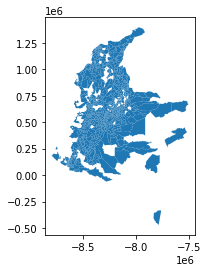

In [228]:
gdf1.plot()

In [229]:
#gdf2.plot()

In [230]:
gdf1[gdf1['NODO']=='LSU']

NODO TIPO mpio_cnmbr    dpto_cnmbr       DIVISION          AREA  \
0  LSU  HFC  ZIPAQUIRÁ  CUNDINAMARCA  REGION CENTRO  BOGOTA NORTE   

           ZONA   DISTRITO  \
0  SABANA NORTE  ZIPAQUIRA   

                                                                                                                                                                                                                                                                                                                                                                   geometry  
0  POLYGON ((-8236564.189 560360.757, -8236558.512 560366.903, -8236589.459 560536.204, -8236487.156 560578.557, -8236345.001 560427.024, -8236551.499 560363.104, -8236556.508 560355.169, -8236531.016 560207.772, -8236594.691 560198.162, -8236644.117 560191.680, -8236658.588 560267.334, -8236664.266 560266.552, -8236677.735 560340.307, -8236564.189 560360.757))

In [231]:
#gdf2[gdf2['NODO']=='LSU']

NameError: name 'gdf2' is not defined

In [ ]:
### Selecciopn gdf1

In [235]:
gdf1['NODO'].value_counts()

TOBG27    7
DTBG06    7
POBG51    7
DTBG05    7
POBG93    6
         ..
4A7013    1
4A0012    1
4A0013    1
4A6012    1
CNCL38    1
Name: NODO, Length: 16918, dtype: int64

In [236]:
gdf1[gdf1['NODO']=='TOBG27']

NODO  TIPO    mpio_cnmbr    dpto_cnmbr DIVISION  AREA  ZONA DISTRITO  \
14485  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      
14486  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      
14487  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      
14488  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      
14489  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      
14490  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      
14491  TOBG27  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None      

                                                                                                                                                               geometry  
14485  POLYGON ((-8240645.830 525061.584, -8240644.271 525093.417, -8240624.902 525092.300, -8240626.460 525056.446, -8240645.830 525061.584))                           
14486  POLYGON ((-8240522.933 525063.147, -8240510.354 525086.045, -8240474.732 525084.035, -8240505.233 525042.930, -8240522.933 525063.147))                           
14487  POLYGON ((-8240543.861 525059.461, -8240543.527 525087.832, -8240510.354 525086.045, -8240522.933 525063.147, -8240537.182 525061.025, -8240543.861 525059.461))  
14488  POLYGON ((-8240565.123 525054.212, -8240564.344 525088.949, -8240543.527 525087.832, -8240543.861 525059.461, -8240565.123 525054.212))                           
14489  POLYGON ((-8240606.868 525051.307, -8240604.642 525091.183, -8240585.272 525090.178, -8240587.165 525048.850, -8240589.168 525048.292, -8240606.868 525051.307))  
14490  POLYGON ((-8240626.460 525056.446, -8240624.902 525092.300, -8240604.642 525091.183, -8240606.868 525051.307, -8240607.870 525051.419, -8240626.460 525056.446))  
14491  POLYGON ((-8240664.643 525094.534, -8240666.201 525067.615, -8240676.777 525069.849, -8240689.356 525071.190, -8240688.465 525095.763, -8240664.643 525094.534))

<AxesSubplot:>

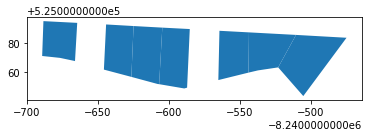

In [237]:
gdf1[gdf1['NODO']=='TOBG27'].plot()

<AxesSubplot:>

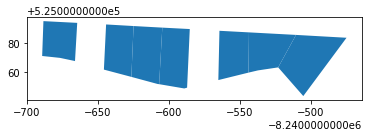

In [238]:
gdf1[gdf1['NODO']=='TOBG27'].plot()

In [239]:
gdf12 = gdf1.dissolve(by='NODO').reset_index()

<AxesSubplot:>

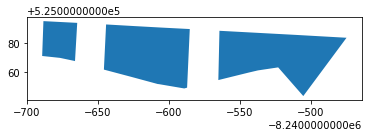

In [240]:
gdf12[gdf12['NODO']=='TOBG27'].plot()

In [241]:
gdf12[gdf12['NODO']=='TOBG27']

NODO  \
15468  TOBG27   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           geometry  \
15468  MULTIPOLYGON (((-8240474.732 525084.035, -8240505.233 525042.930, -8240522.933 525063.147, -8240537.182 525061.025, -8240543.861 525059.461, -8240565.123 525054.212, -8240564.344 525088.949, -8240543.527 525087.832, -8240510.354 525086.045, -8240474.732 525084.035)), ((-8240587.165 525048.850, -8240589.168 525048.292, -8240606.868 525051.307, -8240607.870 525051.419, -8240626.460 525056.446, -8240645.830 525061.584, -8240644.271 525093.417, -8240624.902 525092.300, -8240604.642 525091.183, -8240585.272 525090.178, -8240587.165 525048.850)), ((-8240689.356 525071.190, -8240688.465 525095.763, -8240664.643 525094.534, -8240666.201 525067.615, -8240676.777 525069.849, -8240689.356 525071.190)))   

       TIPO    mpio_cnmbr    dpto_cnmbr DIVISION  AREA  ZONA DISTRITO  
15468  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None

-8240689.355806214 525042.9302334791 -8240474.731841618 525095.7629008082
-8795376.453206109 -471243.533192914 -7504024.960798843 1398041.1861394434


<AxesSubplot:>

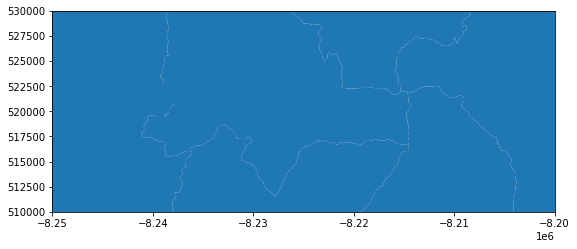

In [242]:
f, ax = plt.subplots(1, figsize=(9, 9))
minx, miny, maxx, maxy = gdf1[gdf1['NODO']=='TOBG27'].total_bounds
minx_t, miny_t, maxx_t, maxy_t = gdf1.total_bounds
print(minx, miny, maxx, maxy)
print(minx_t, miny_t, maxx_t, maxy_t)
#ax.set_xlim(-8795376, -7504024)
ax.set_xlim(-8250000, -8200000)
#ax.set_ylim(-471243, 1398041)
ax.set_ylim(510000, 530000)
gdf1.plot(ax=ax, linewidth=1)

<AxesSubplot:>

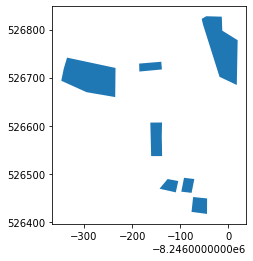

In [243]:
gdf1[gdf1['NODO']=='DTBG06'].plot()

<AxesSubplot:>

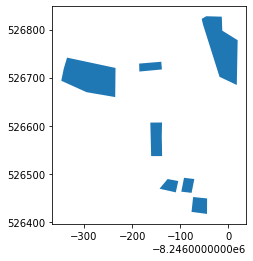

In [244]:
gdf12[gdf12['NODO']=='DTBG06'].plot()

In [245]:
gdf12[gdf12['NODO']=='DTBG06']

NODO  \
7333  DTBG06   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 geometry  \
7333  MULTIPOLYGON (((-8246044.380 526448.983, -8246044.603 526416.814, -8246076.774 526421.059, -8246073.434 526451.887, -8246044.380 526448.983)), ((-8246143.232 526469.201, -8246126.534 526489.307, -8246104.381 526485.174, -8246109.502 526461.605, -8246143.232 526469.201)), ((-8246098.036 526463.057, -8246092.359 526491.876, -8246070.985 526489.307, -8246076.663 526460.600, -8246098.036 526463.057)), ((-8246138.111 526606.814, -8246138.668 526577.660, -8246137.888 526537.002, -8246160.709 526537.002, -8246162.379 526606.591, -8246138.111 526606.814)), ((-8246294.960 526669.812, -8246347.503 526693.604, -8246342.160 526719.407, -8246335.480 526741.635, -8246234.736 526720.189, -8246235.404 526659.648, -8246294.960 526669.812)), ((-8246185.199 526712.705, -8246185.644 526729.236, -8246139.669 526733.034, -8246138.334 526717.061, -8246185.199 526712.705)), ((-8246012.877 526797.708, -8245980.928 526777.826, -8245982.709 526684.780, -8246018.554 526701.758, -8246053.063 526810.889, -8246055.623 526822.170, -8246046.161 526827.644, -8246013.878 526826.750, -8246012.877 526797.708)))   

      TIPO    mpio_cnmbr    dpto_cnmbr DIVISION  AREA  ZONA DISTRITO  
7333  FTTH  BOGOTÁ, D.C.  BOGOTÁ, D.C.  None     None  None  None

In [246]:
gdf12['NODO'].value_counts()

01J      1
NC4      1
NB3      1
NBA      1
NBB      1
        ..
C1S      1
C1T      1
C1U      1
C1U2D    1
ZVZ      1
Name: NODO, Length: 16918, dtype: int64

###  Cruzar con info Alarmas

In [247]:
resumen_dias_nodo.reset_index()

NODEALIAS   0
0      GS7000 HMS:172.28.152.19:001E6B57B4A2  10
1      Nodo V2R - CANAVERALES 2               10
2      Nodo T4L - TRONCAL 4                   10
3      BOGCCOPS01                             10
4      Nodo T6T - TRANSITO 6                  10
...                      ...                  ..
13150  MLA                                    1 
13151  MKV                                    1 
13152  MKR                                    1 
13153  BOGZ4RPS01                             1 
13154  BOGGO21PS01                            1 

[13155 rows x 2 columns]

In [248]:
resumen_dias_nodo=resumen_dias_nodo.reset_index()

In [249]:
resumen_dias_nodo.columns=['NODO','dias_A']

In [250]:
resumen_dias_nodo.set_index('NODO')

dias_A
NODO                                         
GS7000 HMS:172.28.152.19:001E6B57B4A2  10    
Nodo V2R - CANAVERALES 2               10    
Nodo T4L - TRONCAL 4                   10    
BOGCCOPS01                             10    
Nodo T6T - TRANSITO 6                  10    
...                                    ..    
MLA                                    1     
MKV                                    1     
MKR                                    1     
BOGZ4RPS01                             1     
BOGGO21PS01                            1     

[13155 rows x 1 columns]

<AxesSubplot:>

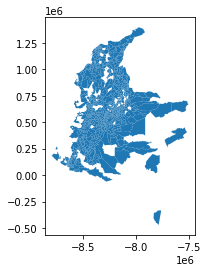

In [251]:
gdf1.plot()

<AxesSubplot:>

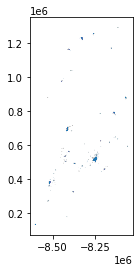

In [252]:
gdf12.plot()

In [253]:
#analisisNodos = geopandas.GeoDataFrame(gdf1.join(resumen_dias_nodo[[0]]), crs=lads.crs)\
#              .to_crs(epsg=3857)\
#              [['objectid', 'lad16nm', 'Pct_Leave', 'geometry']]\
#              .dropna()

In [254]:
gdf1.set_index('NODO',inplace=True)

<AxesSubplot:>

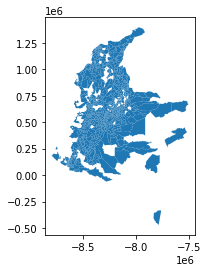

In [255]:
gdf1.plot()

In [256]:
analisisNodos = geopandas.GeoDataFrame(gdf1.join(resumen_dias_nodo.set_index('NODO')[['dias_A']]), crs=gdf1.crs)

<AxesSubplot:>

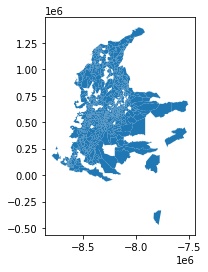

In [257]:
analisisNodos.plot()

In [258]:
analisisNodos.notnull().sum()

TIPO          18274
mpio_cnmbr    18274
dpto_cnmbr    18274
DIVISION      12777
AREA          12777
ZONA          12777
DISTRITO      12777
geometry      18271
dias_A        5874 
dtype: int64

In [259]:
analisisNodos['dias_A']=np.where(analisisNodos['dias_A'].isnull(),0,analisisNodos['dias_A'])

In [260]:
analisisNodos.describe()

dias_A
count  18274.000000
mean   0.959286    
std    2.166694    
min    0.000000    
25%    0.000000    
50%    0.000000    
75%    1.000000    
max    10.000000

C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


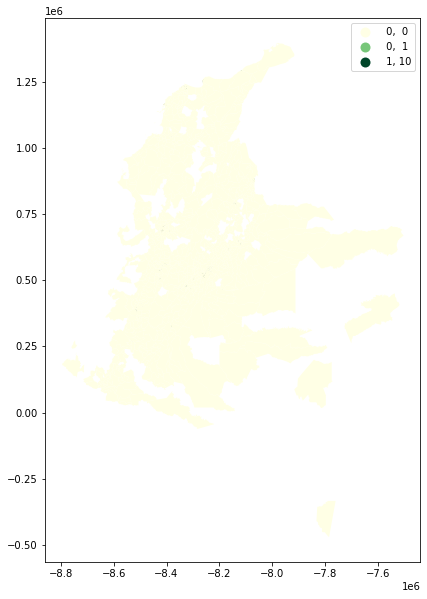

In [261]:
ax = analisisNodos.plot(
    column='dias_A',          # Data to plot
    scheme='Quantiles',          # Classification scheme
    cmap='YlGn',                 # Color palette
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'}, # Remove decimals in legend
    figsize=(10, 10)
)
#ax.set_axis_off();

C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


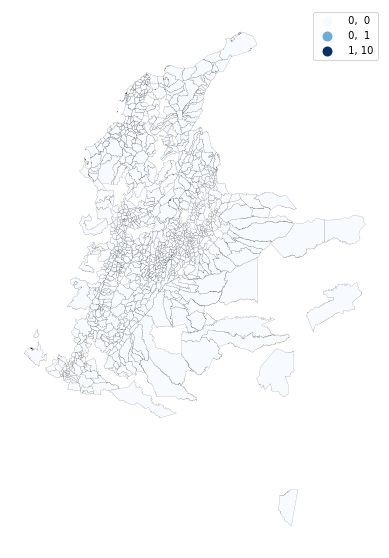

In [262]:
ax = analisisNodos.plot(
    column='dias_A',          # Data to plot
    scheme='Quantiles',          # Classification scheme
    cmap='Blues',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.1,               # Borderline width
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(10, 10)
)
ax.set_axis_off();

<AxesSubplot:>

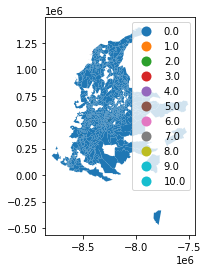

In [263]:
analisisNodos.plot('dias_A',categorical=True, legend=True)

<AxesSubplot:>

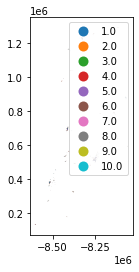

In [264]:
analisisNodos[analisisNodos['dias_A']>=1].plot('dias_A',categorical=True, legend=True)

In [265]:
# copy GeoDataFrame
points = analisisNodos.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid

In [266]:
points.head()

TIPO    mpio_cnmbr    dpto_cnmbr       DIVISION          AREA  \
NODO                                                                 
01J   HFC  MONTERÍA      CÓRDOBA       REGION COSTA   COSTA SUR      
01S   HFC  BOGOTÁ, D.C.  BOGOTÁ, D.C.  REGION CENTRO  BOGOTA NORTE   
02J   HFC  MONTERÍA      CÓRDOBA       REGION COSTA   COSTA SUR      
02S   HFC  BOGOTÁ, D.C.  BOGOTÁ, D.C.  REGION CENTRO  BOGOTA NORTE   
03J   HFC  MONTERÍA      CÓRDOBA       REGION COSTA   COSTA SUR      

               ZONA                  DISTRITO  \
NODO                                            
01J   CORDOBA SUCRE  CORDOBA SUCRE DISTRITO 3   
01S   SUBA           GAITANA                    
02J   CORDOBA SUCRE  CORDOBA SUCRE DISTRITO 4   
02S   SUBA           GAITANA                    
03J   CORDOBA SUCRE  CORDOBA SUCRE DISTRITO 4   

                             geometry  dias_A  
NODO                                           
01J   POINT (-8447598.402 977950.182)  0.0     
01S   POINT (-8249846.872 527509.284)  5.0     
02J   POINT (-8447432.338 977950.808)  2.0     
02S   POINT (-8249693.336 527364.140)  0.0     
03J   POINT (-8447348.268 977772.527)  0.0

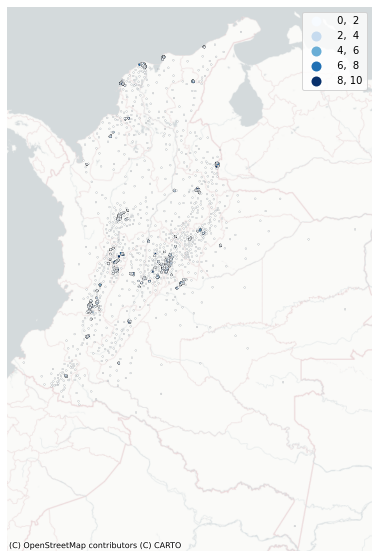

In [267]:
ax = points.plot(
    column='dias_A',          # Data to plot
    scheme='equal_interval',          # Classification scheme
    cmap='Blues',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.1,               # Borderline width
    markersize=3,
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(10, 10)
)
ax.set_axis_off();

contextily.add_basemap(ax, 
                       crs=points.crs, 
                       #source=contextily.providers.Stamen.TerrainBackground
                       source=contextily.providers.CartoDB.PositronNoLabels
                      )

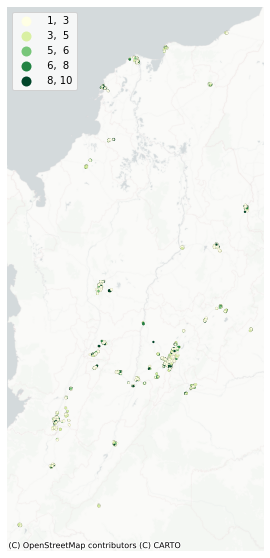

In [268]:
ax = points[points['dias_A']>0].plot(
    column='dias_A',          # Data to plot
    scheme='equal_interval',          # Classification scheme
    cmap='YlGn',                # Color palette
    edgecolor='k',
    markersize=5, # Borderline color
    linewidth=0.03,               # Borderline width
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(10, 10)
)
ax.set_axis_off();

contextily.add_basemap(ax, 
                       crs=points.crs, 
                       #source=contextily.providers.Stamen.TerrainBackground
                       source=contextily.providers.CartoDB.PositronNoLabels
                      )

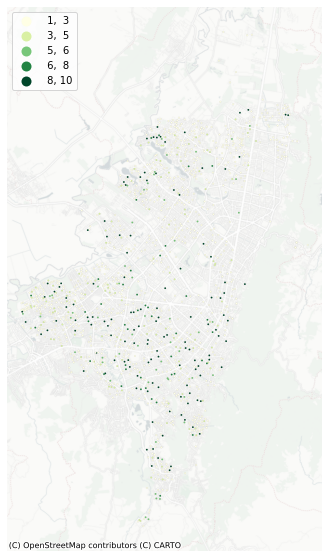

In [269]:
#DIVISION
ax = points[(points['dias_A']>0)&(points['dpto_cnmbr']=='BOGOTÁ, D.C.')].plot(
    column='dias_A',          # Data to plot
    scheme='equal_interval',          # Classification scheme
    cmap='YlGn',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.03,               # Borderline width
    markersize=3,
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(10, 10)
)
ax.set_axis_off();

contextily.add_basemap(ax, 
                       crs=points.crs, 
                       #source=contextily.providers.Stamen.TerrainBackground
                       source=contextily.providers.CartoDB.PositronNoLabels
                      )

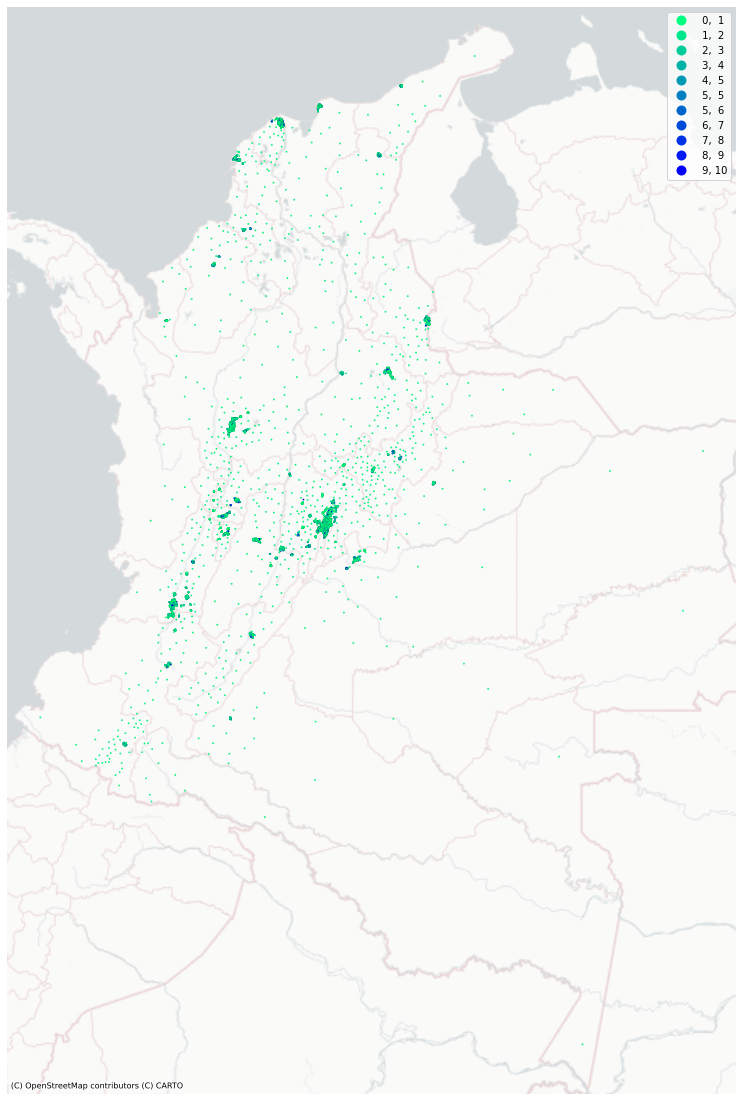

In [270]:
#DIVISION
ax = points.plot(
    column='dias_A',          # Data to plot
    scheme='equal_interval',          # Classification scheme
    k=11,
    cmap='winter_r',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.03,
    markersize=3,# Borderline width
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(20, 20)
)
ax.set_axis_off();

contextily.add_basemap(ax, 
                       crs=points.crs, 
                       #source=contextily.providers.Stamen.TerrainBackground
                       source=contextily.providers.CartoDB.PositronNoLabels
                       #source=contextily.providers.Stamen.TonerLabels
                      )

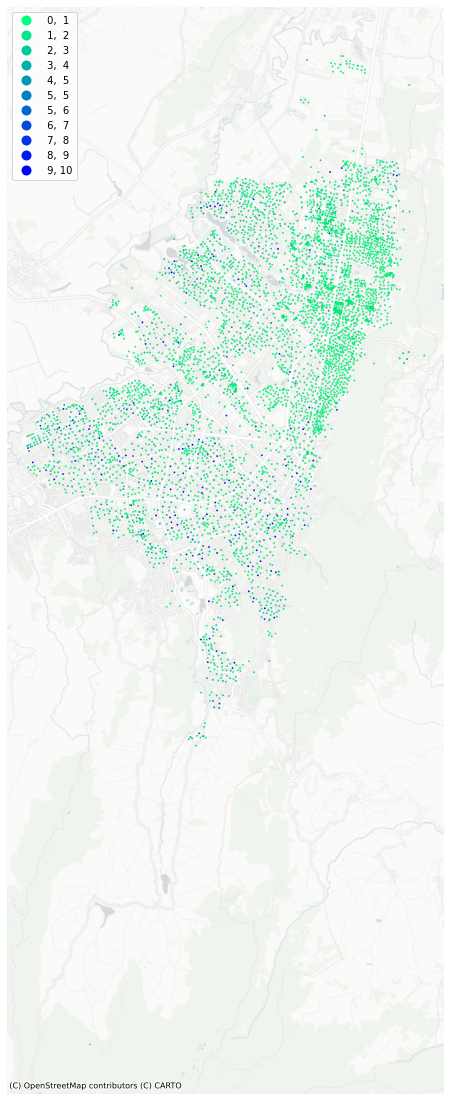

In [271]:
#DIVISION
ax = points[points['dpto_cnmbr']=='BOGOTÁ, D.C.'].plot(
    column='dias_A',          # Data to plot
    scheme='equal_interval',          # Classification scheme
    k=11,
    cmap='winter_r',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.03,
    markersize=3,# Borderline width
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(20, 20)
)
ax.set_axis_off();

contextily.add_basemap(ax, 
                       crs=points.crs, 
                       #source=contextily.providers.Stamen.TerrainBackground
                       source=contextily.providers.CartoDB.PositronNoLabels
                       #source=contextily.providers.Stamen.TonerLabels
                      )

### Distribución de tiempo de ocurrencia

In [272]:
analisisNodos_ocurrencia = geopandas.GeoDataFrame(gdf1.join(resumenSeries_un_nonZero.set_index('NODO')[['dias_inter_event']]), crs=gdf1.crs)

In [273]:
analisisNodos_ocurrencia['dias_inter_event']=np.where(analisisNodos_ocurrencia['dias_inter_event'].isnull(),0,analisisNodos_ocurrencia['dias_inter_event'])

In [274]:
# copy GeoDataFrame
points_ocurrencia = analisisNodos_ocurrencia.copy()
# change geometry 
points_ocurrencia['geometry'] = points_ocurrencia['geometry'].centroid

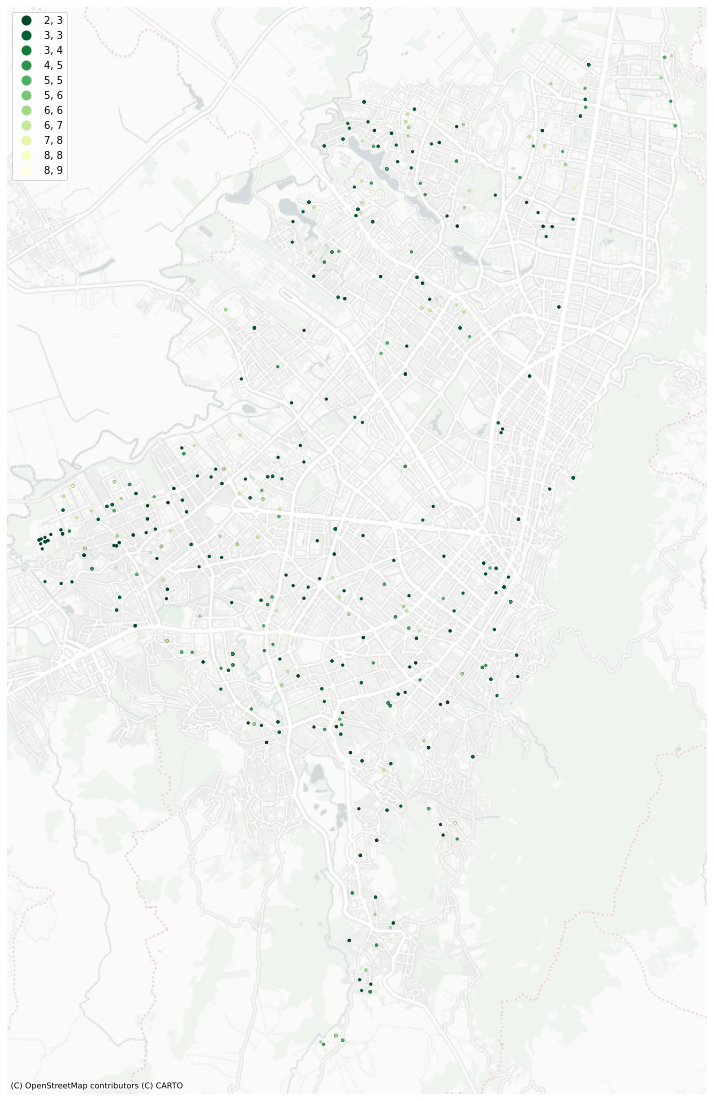

In [275]:
#DIVISION
ax = points_ocurrencia[(points_ocurrencia['dpto_cnmbr']=='BOGOTÁ, D.C.')&(points_ocurrencia['dias_inter_event']>=2)].plot(
    column='dias_inter_event',          # Data to plot
    scheme='equal_interval',          # Classification scheme
    k=11,
    cmap='YlGn_r',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.03,
    markersize=10,# Borderline width
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
    ,figsize=(20, 20)
)
ax.set_axis_off();

contextily.add_basemap(ax, 
                       crs=points.crs, 
                       #source=contextily.providers.Stamen.TerrainBackground
                       source=contextily.providers.CartoDB.PositronNoLabels
                       #source=contextily.providers.Stamen.TonerLabels
                      )

## Fin Distribución ocurrencia

In [276]:
points['lon'] = points['geometry'].x
points['lat'] = points['geometry'].y

In [278]:
"""
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    points['lon'], 
    points['lat'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()"""

"\n# Set up figure and axis\nf, ax = plt.subplots(1, figsize=(9, 9))\n# Generate and add KDE with a shading of 50 gradients \n# coloured contours, 75% of transparency,\n# and the reverse viridis colormap\nseaborn.kdeplot(\n    points['lon'], \n    points['lat'],\n    n_levels=50, \n    shade=True,\n    alpha=0.55, \n    cmap='viridis_r'\n)\n# Add basemap\ncontextily.add_basemap(\n    ax, \n    source=contextily.providers.CartoDB.Positron\n)\n# Remove axes\nax.set_axis_off()"

### Lisa

In [ ]:
#Zoom Bogota

In [ ]:
## Validacion

In [ ]:
analisisNodosCentroides=analisisNodos.centroid
analisisNodosCentroides_df = pd.DataFrame({'X': analisisNodosCentroides.x, 'Y': analisisNodosCentroides.y})

In [ ]:
analisisNodosCentroides_df

In [ ]:
seaborn.jointplot(x='X', y='Y', data=analisisNodosCentroides_df, s=0.5);
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

In [232]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='x', y='y', data=analisisNodosCentroides_df, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, 
    source=contextily.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

NameError: name 'analisisNodosCentroides_df' is not defined

# Fin validación espacial

## Predicciones
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0259764
* Revisar articulo

### Plan
* Clasificar casos
* Exponential Smoothing
* Ets
* Putty

In [279]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY  sig_event  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       9.0         
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN          
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0        
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN          
4      28      2022-02-16  012---1012           6.0      NaN          
...    ..             ...         ...           ...       ..          
62789  331243  2022-02-11  ZVZ---904            5.0      NaN          
62790  331253  2022-02-11  ZVZ---913            5.0      NaN          
62791  331263  2022-02-11  ZVZ---9332           5.0      NaN          
62792  331273  2022-02-11  ZVZ---969            5.0      NaN          
62793  331283  2022-02-11  ZVZ---975            5.0      NaN          

       dias_inter_event          NODO  code  
0      5.0               - CAMPO AZUL  3229  
1     NaN                - CAMPO AZUL  3229  
2      1.0               001AC3FF5272  2934  
3     NaN                001AC3FF5272  2934  
4     NaN                012           1012  
...    ..                ...            ...  
62789 NaN                ZVZ           904   
62790 NaN                ZVZ           913   
62791 NaN                ZVZ           9332  
62792 NaN                ZVZ           969   
62793 NaN                ZVZ           975   

[62794 rows x 8 columns]

In [280]:
# Numero de Eventos por Nodo-Codigo
id_casos=resumenSeries_un_nonZero['key'].value_counts().to_frame().reset_index()
id_casos.columns=['key','num_casos']
id_casos

key  num_casos
0      BRS---2934                     10       
1      B55---2934                     10       
2      NODO BEX - BELLO 49---2934     10       
3      NODO B0E - BELLO 10---2934     10       
4      NODO AUC - ARANJUEZ 12---2934  10       
...                              ...  ..       
33124  CHIMORPS01---9334              1        
33125  CHIMORPS01---893               1        
33126  CHIMORPS01---833               1        
33127  CHIMORPS01---827               1        
33128  ZVZ---975                      1        

[33129 rows x 2 columns]

In [281]:
id_casos[['NODO','code']] = id_casos['key'].str.split('---',expand=True)
id_casos

key  num_casos                    NODO  code
0      BRS---2934                     10         BRS                     2934
1      B55---2934                     10         B55                     2934
2      NODO BEX - BELLO 49---2934     10         NODO BEX - BELLO 49     2934
3      NODO B0E - BELLO 10---2934     10         NODO B0E - BELLO 10     2934
4      NODO AUC - ARANJUEZ 12---2934  10         NODO AUC - ARANJUEZ 12  2934
...                              ...  ..                            ...   ...
33124  CHIMORPS01---9334              1          CHIMORPS01              9334
33125  CHIMORPS01---893               1          CHIMORPS01              893 
33126  CHIMORPS01---833               1          CHIMORPS01              833 
33127  CHIMORPS01---827               1          CHIMORPS01              827 
33128  ZVZ---975                      1          ZVZ                     975 

[33129 rows x 4 columns]

In [282]:
#Alarmas que se presentan permanentemente
id_casos['tipo'] = np.where(id_casos['num_casos']==dias_totales,'permanente',np.nan)

In [283]:
id_casos['tipo'].value_counts()

nan           31955
permanente    1174 
Name: tipo, dtype: int64

In [284]:
id_casos

key  num_casos                    NODO  code  \
0      BRS---2934                     10         BRS                     2934   
1      B55---2934                     10         B55                     2934   
2      NODO BEX - BELLO 49---2934     10         NODO BEX - BELLO 49     2934   
3      NODO B0E - BELLO 10---2934     10         NODO B0E - BELLO 10     2934   
4      NODO AUC - ARANJUEZ 12---2934  10         NODO AUC - ARANJUEZ 12  2934   
...                              ...  ..                            ...   ...   
33124  CHIMORPS01---9334              1          CHIMORPS01              9334   
33125  CHIMORPS01---893               1          CHIMORPS01              893    
33126  CHIMORPS01---833               1          CHIMORPS01              833    
33127  CHIMORPS01---827               1          CHIMORPS01              827    
33128  ZVZ---975                      1          ZVZ                     975    

             tipo  
0      permanente  
1      permanente  
2      permanente  
3      permanente  
4      permanente  
...           ...  
33124  nan         
33125  nan         
33126  nan         
33127  nan         
33128  nan         

[33129 rows x 5 columns]

In [285]:
id_casos.isnull().sum()

key          0
num_casos    0
NODO         0
code         0
tipo         0
dtype: int64

In [286]:
#Actualmente Alarma

In [287]:
alarma_actual=resumenSeries_un_nonZero[resumenSeries_un_nonZero['fecha']==max_fecha]
alarma_actual

index       fecha                  key  SEVERITY  sig_event  \
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN          
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN          
42     239     2022-02-17  044---9332           4.0      NaN          
43     249     2022-02-17  044---969            5.0      NaN          
49     259     2022-02-17  048---891            6.0      NaN          
...    ...            ...        ...            ...       ..          
62749  331089  2022-02-17  ZS3---975            1.0      NaN          
62759  331099  2022-02-17  ZSP---1012           6.0      NaN          
62761  331119  2022-02-17  ZTF---891            6.0      NaN          
62770  331139  2022-02-17  ZUL---913            5.0      NaN          
62779  331169  2022-02-17  ZUL---975            5.0      NaN          

       dias_inter_event          NODO  code  
1     NaN                - CAMPO AZUL  3229  
3     NaN                001AC3FF5272  2934  
42    NaN                044           9332  
43    NaN                044           969   
49    NaN                048           891   
...    ..                ...           ...   
62749 NaN                ZS3           975   
62759 NaN                ZSP           1012  
62761 NaN                ZTF           891   
62770 NaN                ZUL           913   
62779 NaN                ZUL           975   

[6117 rows x 8 columns]

In [288]:
id_casos['tipo'] = np.where(id_casos['tipo']!='nan',id_casos['tipo'],np.where(id_casos['key'].isin(alarma_actual['key'].unique()),'actual',np.NaN))

In [289]:
id_casos['tipo'].value_counts()

nan           27012
actual        4943 
permanente    1174 
Name: tipo, dtype: int64

In [290]:
#Un solo casos (sin repetir cada dia)

In [291]:
casos_mayor_1_df=resumenSeries_un_nonZero[resumenSeries_un_nonZero['dias_inter_event']>1]['key'].unique()
casos_mayor_1_df

array(['- CAMPO AZUL---3229', '01S---761', '01S---827', ..., 'ZTF---9334',
       'ZUP---827', 'ZUP---9334'], dtype=object)

In [292]:
len(set(list(resumenSeries_un_nonZero['key'].unique())))

33129

In [293]:
len(set(list(casos_mayor_1_df)))

7029

In [294]:
#resumenSeries_un
len(set(list(resumenSeries_un['key'].unique())))

33129

In [295]:
casos_solo_1=set(list(resumenSeries_un_nonZero['key'].unique()))-set(list(casos_mayor_1_df))
len(casos_solo_1)

26100

In [296]:
# solo un evento

In [297]:
id_casos['tipo'] = np.where(id_casos['tipo']!='nan',id_casos['tipo'],np.where(id_casos['key'].isin(casos_solo_1),'solo_1','>1_caso'))

In [298]:
id_casos['tipo'].value_counts()

solo_1        22330
actual        4943 
>1_caso       4682 
permanente    1174 
Name: tipo, dtype: int64

In [305]:
def pieChart(col):
    A = col.value_counts()
    indices = A.index
    plt.pie(A, labels=indices, autopct="%0.1f %%")
    plt.axis("equal")
    plt.show()    

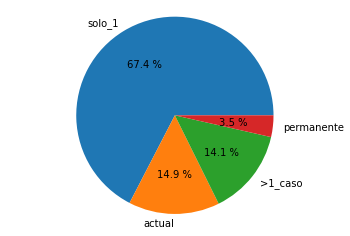

In [306]:
#id_casos['tipo'].value_counts().plot.pie()
pieChart(id_casos['tipo'])

In [299]:
#Validación

In [338]:
id_casos[(id_casos['tipo']=='>1_caso')&(id_casos['num_casos']>3)].sample(3)

key  num_casos        NODO code     tipo
3081  SOGGG1PS01---761  4          SOGGG1PS01  761  >1_caso
2226  COQ---891         6          COQ         891  >1_caso
2733  CHICH7PS01---894  4          CHICH7PS01  894  >1_caso

In [335]:
resumenSeries_un[resumenSeries_un['key']=='FUSTHEPS01---827']

key  SEVERITY
fecha                                 
2022-02-08  FUSTHEPS01---827  1.0     
2022-02-09  FUSTHEPS01---827  0.0     
2022-02-10  FUSTHEPS01---827  0.0     
2022-02-11  FUSTHEPS01---827  0.0     
2022-02-12  FUSTHEPS01---827  0.0     
2022-02-13  FUSTHEPS01---827  0.0     
2022-02-14  FUSTHEPS01---827  1.0     
2022-02-15  FUSTHEPS01---827  0.0     
2022-02-16  FUSTHEPS01---827  1.0     
2022-02-17  FUSTHEPS01---827  0.0

<AxesSubplot:title={'center':'CHICH7PS01---894'}, xlabel='fecha'>

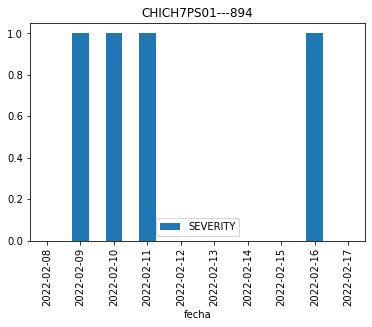

In [340]:
resumenSeries_un[resumenSeries_un['key']=='CHICH7PS01---894'][['SEVERITY']].plot.bar(title='CHICH7PS01---894')

## Caracterización de códigos de Alarma
* Mayor frecuencia
* Tiempo en que se demoran en solucionar mean y mediana, contar 1s
* Frecuencia de ocurrencia despúes de solucionar

In [345]:
resumen_dias_code=resumenSeries[['CODALARM_2']].value_counts().to_frame()
resumen_dias_code.columns=['num_casos']
resumen_dias_code

num_casos
CODALARM_2           
1012        11126    
9332        7943     
969         6967     
2934        5137     
891         5089     
904         3925     
9334        3905     
827         3401     
913         3118     
975         2301     
761         2011     
894         1693     
833         1176     
3304        1017     
893         613      
9333        612      
4           506      
2           410      
3229        285      
981         265      
895         229      
2793        177      
751         159      
13          142      
949         132      
1           103      
839         77       
12          76       
81          25       
3151        25       
9080        21       
3211        20       
4943        19       
411         19       
4656        18       
3160        12       
429         11       
3142        9        
8469        6        
9100        6        
402         6        
8466        1        
9107        1

<AxesSubplot:xlabel='CODALARM_2'>

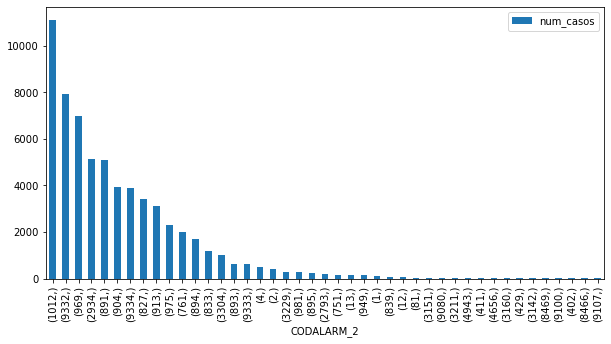

In [346]:
resumen_dias_code.plot.bar(figsize=(10,5))

In [353]:
### frecuencia Ocurrencia
frecuencia_median_code=resumenSeries_un_nonZero[resumenSeries_un_nonZero['dias_inter_event']>1].groupby('code')[['dias_inter_event']].median()
frecuencia_median_code=frecuencia_median_code.sort_values('dias_inter_event',ascending=False)
frecuencia_median_code

dias_inter_event
code                  
1     5.0             
827   4.0             
969   4.0             
9334  4.0             
9332  4.0             
3211  3.5             
9333  3.0             
891   3.0             
904   3.0             
913   3.0             
761   3.0             
751   3.0             
4943  3.0             
4     3.0             
894   3.0             
3229  3.0             
3151  3.0             
2793  3.0             
2     3.0             
13    3.0             
975   3.0             
893   3.0             
949   2.0             
9100  2.0             
895   2.0             
81    2.0             
8469  2.0             
839   2.0             
833   2.0             
1012  2.0             
4656  2.0             
411   2.0             
3304  2.0             
3142  2.0             
2934  2.0             
12    2.0             
981   2.0

<AxesSubplot:xlabel='code'>

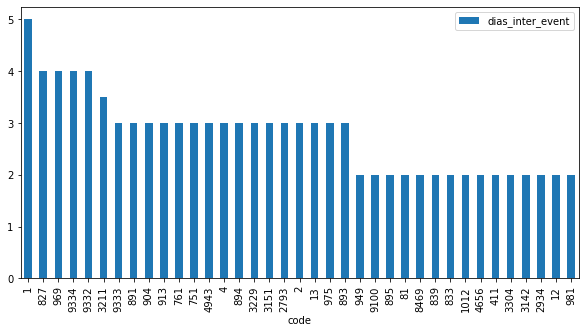

In [354]:
frecuencia_median_code.plot.bar(figsize=(10,5))

<AxesSubplot:title={'center':'dias_inter_event'}, xlabel='[code]'>

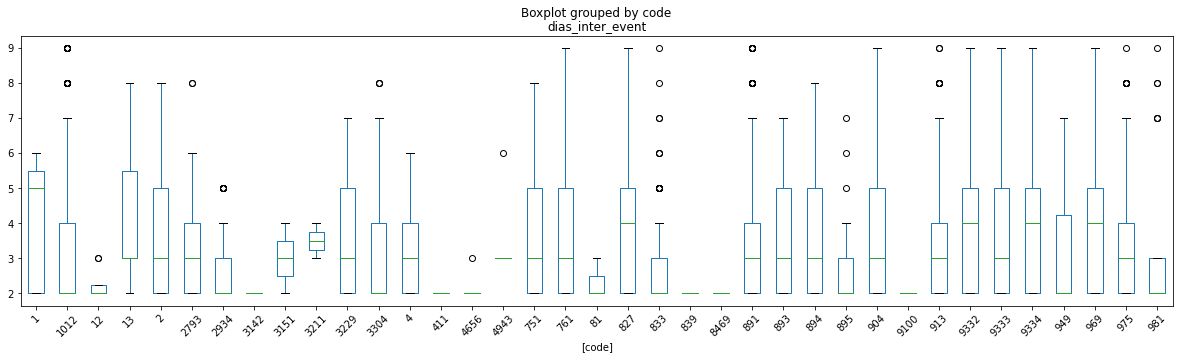

In [362]:
resumenSeries_un_nonZero[resumenSeries_un_nonZero['dias_inter_event']>1][['code','dias_inter_event']].boxplot(by=['code'],figsize=(20,5), grid=False, rot=45)

In [349]:
resumenSeries_un_nonZero[resumenSeries_un_nonZero['code']=='3160']

index       fecha                                     key  SEVERITY  \
41426  228508  2022-02-16  NODO 055,552D,553D,554D.---3160         1.0        
41475  228765  2022-02-13  NODO 34A1,34A12D,34A13D,34A14D.---3160  5.0        
41477  228783  2022-02-11  NODO 3801,38012D,38013D,38014D.---3160  5.0        
41519  228917  2022-02-15  NODO 50B,50B2D,50B3D,50B4D.---3160      1.0        
41640  229272  2022-02-10  NODO BJ1,BJ12D,BJ13D,BJ14D.---3160      5.0        
41792  229916  2022-02-14  NODO FG2,FG22D,FG23D,FG24D.---3160      1.0        
41831  230067  2022-02-15  NODO GH1,GH12D,GH13D,GH14D.---3160      1.0        
41895  230418  2022-02-16  NODO LRO2,LRO22D,LRO23D,LRO24D.---3160  5.0        
41902  230485  2022-02-13  NODO MAA. - MIRADOR DE ALAMEDA---3160   1.0        
42093  231200  2022-02-08  NODO SFT1,SFT12D,SFT13D,SFT14D.---3160  1.0        
52378  277137  2022-02-15  SG4000 11EA51---3160                    5.0        
52401  277310  2022-02-08  SG4000 19D25D---3160                    5.0        

       sig_event  dias_inter_event                             NODO  code  
41426 NaN        NaN                NODO 055,552D,553D,554D.         3160  
41475 NaN        NaN                NODO 34A1,34A12D,34A13D,34A14D.  3160  
41477 NaN        NaN                NODO 3801,38012D,38013D,38014D.  3160  
41519 NaN        NaN                NODO 50B,50B2D,50B3D,50B4D.      3160  
41640 NaN        NaN                NODO BJ1,BJ12D,BJ13D,BJ14D.      3160  
41792 NaN        NaN                NODO FG2,FG22D,FG23D,FG24D.      3160  
41831 NaN        NaN                NODO GH1,GH12D,GH13D,GH14D.      3160  
41895 NaN        NaN                NODO LRO2,LRO22D,LRO23D,LRO24D.  3160  
41902 NaN        NaN                NODO MAA. - MIRADOR DE ALAMEDA   3160  
42093 NaN        NaN                NODO SFT1,SFT12D,SFT13D,SFT14D.  3160  
52378 NaN        NaN                SG4000 11EA51                    3160  
52401 NaN        NaN                SG4000 19D25D                    3160

In [ ]:
# tiempo en que se demoran es solucionar

In [365]:
df_seguimos=resumenSeries_un_nonZero[resumenSeries_un_nonZero['dias_inter_event']==1]
df_seguimos

index       fecha                  key  SEVERITY  sig_event  \
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0        
5      34      2022-02-12  015---1012           1.0       35.0        
6      35      2022-02-13  015---1012           1.0       36.0        
9      42      2022-02-10  01S---761            5.0       43.0        
29     160     2022-02-08  037---913            5.0       161.0       
...    ...            ...        ...            ...         ...       
62774  331164  2022-02-12  ZUL---975            5.0       331165.0    
62775  331165  2022-02-13  ZUL---975            5.0       331166.0    
62776  331166  2022-02-14  ZUL---975            5.0       331167.0    
62777  331167  2022-02-15  ZUL---975            5.0       331168.0    
62778  331168  2022-02-16  ZUL---975            5.0       331169.0    

       dias_inter_event          NODO  code  
2      1.0               001AC3FF5272  2934  
5      1.0               015           1012  
6      1.0               015           1012  
9      1.0               01S           761   
29     1.0               037           913   
...    ...               ...           ...   
62774  1.0               ZUL           975   
62775  1.0               ZUL           975   
62776  1.0               ZUL           975   
62777  1.0               ZUL           975   
62778  1.0               ZUL           975   

[20925 rows x 8 columns]

# Fin predicion1

# Modelo LGBM

# Preparacion input
* Etiquetas
* Distancias
* Parametros

In [894]:
resumenSeries_un_nonZero

index       fecha                  key  SEVERITY  sig_event  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       9.0         
1      9       2022-02-17  - CAMPO AZUL---3229  1.0      NaN          
2      18      2022-02-16  001AC3FF5272---2934  6.0       19.0        
3      19      2022-02-17  001AC3FF5272---2934  6.0      NaN          
4      28      2022-02-16  012---1012           6.0      NaN          
...    ..             ...         ...           ...       ..          
62789  331243  2022-02-11  ZVZ---904            5.0      NaN          
62790  331253  2022-02-11  ZVZ---913            5.0      NaN          
62791  331263  2022-02-11  ZVZ---9332           5.0      NaN          
62792  331273  2022-02-11  ZVZ---969            5.0      NaN          
62793  331283  2022-02-11  ZVZ---975            5.0      NaN          

       dias_inter_event          NODO  code  
0      5.0               - CAMPO AZUL  3229  
1     NaN                - CAMPO AZUL  3229  
2      1.0               001AC3FF5272  2934  
3     NaN                001AC3FF5272  2934  
4     NaN                012           1012  
...    ..                ...            ...  
62789 NaN                ZVZ           904   
62790 NaN                ZVZ           913   
62791 NaN                ZVZ           9332  
62792 NaN                ZVZ           969   
62793 NaN                ZVZ           975   

[62794 rows x 8 columns]

In [895]:
resumenSeries_un

key  SEVERITY          NODO  code
fecha                                                        
2022-02-08  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-09  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-10  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-11  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229
...                         ...  ...                ...   ...
2022-02-13  ZVZ---975            0.0       ZVZ           975 
2022-02-14  ZVZ---975            0.0       ZVZ           975 
2022-02-15  ZVZ---975            0.0       ZVZ           975 
2022-02-16  ZVZ---975            0.0       ZVZ           975 
2022-02-17  ZVZ---975            0.0       ZVZ           975 

[331290 rows x 4 columns]

In [896]:
resumenSeries_un[['NODO','code']] = resumenSeries_un['key'].str.split('---',expand=True)
resumenSeries_un

key  SEVERITY          NODO  code
fecha                                                        
2022-02-08  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-09  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-10  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-11  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229
...                         ...  ...                ...   ...
2022-02-13  ZVZ---975            0.0       ZVZ           975 
2022-02-14  ZVZ---975            0.0       ZVZ           975 
2022-02-15  ZVZ---975            0.0       ZVZ           975 
2022-02-16  ZVZ---975            0.0       ZVZ           975 
2022-02-17  ZVZ---975            0.0       ZVZ           975 

[331290 rows x 4 columns]

#### Etiquetas

In [897]:
max_fecha

datetime.date(2022, 2, 17)

In [898]:
p_diasEtiqueta=3
fecha_ini_etiqueta=max_fecha - timedelta(days=p_diasEtiqueta-1)
fecha_ini_etiqueta

datetime.date(2022, 2, 15)

In [899]:
df_etiquetas=resumenSeries_un[resumenSeries_un.index>=fecha_ini_etiqueta][['key','SEVERITY']].groupby('key').sum()
df_etiquetas['output']=np.where(df_etiquetas['SEVERITY']>0,1,0)
df_etiquetas

SEVERITY  output
key                                  
- CAMPO AZUL---3229  1.0       1     
001AC3FF5272---2934  12.0      1     
012---1012           6.0       1     
015---1012           0.0       0     
01S---761            5.0       1     
...                  ...      ..     
ZVZ---904            0.0       0     
ZVZ---913            0.0       0     
ZVZ---9332           0.0       0     
ZVZ---969            0.0       0     
ZVZ---975            0.0       0     

[33129 rows x 2 columns]

### Distancias

In [900]:
### Repetir proceso inicial con corte Fechas

In [901]:
df_base=resumenSeries_un[resumenSeries_un.index<fecha_ini_etiqueta]
df_base

key  SEVERITY          NODO  code
fecha                                                        
2022-02-08  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-09  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-10  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-11  - CAMPO AZUL---3229  0.0       - CAMPO AZUL  3229
2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229
...                         ...  ...                ...   ...
2022-02-10  ZVZ---975            0.0       ZVZ           975 
2022-02-11  ZVZ---975            5.0       ZVZ           975 
2022-02-12  ZVZ---975            0.0       ZVZ           975 
2022-02-13  ZVZ---975            0.0       ZVZ           975 
2022-02-14  ZVZ---975            0.0       ZVZ           975 

[231903 rows x 4 columns]

In [902]:
#df_base=df_distancias.copy()

In [903]:
df_base=df_base.reset_index()
df_distancias_nz=df_base[df_base['SEVERITY']!=0].reset_index()
df_distancias_nz['sig_event']=df_distancias_nz.groupby('key')['index'].shift(periods=-1)
df_distancias_nz['dias_inter_event']=df_distancias_nz['sig_event']-df_distancias_nz['index']
df_distancias_nz

index       fecha                  key  SEVERITY          NODO  code  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229   
1      25      2022-02-12  015---1012           1.0       015           1012   
2      26      2022-02-13  015---1012           1.0       015           1012   
3      27      2022-02-14  015---1012           1.0       015           1012   
4      28      2022-02-08  01S---761            1.0       01S           761    
...    ..             ...        ...            ...       ...           ...    
42412  231871  2022-02-11  ZVZ---904            5.0       ZVZ           904    
42413  231878  2022-02-11  ZVZ---913            5.0       ZVZ           913    
42414  231885  2022-02-11  ZVZ---9332           5.0       ZVZ           9332   
42415  231892  2022-02-11  ZVZ---969            5.0       ZVZ           969    
42416  231899  2022-02-11  ZVZ---975            5.0       ZVZ           975    

       sig_event  dias_inter_event  
0     NaN        NaN                
1      26.0       1.0               
2      27.0       1.0               
3     NaN        NaN                
4      30.0       2.0               
...     ...       ...               
42412 NaN        NaN                
42413 NaN        NaN                
42414 NaN        NaN                
42415 NaN        NaN                
42416 NaN        NaN                

[42417 rows x 8 columns]

In [904]:
distancias_df=df_distancias_nz[df_distancias_nz['dias_inter_event']>1]
distancias_df

index       fecha         key  SEVERITY NODO  code  sig_event  \
4      28      2022-02-08  01S---761   1.0       01S  761   30.0        
6      31      2022-02-11  01S---761   1.0       01S  761   33.0        
8      35      2022-02-08  01S---827   1.0       01S  827   38.0        
10     42      2022-02-08  01S---893   1.0       01S  893   45.0        
15     72      2022-02-10  02J---9332  4.0       02J  9332  75.0        
...    ..             ...         ...  ...       ...   ...   ...        
42346  231589  2022-02-09  ZOV---893   1.0       ZOV  893   231593.0    
42348  231596  2022-02-09  ZOV---9334  4.0       ZOV  9334  231600.0    
42394  231784  2022-02-08  ZTF---9334  4.0       ZTF  9334  231786.0    
42406  231819  2022-02-08  ZUP---827   1.0       ZUP  827   231821.0    
42408  231826  2022-02-08  ZUP---9334  1.0       ZUP  9334  231828.0    

       dias_inter_event  
4      2.0               
6      2.0               
8      3.0               
10     3.0               
15     3.0               
...    ...               
42346  4.0               
42348  4.0               
42394  2.0               
42406  2.0               
42408  2.0               

[3912 rows x 8 columns]

In [905]:
## contar
distancias_df=distancias_df.sort_values(['key','fecha'],ascending=False)
#distancias_df.reset_index()
distancias_df

index       fecha         key  SEVERITY NODO  code  sig_event  \
42408  231826  2022-02-08  ZUP---9334  1.0       ZUP  9334  231828.0    
42406  231819  2022-02-08  ZUP---827   1.0       ZUP  827   231821.0    
42394  231784  2022-02-08  ZTF---9334  4.0       ZTF  9334  231786.0    
42348  231596  2022-02-09  ZOV---9334  4.0       ZOV  9334  231600.0    
42346  231589  2022-02-09  ZOV---893   1.0       ZOV  893   231593.0    
...       ...         ...        ...   ...       ...  ...        ...    
15     72      2022-02-10  02J---9332  4.0       02J  9332  75.0        
10     42      2022-02-08  01S---893   1.0       01S  893   45.0        
8      35      2022-02-08  01S---827   1.0       01S  827   38.0        
6      31      2022-02-11  01S---761   1.0       01S  761   33.0        
4      28      2022-02-08  01S---761   1.0       01S  761   30.0        

       dias_inter_event  
42408  2.0               
42406  2.0               
42394  2.0               
42348  4.0               
42346  4.0               
...    ...               
15     3.0               
10     3.0               
8      3.0               
6      2.0               
4      2.0               

[3912 rows x 8 columns]

In [906]:
distancias_df.drop(columns=['index','sig_event'],inplace=True)

In [907]:
distancias_df.reset_index(drop=True).reset_index()

index       fecha         key  SEVERITY NODO  code  dias_inter_event
0     0      2022-02-08  ZUP---9334  1.0       ZUP  9334  2.0             
1     1      2022-02-08  ZUP---827   1.0       ZUP  827   2.0             
2     2      2022-02-08  ZTF---9334  4.0       ZTF  9334  2.0             
3     3      2022-02-09  ZOV---9334  4.0       ZOV  9334  4.0             
4     4      2022-02-09  ZOV---893   1.0       ZOV  893   4.0             
...  ..             ...        ...   ...       ...  ...   ...             
3907  3907   2022-02-10  02J---9332  4.0       02J  9332  3.0             
3908  3908   2022-02-08  01S---893   1.0       01S  893   3.0             
3909  3909   2022-02-08  01S---827   1.0       01S  827   3.0             
3910  3910   2022-02-11  01S---761   1.0       01S  761   2.0             
3911  3911   2022-02-08  01S---761   1.0       01S  761   2.0             

[3912 rows x 7 columns]

In [908]:
#tabla_primera_opcion=tablaBase.groupby(['ID']).nth(0)

In [909]:
distancias_df.groupby(['key']).nth(0)[['dias_inter_event']]

dias_inter_event
key                         
01S---761   2.0             
01S---827   3.0             
01S---893   3.0             
02J---9332  3.0             
040---827   3.0             
...         ...             
ZOV---893   4.0             
ZOV---9334  4.0             
ZTF---9334  2.0             
ZUP---827   2.0             
ZUP---9334  2.0             

[3544 rows x 1 columns]

In [910]:
p_numeroEventos_historia=5

In [911]:
X_df=resumenSeries_un[['key','NODO','code']].drop_duplicates()
#X_df.reset_index(inplace=True, drop=True)
X_df.set_index('key',inplace=True)
X_df

NODO  code
key                                    
- CAMPO AZUL---3229  - CAMPO AZUL  3229
001AC3FF5272---2934  001AC3FF5272  2934
012---1012           012           1012
015---1012           015           1012
01S---761            01S           761 
...                  ...            ...
ZVZ---904            ZVZ           904 
ZVZ---913            ZVZ           913 
ZVZ---9332           ZVZ           9332
ZVZ---969            ZVZ           969 
ZVZ---975            ZVZ           975 

[33129 rows x 2 columns]

In [912]:
X_df['code'].value_counts()

9332    5765
969     5283
1012    3696
9334    2750
827     2494
904     2382
891     1800
913     1467
894     1236
975     1209
761     1180
2934    579 
893     511 
833     489 
9333    384 
3304    333 
2       222 
4       210 
3229    198 
895     155 
981     140 
2793    123 
751     116 
949     87  
839     75  
12      47  
13      43  
1       42  
3151    20  
411     16  
3160    12  
429     11  
81      11  
4943    9   
3142    8   
3211    7   
402     6   
4656    4   
9080    3   
9100    2   
8469    2   
9107    1   
8466    1   
Name: code, dtype: int64

In [913]:
for i in range(0,p_numeroEventos_historia):
    print(i)
    aux_df=distancias_df.groupby(['key']).nth(i)[['dias_inter_event']]
    aux_df.columns=[i]
    X_df=X_df.merge(aux_df[[i]], left_index=True, right_index=True, how='left')
    #X_df[i]=distancias_df.groupby(['key']).nth(i)

0
1
2
3
4


In [914]:
X_df

NODO  code    0    1   2   3   4
key                                                          
- CAMPO AZUL---3229  - CAMPO AZUL  3229 NaN  NaN  NaN NaN NaN
001AC3FF5272---2934  001AC3FF5272  2934 NaN  NaN  NaN NaN NaN
012---1012           012           1012 NaN  NaN  NaN NaN NaN
015---1012           015           1012 NaN  NaN  NaN NaN NaN
01S---761            01S           761   2.0  2.0 NaN NaN NaN
...                  ...            ...  ..   ..   ..  ..  ..
ZVZ---904            ZVZ           904  NaN  NaN  NaN NaN NaN
ZVZ---913            ZVZ           913  NaN  NaN  NaN NaN NaN
ZVZ---9332           ZVZ           9332 NaN  NaN  NaN NaN NaN
ZVZ---969            ZVZ           969  NaN  NaN  NaN NaN NaN
ZVZ---975            ZVZ           975  NaN  NaN  NaN NaN NaN

[33129 rows x 7 columns]

<AxesSubplot:title={'center':'01S---761'}, xlabel='fecha'>

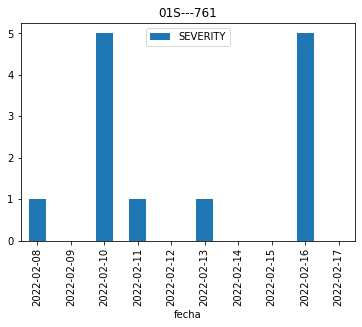

In [915]:
resumenSeries_un[resumenSeries_un['key']=='01S---761'][['SEVERITY']].plot.bar(title='01S---761')

## Dias desde el último evento

In [916]:
resumenSeries

NODEALIAS  CODALARM_2       fecha  SEVERITY                  key
0      - CAMPO AZUL  3229        2022-02-12  1.0       - CAMPO AZUL---3229
1      - CAMPO AZUL  3229        2022-02-17  1.0       - CAMPO AZUL---3229
2      001AC3FF5272  2934        2022-02-16  6.0       001AC3FF5272---2934
3      001AC3FF5272  2934        2022-02-17  6.0       001AC3FF5272---2934
4      012           1012        2022-02-16  6.0       012---1012         
...    ...            ...               ...  ...              ...         
62789  ZVZ           913         2022-02-11  5.0       ZVZ---913          
62790  ZVZ           969         2022-02-11  5.0       ZVZ---969          
62791  ZVZ           975         2022-02-11  5.0       ZVZ---975          
62792  ZVZ           1012        2022-02-16  1.0       ZVZ---1012         
62793  ZVZ           9332        2022-02-11  5.0       ZVZ---9332         

[62794 rows x 5 columns]

In [917]:
df_base=resumenSeries[resumenSeries['fecha']<fecha_ini_etiqueta]

In [918]:
df_ultimo_dia=df_base.groupby('key')[['fecha']].max()

In [919]:
from datetime import date
date.today()

datetime.date(2022, 2, 24)

In [920]:
df_ultimo_dia.dtypes

fecha    object
dtype: object

In [921]:
df_ultimo_dia['dias_ultimo_evento']=fecha_ini_etiqueta-df_ultimo_dia['fecha']

In [922]:
df_ultimo_dia['dias_ultimo_eventoV2']=df_ultimo_dia['dias_ultimo_evento'].astype('timedelta64[D]')

In [923]:
df_ultimo_dia

fecha dias_ultimo_evento  dias_ultimo_eventoV2
key                                                                     
- CAMPO AZUL---3229  2022-02-12 3 days              3.0                 
015---1012           2022-02-14 1 days              1.0                 
01S---761            2022-02-13 2 days              2.0                 
01S---827            2022-02-11 4 days              4.0                 
01S---893            2022-02-11 4 days              4.0                 
...                         ...    ...              ...                 
ZVZ---904            2022-02-11 4 days              4.0                 
ZVZ---913            2022-02-11 4 days              4.0                 
ZVZ---9332           2022-02-11 4 days              4.0                 
ZVZ---969            2022-02-11 4 days              4.0                 
ZVZ---975            2022-02-11 4 days              4.0                 

[25111 rows x 3 columns]

In [924]:
df_ultimo_dia['fecha'].max()

datetime.date(2022, 2, 14)

## Construccion Tabla input

In [925]:
### Etiquetas
X_df=X_df.merge(df_etiquetas[['output']], left_index=True, right_index=True, how='left')
X_df

NODO  code    0    1   2   3   4  output
key                                                                  
- CAMPO AZUL---3229  - CAMPO AZUL  3229 NaN  NaN  NaN NaN NaN  1     
001AC3FF5272---2934  001AC3FF5272  2934 NaN  NaN  NaN NaN NaN  1     
012---1012           012           1012 NaN  NaN  NaN NaN NaN  1     
015---1012           015           1012 NaN  NaN  NaN NaN NaN  0     
01S---761            01S           761   2.0  2.0 NaN NaN NaN  1     
...                  ...            ...  ..   ..   ..  ..  .. ..     
ZVZ---904            ZVZ           904  NaN  NaN  NaN NaN NaN  0     
ZVZ---913            ZVZ           913  NaN  NaN  NaN NaN NaN  0     
ZVZ---9332           ZVZ           9332 NaN  NaN  NaN NaN NaN  0     
ZVZ---969            ZVZ           969  NaN  NaN  NaN NaN NaN  0     
ZVZ---975            ZVZ           975  NaN  NaN  NaN NaN NaN  0     

[33129 rows x 8 columns]

In [926]:
X_df.fillna(0,inplace=True)

In [927]:
### Ultimo día
X_df=X_df.merge(df_ultimo_dia[['dias_ultimo_eventoV2']], left_index=True, right_index=True, how='left')
X_df

NODO  code    0    1    2    3    4  output  \
key                                                                        
- CAMPO AZUL---3229  - CAMPO AZUL  3229  0.0  0.0  0.0  0.0  0.0  1        
001AC3FF5272---2934  001AC3FF5272  2934  0.0  0.0  0.0  0.0  0.0  1        
012---1012           012           1012  0.0  0.0  0.0  0.0  0.0  1        
015---1012           015           1012  0.0  0.0  0.0  0.0  0.0  0        
01S---761            01S           761   2.0  2.0  0.0  0.0  0.0  1        
...                  ...            ...  ...  ...  ...  ...  ... ..        
ZVZ---904            ZVZ           904   0.0  0.0  0.0  0.0  0.0  0        
ZVZ---913            ZVZ           913   0.0  0.0  0.0  0.0  0.0  0        
ZVZ---9332           ZVZ           9332  0.0  0.0  0.0  0.0  0.0  0        
ZVZ---969            ZVZ           969   0.0  0.0  0.0  0.0  0.0  0        
ZVZ---975            ZVZ           975   0.0  0.0  0.0  0.0  0.0  0        

                     dias_ultimo_eventoV2  
key                                        
- CAMPO AZUL---3229  3.0                   
001AC3FF5272---2934 NaN                    
012---1012          NaN                    
015---1012           1.0                   
01S---761            2.0                   
...                  ...                   
ZVZ---904            4.0                   
ZVZ---913            4.0                   
ZVZ---9332           4.0                   
ZVZ---969            4.0                   
ZVZ---975            4.0                   

[33129 rows x 9 columns]

In [928]:
X_df.fillna(1000,inplace=True)

In [929]:
X_df

NODO  code    0    1    2    3    4  output  \
key                                                                        
- CAMPO AZUL---3229  - CAMPO AZUL  3229  0.0  0.0  0.0  0.0  0.0  1        
001AC3FF5272---2934  001AC3FF5272  2934  0.0  0.0  0.0  0.0  0.0  1        
012---1012           012           1012  0.0  0.0  0.0  0.0  0.0  1        
015---1012           015           1012  0.0  0.0  0.0  0.0  0.0  0        
01S---761            01S           761   2.0  2.0  0.0  0.0  0.0  1        
...                  ...            ...  ...  ...  ...  ...  ... ..        
ZVZ---904            ZVZ           904   0.0  0.0  0.0  0.0  0.0  0        
ZVZ---913            ZVZ           913   0.0  0.0  0.0  0.0  0.0  0        
ZVZ---9332           ZVZ           9332  0.0  0.0  0.0  0.0  0.0  0        
ZVZ---969            ZVZ           969   0.0  0.0  0.0  0.0  0.0  0        
ZVZ---975            ZVZ           975   0.0  0.0  0.0  0.0  0.0  0        

                     dias_ultimo_eventoV2  
key                                        
- CAMPO AZUL---3229  3.0                   
001AC3FF5272---2934  1000.0                
012---1012           1000.0                
015---1012           1.0                   
01S---761            2.0                   
...                  ...                   
ZVZ---904            4.0                   
ZVZ---913            4.0                   
ZVZ---9332           4.0                   
ZVZ---969            4.0                   
ZVZ---975            4.0                   

[33129 rows x 9 columns]

In [930]:
# Validacion
X_df.describe()

0             1             2        3        4  \
count  33129.000000  33129.000000  33129.000000  33129.0  33129.0   
mean   0.316701      0.025627      0.000483      0.0      0.0       
std    0.988969      0.253164      0.031076      0.0      0.0       
min    0.000000      0.000000      0.000000      0.0      0.0       
25%    0.000000      0.000000      0.000000      0.0      0.0       
50%    0.000000      0.000000      0.000000      0.0      0.0       
75%    0.000000      0.000000      0.000000      0.0      0.0       
max    6.000000      4.000000      2.000000      0.0      0.0       

             output  dias_ultimo_eventoV2  
count  33129.000000  33129.000000          
mean   0.449304      244.696067            
std    0.497431      426.808904            
min    0.000000      1.000000              
25%    0.000000      2.000000              
50%    0.000000      5.000000              
75%    1.000000      7.000000              
max    1.000000      1000.000000

## Modelo LGBM
* Un modelo por codigo de alarma
* Codigos de alarmas con menos de 20 ejemplos (usar otro metodo de ES)

In [935]:
resumen_dias_code

num_casos
CODALARM_2           
1012        11126    
9332        7943     
969         6967     
2934        5137     
891         5089     
904         3925     
9334        3905     
827         3401     
913         3118     
975         2301     
761         2011     
894         1693     
833         1176     
3304        1017     
893         613      
9333        612      
4           506      
2           410      
3229        285      
981         265      
895         229      
2793        177      
751         159      
13          142      
949         132      
1           103      
839         77       
12          76       
81          25       
3151        25       
9080        21       
3211        20       
4943        19       
411         19       
4656        18       
3160        12       
429         11       
3142        9        
8469        6        
9100        6        
402         6        
8466        1        
9107        1

In [936]:
X_df.describe()

0             1             2        3        4  \
count  33129.000000  33129.000000  33129.000000  33129.0  33129.0   
mean   0.316701      0.025627      0.000483      0.0      0.0       
std    0.988969      0.253164      0.031076      0.0      0.0       
min    0.000000      0.000000      0.000000      0.0      0.0       
25%    0.000000      0.000000      0.000000      0.0      0.0       
50%    0.000000      0.000000      0.000000      0.0      0.0       
75%    0.000000      0.000000      0.000000      0.0      0.0       
max    6.000000      4.000000      2.000000      0.0      0.0       

             output  dias_ultimo_eventoV2  
count  33129.000000  33129.000000          
mean   0.449304      244.696067            
std    0.497431      426.808904            
min    0.000000      1.000000              
25%    0.000000      2.000000              
50%    0.000000      5.000000              
75%    1.000000      7.000000              
max    1.000000      1000.000000

In [937]:
code='2934'
X_df_espe=X_df[X_df['code']==code]
#Si actual = dias ultimo evento 0, no se toma en cuenta
X_df_espe=X_df_espe[X_df_espe['dias_ultimo_eventoV2']>1]
#No se tiene en cuenta series en cero,  estos casos no existiran en la predicción a futuro}
X_df_espe=X_df_espe[X_df_espe[0]>=2]

X_df_espe.set_index('NODO',inplace=True)
X_df_espe=X_df_espe.drop(columns=['code'])
X_df_espe

0    1    2    3    4  output  \
NODO                                                                    
AHU                                   2.0  0.0  0.0  0.0  0.0  1        
ANA                                   3.0  0.0  0.0  0.0  0.0  1        
AVC                                   2.0  0.0  0.0  0.0  0.0  1        
BVI                                   2.0  2.0  0.0  0.0  0.0  1        
HI2                                   2.0  0.0  0.0  0.0  0.0  1        
J2N                                   3.0  0.0  0.0  0.0  0.0  1        
JDS                                   3.0  0.0  0.0  0.0  0.0  1        
JVE                                   3.0  0.0  0.0  0.0  0.0  1        
JZ2                                   2.0  0.0  0.0  0.0  0.0  1        
L1S                                   2.0  0.0  0.0  0.0  0.0  1        
LLS                                   2.0  0.0  0.0  0.0  0.0  1        
MLZ                                   2.0  0.0  0.0  0.0  0.0  1        
MMB                                   2.0  0.0  0.0  0.0  0.0  1        
NODO L1S - SAN CARLOS 1               2.0  0.0  0.0  0.0  0.0  1        
Nodo 2VM - MARLEN 2                   2.0  0.0  0.0  0.0  0.0  1        
Nodo AHU - ATAHUALPA                  3.0  0.0  0.0  0.0  0.0  1        
Nodo ANA - CASTELLANA                 3.0  0.0  0.0  0.0  0.0  1        
Nodo ARA - AURORA                     2.0  0.0  0.0  0.0  0.0  1        
Nodo AVC.AVENIDA COLOMBIA SANTANDER   2.0  0.0  0.0  0.0  0.0  1        
Nodo BVI - VIVERO                     2.0  2.0  0.0  0.0  0.0  1        
Nodo CCS - ACACIAS                    3.0  0.0  0.0  0.0  0.0  1        
Nodo GNT - GAITAN                     2.0  0.0  0.0  0.0  0.0  1        
Nodo J2N - JARDIN 2                   3.0  0.0  0.0  0.0  0.0  1        
Nodo JDS - SAN JUAN DE DIOS           3.0  0.0  0.0  0.0  0.0  1        
Nodo JVE - JAVERIANO                  3.0  0.0  0.0  0.0  0.0  1        
Nodo LLS - LAS LUNAS                  2.0  0.0  0.0  0.0  0.0  1        
Nodo MBO - SUMATAMBO                  2.0  0.0  0.0  0.0  0.0  1        
Nodo MJY - MIJITAYO                   2.0  0.0  0.0  0.0  0.0  1        
Nodo MLZ - MARILUZ                    3.0  0.0  0.0  0.0  0.0  1        
Nodo MMB - MANUEL MARIA BUENAVENTURA  2.0  0.0  0.0  0.0  0.0  1        
Nodo P1D - PANDIACO 1                 4.0  0.0  0.0  0.0  0.0  1        
Nodo QSP - QUINTAS DE SAN PEDRO       3.0  0.0  0.0  0.0  0.0  1        
Nodo S3H - SANTA HELENA 3             4.0  0.0  0.0  0.0  0.0  1        
P1D                                   2.0  2.0  0.0  0.0  0.0  1        
S3H                                   4.0  0.0  0.0  0.0  0.0  1        
SFE                                   3.0  0.0  0.0  0.0  0.0  1        

                                      dias_ultimo_eventoV2  
NODO                                                        
AHU                                   2.0                   
ANA                                   2.0                   
AVC                                   2.0                   
BVI                                   2.0                   
HI2                                   3.0                   
J2N                                   2.0                   
JDS                                   3.0                   
JVE                                   2.0                   
JZ2                                   5.0                   
L1S                                   2.0                   
LLS                                   3.0                   
MLZ                                   2.0                   
MMB                                   2.0                   
NODO L1S - SAN CARLOS 1               2.0                   
Nodo 2VM - MARLEN 2                   2.0                   
Nodo AHU - ATAHUALPA                  2.0                   
Nodo ANA - CASTELLANA                 2.0                   
Nodo ARA - AURORA                     3.0                   
Nodo AVC.AVENIDA COLOMBIA SANTANDER   2.0    

In [938]:
pd.crosstab([X_df_espe[0],X_df_espe[1],X_df_espe[2],X_df_espe[3],X_df_espe[4],X_df_espe['dias_ultimo_eventoV2']],X_df_espe['output'])

output                                     1
0   1   2   3   4   dias_ultimo_eventoV2    
2.0 0.0 0.0 0.0 0.0 2.0                   11
                    3.0                   5 
                    5.0                   1 
    2.0 0.0 0.0 0.0 2.0                   3 
3.0 0.0 0.0 0.0 0.0 2.0                   9 
                    3.0                   4 
4.0 0.0 0.0 0.0 0.0 2.0                   3

<AxesSubplot:title={'center':'Nodo ARA - AURORA---2934'}, xlabel='fecha'>

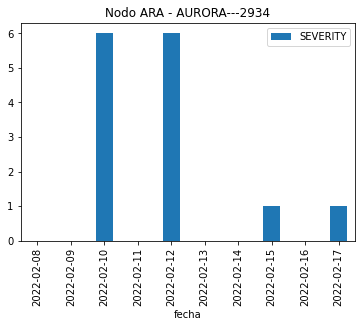

In [944]:
resumenSeries_un[resumenSeries_un['key']=='Nodo ARA - AURORA---2934'][['SEVERITY']].plot.bar(title='Nodo ARA - AURORA---2934')

In [ ]:
resumenSeries_un[resumenSeries_un['key']=='BVI---2934'][['SEVERITY']].plot.bar(title='BVI---2934')

In [940]:
#resumenSeries_un

In [941]:
y_df_espe=X_df_espe.pop('output')
y_df_espe

NODO
AHU                                     1
ANA                                     1
AVC                                     1
BVI                                     1
HI2                                     1
J2N                                     1
JDS                                     1
JVE                                     1
JZ2                                     1
L1S                                     1
LLS                                     1
MLZ                                     1
MMB                                     1
NODO L1S - SAN CARLOS 1                 1
Nodo 2VM - MARLEN 2                     1
Nodo AHU - ATAHUALPA                    1
Nodo ANA - CASTELLANA                   1
Nodo ARA - AURORA                       1
Nodo AVC.AVENIDA COLOMBIA SANTANDER     1
Nodo BVI - VIVERO                       1
Nodo CCS - ACACIAS                      1
Nodo GNT - GAITAN                       1
Nodo J2N - JARDIN 2                     1
Nodo JDS - SAN JUAN DE DIOS  

In [942]:
y_df_espe.value_counts()

1    36
Name: output, dtype: int64

In [756]:
X_df_espe

0    1    2    3    4  dias_ultimo_eventoV2
NODO                                                     
02J         3.0  0.0  0.0  0.0  0.0  2.0                 
05J         3.0  0.0  0.0  0.0  0.0  2.0                 
0PO         3.0  0.0  0.0  0.0  0.0  2.0                 
102D        2.0  0.0  0.0  0.0  0.0  4.0                 
10E         4.0  0.0  0.0  0.0  0.0  2.0                 
...         ...  ...  ...  ...  ...  ...                 
YOPNSOPS01  4.0  0.0  0.0  0.0  0.0  3.0                 
YOPOOLPS01  3.0  0.0  0.0  0.0  0.0  2.0                 
YOPT1EPS01  3.0  0.0  0.0  0.0  0.0  2.0                 
YOPUZMPS01  2.0  0.0  0.0  0.0  0.0  5.0                 
ZDA         2.0  0.0  0.0  0.0  0.0  4.0                 

[347 rows x 6 columns]

In [757]:
#Train Test
X_train, X_test, y_train, y_test = train_test_split(X_df_espe, y_df_espe, test_size = 0.3, random_state = 86, shuffle= True)

In [758]:
#model=LGBMClassifier(n_estimators=500, learning_rate=0.01, reg_alpha=1, reg_lambda=3, objective ='multiclass',is_unbalance=True)
model=LGBMClassifier(n_estimators=1000, learning_rate=0.01, reg_alpha=1, reg_lambda=3)

In [759]:
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='auc', verbose=30, early_stopping_rounds=100)

[30]	training's auc: 0.636795	training's binary_logloss: 0.537627	valid_1's auc: 0.555556	valid_1's binary_logloss: 0.668054
[60]	training's auc: 0.636795	training's binary_logloss: 0.53232	valid_1's auc: 0.555556	valid_1's binary_logloss: 0.666212
[90]	training's auc: 0.636795	training's binary_logloss: 0.528859	valid_1's auc: 0.555556	valid_1's binary_logloss: 0.665673


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.01, n_estimators=1000, reg_alpha=1, reg_lambda=3)

In [760]:
pred_test=model.predict(X_test)
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [761]:
#resumenSeries_un[resumenSeries_un['key']=='NF8---1012'][['SEVERITY']].plot.bar(title='NF8---1012')

In [762]:
y_test.value_counts()

0    69
1    36
Name: output, dtype: int64

In [763]:
X_test

0    1    2    3    4  dias_ultimo_eventoV2
NODO                                                         
VU2             4.0  0.0  0.0  0.0  0.0  2.0                 
SRL             5.0  0.0  0.0  0.0  0.0  2.0                 
FTN13B          3.0  0.0  0.0  0.0  0.0  4.0                 
40J             3.0  0.0  0.0  0.0  0.0  2.0                 
BARTARPS01-VIP  3.0  0.0  0.0  0.0  0.0  4.0                 
...             ...  ...  ...  ...  ...  ...                 
MON20JPS01      3.0  0.0  0.0  0.0  0.0  2.0                 
BST             4.0  0.0  0.0  0.0  0.0  3.0                 
BHP2            2.0  0.0  0.0  0.0  0.0  2.0                 
DUIJGUPS01      2.0  0.0  0.0  0.0  0.0  3.0                 
PALSOJPS02      4.0  0.0  0.0  0.0  0.0  3.0                 

[105 rows x 6 columns]

In [764]:
pred_test.sum()/len(pred_test)

0.0

In [765]:
matrizConfucion = confusion_matrix(y_test, pred_test)
matrizConfucion

array([[69,  0],
       [36,  0]], dtype=int64)

In [766]:
roc_auc_score(y_test, pred_test)

0.5

In [767]:
roc_auc_score(y_train, model.predict(X_train))

0.5

In [768]:
confusion_matrix(y_train, model.predict(X_train))

array([[185,   0],
       [ 57,   0]], dtype=int64)

## Random forest

In [769]:
clf=RandomForestClassifier(n_estimators=100, criterion='entropy')

In [770]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(criterion='entropy')

In [771]:
pred_test=clf.predict(X_test)
pred_test

C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [772]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [105, 82]

In [733]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

0                       0.441316
dias_ultimo_eventoV2    0.427733
1                       0.130950
2                       0.000000
3                       0.000000
4                       0.000000
dtype: float64

In [735]:
roc_auc_score(y_test, pred_test)

0.6947368421052632

In [736]:
confusion_matrix(y_test, pred_test)

array([[15, 10],
       [12, 45]], dtype=int64)

### Loop sobre todos los tipos de Alarmas (más de 20 casos)

In [740]:
resumen_dias_code.reset_index()

CODALARM_2  num_casos
0   1012        11126    
1   9332        7943     
2   969         6967     
3   2934        5137     
4   891         5089     
5   904         3925     
6   9334        3905     
7   827         3401     
8   913         3118     
9   975         2301     
10  761         2011     
11  894         1693     
12  833         1176     
13  3304        1017     
14  893         613      
15  9333        612      
16  4           506      
17  2           410      
18  3229        285      
19  981         265      
20  895         229      
21  2793        177      
22  751         159      
23  13          142      
24  949         132      
25  1           103      
26  839         77       
27  12          76       
28  81          25       
29  3151        25       
30  9080        21       
31  3211        20       
32  4943        19       
33  411         19       
34  4656        18       
35  3160        12       
36  429         11       
37  3142        9        
38  8469        6        
39  9100        6        
40  402         6        
41  8466        1        
42  9107        1

In [794]:
X_df['code'].value_counts()

9332    5765
969     5283
1012    3696
9334    2750
827     2494
904     2382
891     1800
913     1467
894     1236
975     1209
761     1180
2934    579 
893     511 
833     489 
9333    384 
3304    333 
2       222 
4       210 
3229    198 
895     155 
981     140 
2793    123 
751     116 
949     87  
839     75  
12      47  
13      43  
1       42  
3151    20  
411     16  
3160    12  
429     11  
81      11  
4943    9   
3142    8   
3211    7   
402     6   
4656    4   
9080    3   
9100    2   
8469    2   
9107    1   
8466    1   
Name: code, dtype: int64

In [791]:
modelosClass={}
for cod in resumen_dias_code.reset_index()['CODALARM_2']:
    print(cod)
    dicModelo={}
    #preparacion
    code=cod
    X_df_espe=X_df[X_df['code']==str(code)]
    n_reg_ini=len(X_df_espe)    
    #Si actual = dias ultimo evento 0, no se toma en cuenta
    X_df_espe=X_df_espe[X_df_espe['dias_ultimo_eventoV2']>1]
    #No se tiene en cuenta series en cero,  estos casos no existiran en la predicción a futuro}
    X_df_espe=X_df_espe[X_df_espe[0]>=2]

    X_df_espe.set_index('NODO',inplace=True)
    X_df_espe=X_df_espe.drop(columns=['code'])
    #X_df_espe
    y_df_espe=X_df_espe.pop('output')
    #y_df_espe
    ## Validar si tiene más de 20 casos
    print("numReg",len(X_df_espe))
    if len(X_df_espe)>=20:
        #Train Test
        X_train, X_test, y_train, y_test = train_test_split(X_df_espe, y_df_espe, test_size = 0.3, random_state = 86, shuffle= True)        
        #Modelado
        dicModelo['modelo']=RandomForestClassifier(n_estimators=100, criterion='entropy')   
        dicModelo['modelo']=dicModelo['modelo'].fit(X_train,y_train)
        pred_test=dicModelo['modelo'].predict(X_test)
        #metricas
        dicModelo['accuracy']=metrics.accuracy_score(y_test, pred_test)
        if len(np.unique(pred_test))<2:
            dicModelo['auc']=0
        else:
            dicModelo['auc']=roc_auc_score(y_test, pred_test)   
        dicModelo['validacion']=1
    else:
        dicModelo['validacion']=0
    dicModelo['n_reg']=len(X_df_espe)
    dicModelo['n_reg_ini']=n_reg_ini
    # guardar en diccionario general
    modelosClass[cod]=dicModelo

1012
numReg 272


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


9332
numReg 347


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


969
numReg 289


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


2934
numReg 36


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


891
numReg 139


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


904
numReg 134


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


9334
numReg 174


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


827
numReg 151


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


913
numReg 60


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


975
numReg 39


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


761
numReg 53


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


894
numReg 53


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


833
numReg 25


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


3304
numReg 12
893
numReg 16
9333
numReg 30


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


4
numReg 30


C:\ProgramData\Anaconda3\envs\SeriesTiempoInter\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


2
numReg 17
3229
numReg 10
981
numReg 2
895
numReg 7
2793
numReg 7
751
numReg 0
13
numReg 3
949
numReg 2
1
numReg 1
839
numReg 2
12
numReg 4
81
numReg 1
3151
numReg 0
9080
numReg 0
3211
numReg 1
4943
numReg 0
411
numReg 1
4656
numReg 3
3160
numReg 0
429
numReg 0
3142
numReg 0
8469
numReg 0
9100
numReg 0
402
numReg 0
8466
numReg 0
9107
numReg 0


In [792]:
pd.DataFrame.from_dict(modelosClass)[1:].T

accuracy       auc validacion n_reg n_reg_ini
1012  0.731707  0.694737  1          272   3696    
9332  0.666667  0.533816  1          347   5765    
969   0.770115  0.552612  1          289   5283    
2934  1.0       0         1          36    579     
891   0.642857  0.52963   1          139   1800    
904   0.682927  0.604885  1          134   2382    
9334  0.698113  0.607895  1          174   2750    
827   0.782609  0.644444  1          151   2494    
913   0.555556  0.584416  1          60    1467    
975   0.583333  0.5       1          39    1209    
761   0.625     0.666667  1          53    1180    
894   0.75      0.583333  1          53    1236    
833   0.5       0.5       1          25    489     
3304  NaN       NaN       0.0        12.0  333.0   
893   NaN       NaN       0.0        16.0  511.0   
9333  1.0       1.0       1          30    384     
4     1.0       0         1          30    210     
2     NaN       NaN       0.0        17.0  222.0   
3229  NaN       NaN       0.0        10.0  198.0   
981   NaN       NaN       0.0        2.0   140.0   
895   NaN       NaN       0.0        7.0   155.0   
2793  NaN       NaN       0.0        7.0   123.0   
751   NaN       NaN       0.0        0.0   116.0   
13    NaN       NaN       0.0        3.0   43.0    
949   NaN       NaN       0.0        2.0   87.0    
1     NaN       NaN       0.0        1.0   42.0    
839   NaN       NaN       0.0        2.0   75.0    
12    NaN       NaN       0.0        4.0   47.0    
81    NaN       NaN       0.0        1.0   11.0    
3151  NaN       NaN       0.0        0.0   20.0    
9080  NaN       NaN       0.0        0.0   3.0     
3211  NaN       NaN       0.0        1.0   7.0     
4943  NaN       NaN       0.0        0.0   9.0     
411   NaN       NaN       0.0        1.0   16.0    
4656  NaN       NaN       0.0        3.0   4.0     
3160  NaN       NaN       0.0        0.0   12.0    
429   NaN       NaN       0.0        0.0   11.0    
3142  NaN       NaN       0.0        0.0   8.0     
8469  NaN       NaN       0.0        0.0   2.0     
9100  NaN       NaN       0.0        0.0   2.0     
402   NaN       NaN       0.0        0.0   6.0     
8466  NaN       NaN       0.0        0.0   1.0     
9107  NaN       NaN       0.0        0.0   1.0

# Fin LGBM

# Pronostico futuro

#####  Construcción Base

In [1011]:
df_base=resumenSeries_un.copy()
df_base=df_base.reset_index()

In [1012]:
df_distancias_nz=df_base[df_base['SEVERITY']!=0].reset_index()
df_distancias_nz['sig_event']=df_distancias_nz.groupby('key')['index'].shift(periods=-1)
df_distancias_nz['dias_inter_event']=df_distancias_nz['sig_event']-df_distancias_nz['index']
df_distancias_nz

index       fecha                  key  SEVERITY          NODO  code  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229   
1      9       2022-02-17  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229   
2      18      2022-02-16  001AC3FF5272---2934  6.0       001AC3FF5272  2934   
3      19      2022-02-17  001AC3FF5272---2934  6.0       001AC3FF5272  2934   
4      28      2022-02-16  012---1012           6.0       012           1012   
...    ..             ...         ...           ...       ...            ...   
62789  331243  2022-02-11  ZVZ---904            5.0       ZVZ           904    
62790  331253  2022-02-11  ZVZ---913            5.0       ZVZ           913    
62791  331263  2022-02-11  ZVZ---9332           5.0       ZVZ           9332   
62792  331273  2022-02-11  ZVZ---969            5.0       ZVZ           969    
62793  331283  2022-02-11  ZVZ---975            5.0       ZVZ           975    

       sig_event  dias_inter_event  
0      9.0        5.0               
1     NaN        NaN                
2      19.0       1.0               
3     NaN        NaN                
4     NaN        NaN                
...    ..         ..                
62789 NaN        NaN                
62790 NaN        NaN                
62791 NaN        NaN                
62792 NaN        NaN                
62793 NaN        NaN                

[62794 rows x 8 columns]

In [1013]:
distancias_df=df_distancias_nz[df_distancias_nz['dias_inter_event']>1]
distancias_df

index       fecha                  key  SEVERITY          NODO  code  \
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229   
8      40      2022-02-08  01S---761            1.0       01S           761    
10     43      2022-02-11  01S---761            1.0       01S           761    
11     45      2022-02-13  01S---761            1.0       01S           761    
13     50      2022-02-08  01S---827            1.0       01S           827    
...    ..             ...        ...            ...       ...           ...    
62741  331020  2022-02-08  ZS1---9332           4.0       ZS1           9332   
62743  331030  2022-02-08  ZS1---969            5.0       ZS1           969    
62762  331120  2022-02-08  ZTF---9334           4.0       ZTF           9334   
62780  331170  2022-02-08  ZUP---827            1.0       ZUP           827    
62782  331180  2022-02-08  ZUP---9334           1.0       ZUP           9334   

       sig_event  dias_inter_event  
0      9.0        5.0               
8      42.0       2.0               
10     45.0       2.0               
11     48.0       3.0               
13     53.0       3.0               
...     ...       ...               
62741  331028.0   8.0               
62743  331038.0   8.0               
62762  331122.0   2.0               
62780  331172.0   2.0               
62782  331182.0   2.0               

[8740 rows x 8 columns]

In [1014]:
distancias_df=distancias_df.sort_values(['key','fecha'],ascending=False)
distancias_df

index       fecha                  key  SEVERITY          NODO  code  \
62782  331180  2022-02-08  ZUP---9334           1.0       ZUP           9334   
62780  331170  2022-02-08  ZUP---827            1.0       ZUP           827    
62762  331120  2022-02-08  ZTF---9334           4.0       ZTF           9334   
62743  331030  2022-02-08  ZS1---969            5.0       ZS1           969    
62741  331020  2022-02-08  ZS1---9332           4.0       ZS1           9332   
...       ...         ...         ...           ...       ...            ...   
13     50      2022-02-08  01S---827            1.0       01S           827    
11     45      2022-02-13  01S---761            1.0       01S           761    
10     43      2022-02-11  01S---761            1.0       01S           761    
8      40      2022-02-08  01S---761            1.0       01S           761    
0      4       2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229   

       sig_event  dias_inter_event  
62782  331182.0   2.0               
62780  331172.0   2.0               
62762  331122.0   2.0               
62743  331038.0   8.0               
62741  331028.0   8.0               
...         ...   ...               
13     53.0       3.0               
11     48.0       3.0               
10     45.0       2.0               
8      42.0       2.0               
0      9.0        5.0               

[8740 rows x 8 columns]

In [1015]:
distancias_df.drop(columns=['index','sig_event'],inplace=True)
distancias_df.reset_index(drop=True).reset_index()

index       fecha                  key  SEVERITY          NODO  code  \
0     0      2022-02-08  ZUP---9334           1.0       ZUP           9334   
1     1      2022-02-08  ZUP---827            1.0       ZUP           827    
2     2      2022-02-08  ZTF---9334           4.0       ZTF           9334   
3     3      2022-02-08  ZS1---969            5.0       ZS1           969    
4     4      2022-02-08  ZS1---9332           4.0       ZS1           9332   
...  ..             ...         ...           ...       ...            ...   
8735  8735   2022-02-08  01S---827            1.0       01S           827    
8736  8736   2022-02-13  01S---761            1.0       01S           761    
8737  8737   2022-02-11  01S---761            1.0       01S           761    
8738  8738   2022-02-08  01S---761            1.0       01S           761    
8739  8739   2022-02-12  - CAMPO AZUL---3229  1.0       - CAMPO AZUL  3229   

      dias_inter_event  
0     2.0               
1     2.0               
2     2.0               
3     8.0               
4     8.0               
...   ...               
8735  3.0               
8736  3.0               
8737  2.0               
8738  2.0               
8739  5.0               

[8740 rows x 7 columns]

In [1016]:
#base
X_df=resumenSeries_un[['key','NODO','code']].drop_duplicates()
X_df.set_index('key',inplace=True)
X_df

NODO  code
key                                    
- CAMPO AZUL---3229  - CAMPO AZUL  3229
001AC3FF5272---2934  001AC3FF5272  2934
012---1012           012           1012
015---1012           015           1012
01S---761            01S           761 
...                  ...            ...
ZVZ---904            ZVZ           904 
ZVZ---913            ZVZ           913 
ZVZ---9332           ZVZ           9332
ZVZ---969            ZVZ           969 
ZVZ---975            ZVZ           975 

[33129 rows x 2 columns]

In [1017]:
#intervalos
for i in range(0,p_numeroEventos_historia):
    print(i)
    aux_df=distancias_df.groupby(['key']).nth(i)[['dias_inter_event']]
    aux_df.columns=[i]
    X_df=X_df.merge(aux_df[[i]], left_index=True, right_index=True, how='left')

0
1
2
3
4


In [1018]:
#ultimo dia
#df_base=resumenSeries[resumenSeries['fecha']<fecha_ini_etiqueta]
df_base=resumenSeries.copy()
df_ultimo_dia=df_base.groupby('key')[['fecha']].max()
df_ultimo_dia['dias_ultimo_evento']=max_fecha-df_ultimo_dia['fecha']  #cambiar a max_fecha
df_ultimo_dia['dias_ultimo_eventoV2']=df_ultimo_dia['dias_ultimo_evento'].astype('timedelta64[D]')

In [1019]:
#construccion tabla
#union intervalos
X_df.fillna(0,inplace=True)
### Ultimo día
X_df=X_df.merge(df_ultimo_dia[['dias_ultimo_eventoV2']], left_index=True, right_index=True, how='left')
X_df.fillna(1000,inplace=True)

In [1020]:
X_df

NODO  code    0    1    2    3    4  \
key                                                                
- CAMPO AZUL---3229  - CAMPO AZUL  3229  5.0  0.0  0.0  0.0  0.0   
001AC3FF5272---2934  001AC3FF5272  2934  0.0  0.0  0.0  0.0  0.0   
012---1012           012           1012  0.0  0.0  0.0  0.0  0.0   
015---1012           015           1012  0.0  0.0  0.0  0.0  0.0   
01S---761            01S           761   3.0  2.0  2.0  0.0  0.0   
...                  ...            ...  ...  ...  ...  ...  ...   
ZVZ---904            ZVZ           904   0.0  0.0  0.0  0.0  0.0   
ZVZ---913            ZVZ           913   0.0  0.0  0.0  0.0  0.0   
ZVZ---9332           ZVZ           9332  0.0  0.0  0.0  0.0  0.0   
ZVZ---969            ZVZ           969   0.0  0.0  0.0  0.0  0.0   
ZVZ---975            ZVZ           975   0.0  0.0  0.0  0.0  0.0   

                     dias_ultimo_eventoV2  
key                                        
- CAMPO AZUL---3229  0.0                   
001AC3FF5272---2934  0.0                   
012---1012           1.0                   
015---1012           3.0                   
01S---761            1.0                   
...                  ...                   
ZVZ---904            6.0                   
ZVZ---913            6.0                   
ZVZ---9332           6.0                   
ZVZ---969            6.0                   
ZVZ---975            6.0                   

[33129 rows x 8 columns]

### Calculo predicción

In [1021]:
"""
#modelosClass={}
for cod in resumen_dias_code.reset_index()['CODALARM_2']:
    if modelosClass[cod]['validacion']==1:
        X_df_espe=X_df[X_df['code']==str(code)]
        
        
        modelosClass[cod]['modelo'].predict(X_test)
"""

"\n#modelosClass={}\nfor cod in resumen_dias_code.reset_index()['CODALARM_2']:\n    if modelosClass[cod]['validacion']==1:\n        X_df_espe=X_df[X_df['code']==str(code)]\n        \n        \n        modelosClass[cod]['modelo'].predict(X_test)\n"

In [1022]:

#groupedPred=X_df.groupby('key')
#group = groupedPred.get_group(g)

In [1023]:
### val construcción

In [1024]:
### fin val

In [1025]:
#for key,serie in X_df.iterrows():

In [1026]:
#X_df.dt

In [1027]:
X_df[X_df['code']==str(1012)]

NODO  code    0    1    2    3    4  dias_ultimo_eventoV2
key                                                                 
012---1012  012  1012  0.0  0.0  0.0  0.0  0.0  1.0                 
015---1012  015  1012  0.0  0.0  0.0  0.0  0.0  3.0                 
02J---1012  02J  1012  0.0  0.0  0.0  0.0  0.0  4.0                 
037---1012  037  1012  0.0  0.0  0.0  0.0  0.0  7.0                 
064---1012  064  1012  0.0  0.0  0.0  0.0  0.0  7.0                 
...         ...   ...  ...  ...  ...  ...  ...  ...                 
ZN3---1012  ZN3  1012  3.0  0.0  0.0  0.0  0.0  1.0                 
ZRR---1012  ZRR  1012  0.0  0.0  0.0  0.0  0.0  9.0                 
ZS1---1012  ZS1  1012  0.0  0.0  0.0  0.0  0.0  0.0                 
ZSP---1012  ZSP  1012  0.0  0.0  0.0  0.0  0.0  0.0                 
ZVZ---1012  ZVZ  1012  0.0  0.0  0.0  0.0  0.0  1.0                 

[3696 rows x 8 columns]

In [1028]:
X_df['dias_ultimo_eventoV2'].value_counts()

0.0    6117
1.0    4634
2.0    4134
4.0    3516
3.0    3038
9.0    2966
6.0    2567
7.0    2387
8.0    2008
5.0    1762
Name: dias_ultimo_eventoV2, dtype: int64

In [1029]:
finalPrediccionesFuturas = pd.DataFrame()

In [1041]:
i=0
for cod in resumen_dias_code.reset_index()['CODALARM_2']:
    X_df_espe=X_df[X_df['code']==str(cod)] 
    ##marcar los que no tienen pronostico
    print(cod, "tam:",len(X_df_espe))
    #Si actual = dias ultimo evento 0, no se toma en cuenta
    #X_df_espe=X_df_espe[X_df_espe['dias_ultimo_eventoV2']>1]
    X_df_espe['estado']=np.where(X_df_espe['dias_ultimo_eventoV2']>1,'valido','actual')
    #print(cod, "tam:",len(X_df_espe))
    #No se tiene en cuenta series en cero,  estos casos no existiran en la predicción a futuro
    #X_df_espe=X_df_espe[X_df_espe[0]>=2]
    X_df_espe['estado']=np.where(X_df_espe['estado']=='actual','actual',np.where(X_df_espe[0]>=2,'valido','solo un evento'))
    #print(cod, "tam:",len(X_df_espe))
    X_df_espe['class_model']=modelosClass[cod]['validacion']
    
    
    #filtro    
    X_df_espe_class=X_df_espe[(X_df_espe['class_model']==1)&(X_df_espe['estado']=='valido')]
    X_df_espe_actual=X_df_espe[(X_df_espe['class_model']==1)&(X_df_espe['estado']!='valido')]
    X_df_espe_reg=X_df_espe[X_df_espe['class_model']!=1]    
    
    
    if len(X_df_espe_class)>0:
        X_df_espe_class['prediccion']=modelosClass[cod]['modelo'].predict(X_df_espe_class.drop(columns=['NODO','code','class_model','estado']))
        #print(X_df_espe_class)
        #print(modelosClass[cod]['modelo'].predict_proba(X_df_espe_class.drop(columns=['NODO','code','class_model','estado','prediccion']))) 
        X_df_espe_class['probabilidad']=1-modelosClass[cod]['modelo'].predict_proba(X_df_espe_class.drop(columns=['NODO','code','class_model','estado','prediccion']))[:,0]     
    
    if len(X_df_espe_actual)>0:
        X_df_espe_actual['prediccion']=np.where(X_df_espe_actual['estado']=='actual',1,0)
        X_df_espe_actual['probabilidad']=np.where(X_df_espe_actual['estado']=='actual',1,0)        
        X_df_espe_actual['prediccion']=np.where(X_df_espe_actual['estado']=='solo un evento',0,X_df_espe_actual['prediccion'])
        X_df_espe_actual['probabilidad']=np.where(X_df_espe_actual['estado']=='solo un evento',0,X_df_espe_actual['probabilidad'])
        
    if len(X_df_espe_reg)>0:
        #X_df_espe_reg['prediccion']=int(X_df_espe_reg.drop(columns=['NODO','code','class_model','estado','dias_ultimo_eventoV2']).apply(lambda row: add(row), axis=1)[0])
        X_df_espe_reg['prediccion']=int(X_df_espe_reg.drop(columns=['NODO','code','class_model','estado','dias_ultimo_eventoV2']).apply(lambda row: pred_reg(row.values), axis=1)[0])
        X_df_espe_reg['prediccion']=np.where(X_df_espe_reg['prediccion']<=X_df_espe_reg['dias_ultimo_eventoV2'],0,X_df_espe_reg['prediccion'])
        X_df_espe_reg['probabilidad']=0.2    
    
    if i==0:
        finalPrediccionesFuturas=X_df_espe_class.copy()
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(X_df_espe_reg.copy())
        i=i+1
    else :
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(X_df_espe_class.copy())
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(X_df_espe_reg.copy())    

1012 tam: 3696
9332 tam: 5765
969 tam: 5283
2934 tam: 579
891 tam: 1800
904 tam: 2382
9334 tam: 2750
827 tam: 2494
913 tam: 1467
975 tam: 1209
761 tam: 1180
894 tam: 1236
833 tam: 489
3304 tam: 333
893 tam: 511
9333 tam: 384
4 tam: 210
2 tam: 222
3229 tam: 198
981 tam: 140
895 tam: 155
2793 tam: 123
751 tam: 116
13 tam: 43
949 tam: 87
1 tam: 42
839 tam: 75
12 tam: 47
81 tam: 11
3151 tam: 20
9080 tam: 3
3211 tam: 7
4943 tam: 9
411 tam: 16
4656 tam: 4
3160 tam: 12
429 tam: 11
3142 tam: 8
8469 tam: 2
9100 tam: 2
402 tam: 6
8466 tam: 1
9107 tam: 1


In [1007]:
### Validación Reg
def pred_reg(X):
    model = SimpleExpSmoothing(X)
    model=model.fit(smoothing_level=.5)
    return model.forecast(1)

In [1039]:
X_df_espe_reg

NODO  code    0    1    2    3    4  \
key                                                            
0AC---3304         0AC         3304  0.0  0.0  0.0  0.0  0.0   
0AN---3304         0AN         3304  0.0  0.0  0.0  0.0  0.0   
0AS---3304         0AS         3304  0.0  0.0  0.0  0.0  0.0   
0CP---3304         0CP         3304  2.0  0.0  0.0  0.0  0.0   
0LQ---3304         0LQ         3304  8.0  0.0  0.0  0.0  0.0   
...                ...          ...  ...  ...  ...  ...  ...   
YMA---3304         YMA         3304  0.0  0.0  0.0  0.0  0.0   
YUMGBCPS01---3304  YUMGBCPS01  3304  0.0  0.0  0.0  0.0  0.0   
YUMQPNPS01---3304  YUMQPNPS01  3304  0.0  0.0  0.0  0.0  0.0   
YUMYB1PS02---3304  YUMYB1PS02  3304  0.0  0.0  0.0  0.0  0.0   
ZIPDRLPS01---3304  ZIPDRLPS01  3304  0.0  0.0  0.0  0.0  0.0   

                   dias_ultimo_eventoV2          estado  class_model  
key                                                                   
0AC---3304         0.0                   actual          0            
0AN---3304         0.0                   actual          0            
0AS---3304         0.0                   actual          0            
0CP---3304         4.0                   valido          0            
0LQ---3304         0.0                   actual          0            
...                ...                      ...         ..            
YMA---3304         1.0                   actual          0            
YUMGBCPS01---3304  2.0                   solo un evento  0            
YUMQPNPS01---3304  9.0                   solo un evento  0            
YUMYB1PS02---3304  9.0                   solo un evento  0            
ZIPDRLPS01---3304  0.0                   actual          0            

[333 rows x 10 columns]

In [1042]:
finalPrediccionesFuturas

NODO  code    0  \
key                                                                         
0SD---1012                         0SD                          1012  4.0   
11B1---1012                        11B1                         1012  3.0   
14A12D---1012                      14A12D                       1012  5.0   
1BQ12D---1012                      1BQ12D                       1012  3.0   
1EZ---1012                         1EZ                          1012  7.0   
...                                   ...                        ...  ...   
NODO TB1. - TIBABITA I---402       NODO TB1. - TIBABITA I       402   0.0   
NODO VJ1,VJ12D,VJ13D,VJ14D.---402  NODO VJ1,VJ12D,VJ13D,VJ14D.  402   0.0   
SG4000 19D25D---402                SG4000 19D25D                402   0.0   
17 MaxNetII MPRF-BH---8466         17 MaxNetII MPRF-BH          8466  0.0   
17 MaxNetII MPRF-BH---9107         17 MaxNetII MPRF-BH          9107  0.0   

                                     1    2    3    4  dias_ultimo_eventoV2  \
key                                                                           
0SD---1012                         0.0  0.0  0.0  0.0  4.0                    
11B1---1012                        0.0  0.0  0.0  0.0  5.0                    
14A12D---1012                      0.0  0.0  0.0  0.0  2.0                    
1BQ12D---1012                      0.0  0.0  0.0  0.0  4.0                    
1EZ---1012                         0.0  0.0  0.0  0.0  2.0                    
...                                ...  ...  ...  ...  ...                    
NODO TB1. - TIBABITA I---402       0.0  0.0  0.0  0.0  9.0                    
NODO VJ1,VJ12D,VJ13D,VJ14D.---402  0.0  0.0  0.0  0.0  7.0                    
SG4000 19D25D---402                0.0  0.0  0.0  0.0  9.0                    
17 MaxNetII MPRF-BH---8466         0.0  0.0  0.0  0.0  9.0                    
17 MaxNetII MPRF-BH---9107         0.0  0.0  0.0  0.0  9.0                    

                                           estado  class_model  prediccion  \
key                                                                          
0SD---1012                         valido          1            0.0          
11B1---1012                        valido          1            0.0          
14A12D---1012                      valido          1            1.0          
1BQ12D---1012                      valido          1            0.0          
1EZ---1012                         valido          1            1.0          
...                                   ...         ..            ...          
NODO TB1. - TIBABITA I---402       solo un evento  0            0.0          
NODO VJ1,VJ12D,VJ13D,VJ14D.---402  solo un evento  0            0.0          
SG4000 19D25D---402                solo un evento  0            0.0          
17 MaxNetII MPRF-BH---8466         solo un evento  0            0.0          
17 MaxNetII MPRF-BH---9107         solo un evento  0            0.0          

                                   probabilidad  
key                                              
0SD---1012                         0.260252      
11B1---1012                        0.298775      
14A12D---1012                      0.648302      
1BQ12D---1012                      0.276706      
1EZ---1012                         0.648302      
...                                     ...      
NODO TB1. - TIBABITA I---402       0.200000      
NODO VJ1,VJ12D,VJ13D,VJ14D.---402  0.200000      
SG4000 19D25D---402                0.200000      
17 MaxNetII MPRF-BH---8466         0.200000      
17 MaxNetII MPRF-BH---9107         0.200000      

[5026 rows x 12 columns]

In [998]:
finalPrediccionesFuturas['prediccion'].value_counts()

0.0    2236
1.0    585 
Name: prediccion, dtype: int64

In [999]:
finalPrediccionesFuturas['estado'].value_counts()

valido            2961
solo un evento    1340
actual            725 
Name: estado, dtype: int64

In [1000]:
pd.crosstab(finalPrediccionesFuturas['prediccion'],finalPrediccionesFuturas['estado'])

estado      valido
prediccion        
0.0         2236  
1.0         585

In [ ]:
## Prediccion casos extremos,  actual o solo un caso

In [1001]:
finalPrediccionesFuturas['prediccion']=np.where(finalPrediccionesFuturas['estado']=='actual',1,finalPrediccionesFuturas['prediccion'])
finalPrediccionesFuturas['probabilidad']=np.where(finalPrediccionesFuturas['estado']=='actual',1,finalPrediccionesFuturas['probabilidad'])

In [1002]:
finalPrediccionesFuturas['prediccion']=np.where(finalPrediccionesFuturas['estado']=='solo un evento',0,finalPrediccionesFuturas['prediccion'])
finalPrediccionesFuturas['probabilidad']=np.where(finalPrediccionesFuturas['estado']=='solo un evento',0,finalPrediccionesFuturas['probabilidad'])

In [1043]:
finalPrediccionesFuturas[finalPrediccionesFuturas['prediccion'].isnull()]

Empty DataFrame
Columns: [NODO, code, 0, 1, 2, 3, 4, dias_ultimo_eventoV2, estado, class_model, prediccion, probabilidad]
Index: []

### fin prediccion a futuro

In [723]:
grouped =resumenSeries_un.groupby('key')

In [ ]:
## Validacion
g='BOG3TFPS02--1012'
group = grouped.get_group(g) 
group

### ETS
* necesita más de 10 observaciones

In [ ]:
num_start=len(group['SEVERITY'])
#perPred=len(groupTest['MARCACIONES'])
perPred=5
periodos = 30 if int(num_start/2)>30 else (15 if int(num_start/2)>15 else int(num_start/2))
model = ETSModel(group['SEVERITY'].astype(float),seasonal_periods=periodos ,error="add",trend="add",seasonal="add", damped_trend=True,)
model = model.fit()

# Prophet

In [ ]:
model = Prophet()

In [ ]:
model.fit(group['SEVERITY'])

In [ ]:
forecast = model.predict(future)

## Croston 1

In [ ]:
fit_pred_croston = croston.fit_croston(group['SEVERITY'],10,'original')

In [ ]:
fit_pred_croston

In [ ]:
fit_pred_croston['croston_forecast']

# Croston 1.2. SBA

In [ ]:
fit_pred_croston = croston.fit_croston(group['SEVERITY'],10,'sba')

In [ ]:
fit_pred_croston['croston_forecast']

# Croston 1.2. SBJ

In [ ]:
fit_pred_croston = croston.fit_croston(group['SEVERITY'],10,'sbj')

In [ ]:
fit_pred_croston['croston_forecast']

# Croston 2

In [ ]:
#x=data series
#h=numer of periods to forecast
#alpha=simple exponential smoothing parameter

def croston_func(x,h,alpha=np.nan):
    
    print(alpha)
    
    if np.isnan(alpha):
        #print("validacion nan")  
        alpha=0.1
    y= x[x!=0].reset_index().reset_index()
    y['a'] = y['index'] - y['index'].shift(1)
    y.drop('index', axis=1, inplace=True)
    y= y.bfill()

    #fitteing simple exponential smoothing 

    #fit_non_zero=SimpleExpSmoothing(y.iloc[:,0]).fit(smoothing_level=alpha,optimized=False)
    #print("antes")
    #print(y['SEVERITY'])
    #print("alfa: ", alpha)
    fit_non_zero=SimpleExpSmoothing(y['SEVERITY']).fit(smoothing_level=alpha,optimized=False)
    #print("h: ",h)
    #print("prediccion:",fit_non_zero.forecast(h))

    #fit_inter_arrival=SimpleExpSmoothing(y.iloc[:,1]).fit(smoothing_level=alpha,optimized=False)
    fit_inter_arrival=SimpleExpSmoothing(y['a']).fit(smoothing_level=alpha,optimized=False)
    #fitted values for non-zero and interarrival time.

    non_zero_fitted=fit_non_zero.fittedvalues
    inter_arrival_fitted=fit_inter_arrival.fittedvalues
    final_predict=non_zero_fitted/inter_arrival_fitted

    # forecast values for h periods

    forecast_q=fit_non_zero.forecast(h)
    #print("forecast_q")
    #print(forecast_q)
    forecast_a=fit_inter_arrival.forecast(h)
    #print("forecast_a")
    #print(forecast_a)
    final_forecast=forecast_q/forecast_a
    return(final_forecast,final_predict)

In [ ]:
(p1,p2) =croston_func(group['SEVERITY'],10)

In [ ]:
p1

In [ ]:
p2

# Redes neuronales
*https://towardsdatascience.com/temporal-loops-intro-to-recurrent-neural-networks-for-time-series-forecasting-in-python-b0398963dc1f

In [ ]:
import statsmodels
print(statsmodels.__version__)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import torch.optim as optim
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, Theta
from darts.metrics import mape, rmse, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import SunspotsDataset, AirPassengersDataset

In [ ]:
import sys
import time
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [ ]:
FC_N = 36               #forecast periods
FC_STRIDE = 10
FC_START = "19590101"

In [ ]:
EPOCH = 50       # for testing or debugging, rather than real forecasts, 
                  # set EPOCH to a low value like 3; for the real deal: 300 
                  # 300 will take as much as 30 - 50 minutes of processing time

In [ ]:
## load data
ts = AirPassengersDataset().load()

series = ts  
df = ts.pd_dataframe()
df

In [ ]:
plt.figure(100, figsize=(12,5))
series.plot()

In [ ]:
# analyze its seasonality

is_seasonal, periodicity = check_seasonality(ts, max_lag=240)
dict_seas ={
    "is seasonal?":is_seasonal, 
    "periodicity (months)":f'{periodicity:.1f}', 
    "periodicity (~years)": f'{periodicity/12:.1f}'}
_ = [print(k,":",v) for k,v in dict_seas.items()]

In [ ]:
plot_acf(ts, periodicity, max_lag=100)

In [ ]:
# split training vs test dataset
train, val = ts.split_after(pd.Timestamp(FC_START))

In [ ]:
# normalize the time series

trf = Scaler()
# fit the transformer to the training dataset
train_trf = trf.fit_transform(train)
# apply the transformer to the validation set and the complete series 
val_trf = trf.transform(val)
ts_trf = trf.transform(ts)

In [ ]:
type(ts_trf)

In [ ]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(
    pd.date_range(start=series.start_time(), 
        freq=ts.freq_str, 
        periods=1000),
    attribute='year', 
    one_hot=False)
year_series = Scaler().fit_transform(year_series)

month_series = datetime_attribute_timeseries(
    year_series, 
    attribute='month', 
    one_hot=True)

covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp(FC_START))

In [ ]:
type(cov_train)

In [ ]:
#set up, fit, run, plot, and evaluate the RNN model

def run_RNN(flavor, ts, train, val):

    # set the model up
    model_RNN = RNNModel(
        model=flavor,
        model_name=flavor + str(" RNN"),
        input_chunk_length=periodicity,
        training_length=20,
        hidden_dim=20,
        batch_size=16,
        n_epochs=EPOCH,
        dropout=0,
        optimizer_kwargs={'lr': 1e-3},
        log_tensorboard=True,
        random_state=42,
        force_reset=True)
        
    if flavor == "RNN": flavor = "Vanilla" 

    # fit the model
    fit_it(model_RNN, train, val, flavor)

    # compute N predictions
    pred = model_RNN.predict(n=FC_N, future_covariates=covariates) 

    # plot predictions vs actual
    plot_fitted(pred, ts, flavor)

    # print accuracy metrics
    res_acc = accuracy_metrics(pred, ts)    
    print(flavor + " : ")
    _ = [print(k,":",f'{v:.4f}') for k,v in res_acc.items()]

    return [pred, res_acc]

In [ ]:
# helper function: fit the RNN model

def fit_it(model, train, val, flavor):
    t_start =  time.perf_counter()
    print("\nbeginning the training of the {0} RNN:".format(flavor))

    res = model.fit(train,
             future_covariates=covariates,
             val_series=val,
             val_future_covariates=covariates,
             verbose=True)

    res_time = time.perf_counter() - t_start
    print("training of the {0} RNN has completed:".format(flavor), f'{res_time:.2f} sec')

    return res

In [ ]:
# helper function: plot the predictions

def plot_fitted(pred, act, flavor):
    plt.figure(figsize=(12,5))
    act.plot(label='actual')
    pred.plot(label='prediction')
    plt.title("RNN: {0} flavor".format(flavor) + ' | MAPE: {:.2f}%'.format(mape(pred, act)))
    plt.legend();

In [ ]:
# helper function: compute accuracy metrics
   
def accuracy_metrics(pred, act):
    act2 = act.slice_intersect(pred)
    pred2 = pred.slice_intersect(act2)
    resid = pred2 - act2
    sr = resid.pd_series()
    sa = act2.pd_series()
    sp = pred2.pd_series()
    res_mape = mape(pred2, act2)
    res_r2 = r2_score(pred2, act2)
    res_rmse = rmse(pred2, act2)
    res_pe = sr / sa
    n_act = len(act2)
    res_rmspe = np.sqrt(np.sum(res_pe**2) / n_act)    # root mean square percentage error
    res_std = np.std(sr)                               # std error of the model = std deviation of the noise
    res_se = res_std / np.sqrt(n_act)                  # std error in estimating the mean
    res_sefc = np.sqrt(res_std + res_se**2)            # std error of the forecast
    
    res_accuracy = {
        "MAPE":res_mape,"RMSPE":res_rmspe, "RMSE":res_rmse, 
        "-R squared":-res_r2, "se": res_sefc}
    return res_accuracy

In [ ]:
# run 3 different flavors of RNN on the time series:
flavors = ["LSTM", "GRU", "RNN"]

# call the RNN model setup for each of the 3 RNN flavors
res_flavors = [run_RNN(flv, ts_trf, train_trf, val_trf) for flv in flavors]

In [ ]:
# Theta forecaster

# search space for best theta value: check 100 alternatives
thetas = 2 - np.linspace(-10, 10, 100)

# initialize search
best_mape = float('inf')
best_theta = 0
t_start =  time.perf_counter()
# search for best theta among 100 values, as measured by MAPE
for theta in thetas:
    model = Theta(theta)
    res = model.fit(train)
    pred_theta = model.predict(len(val))
    res_mape = mape(val, pred_theta)
    if res_mape < best_mape:
        best_mape = res_mape
        best_theta = theta


# fit the model
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred = best_theta_model.predict(len(val))

# review the Theta results
plt.figure(figsize=(12,5))
train.plot(label='actual: training set')
val.plot(label='actual: validation set')
pred.plot(label='Theta predictions')
plt.title("Theta: {0}".format(best_theta) + ' | MAPE: {:.2f}%'.format(mape(pred, val)))
plt.legend();

res_time = time.perf_counter() - t_start
res_acc = accuracy_metrics(pred, val)
print("Theta forecast has completed: ", f'{res_time:.2f} sec')
_ = [print(k,":",f'{v:.4f}') for k,v in res_acc.items()]
results = [pred, res_acc]

In [ ]:

# collect the forecasters's accuracy metrics in a dataframe

dict_models = {"LSTM":res_flavors[0][1], "GRU":res_flavors[1][1],
    "Vanilla":res_flavors[2][1], "Theta":res_acc}
df_acc = pd.DataFrame.from_dict(dict_models, orient="index").T
pd.set_option("display.precision",3)
df_acc.style.highlight_min(color="lightgreen", axis=1).highlight_max(color="yellow", axis=1)

In [ ]:
#TSB

In [ ]:
#Gluon

* https://github.com/manujosephv/deeprenewalprocess
* https://deep-and-shallow.com/2020/10/13/intermittent-demand-forecasting-with-deep-renewal-processes/

In [ ]:
from deeprenewal import get_dataset

In [ ]:

from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer

In [ ]:
### Fin validacion

In [ ]:
metodos=['ETS']

In [ ]:
numeroNodos=100

In [ ]:
i=0
iNodo=0
for g in grouped.groups:
    #print(g)
    if iNodo<numeroNodos:
    #if  iNodo>=6000:         
        if iNodo%1000==0:
            print(iNodo,g) 
        dicNodo={} 
        dicAuxMetodo={}
        group = grouped.get_group(g) 
        groupTest = groupedTest.get_group(g)
            
        for metodo in metodos:    
            if metodo== 'ETS': 
                num_start=len(group['Value'])
                perPred=len(groupTest['MARCACIONES'])
                periodos = 30 if int(num_start/2)>30 else (15 if int(num_start/2)>15 else int(num_start/2))         
                               
                model = ETSModel(group['Value'].astype(float),seasonal_periods=periodos ,error="add",trend="add",seasonal="add", damped_trend=True,)
                model = model.fit()                
                forecast = pd.DataFrame(model.get_prediction(start=num_start, end=num_start+perPred-1).summary_frame(alpha=0.05)['mean'],index=groupTest.index)
            forecast.columns = ['pred']  
            forecast['Nodo']=g
            forecast['Metodo']=metodo
            if i==0:
                final=forecast
            else:
                final=final.append(forecast)     

            if len(groupTest['Value'])==3:
                #print(1)
                try:
                    RMSE=mean_squared_error(groupTest['Value'].values,forecast['pred'], squared=False)
                    MAPE=mean_absolute_percentage_error(groupTest['Value'].values,forecast['pred'])
                except:
                    RMSE=1000
                    MAPE=1000
            else :
                #print(2)
                tempTest=groupTest.copy()
                tempTest['pred2']=forecast['pred']   
                RMSE=mean_squared_error(tempTest['Value'].values,tempTest['pred2'].values, squared=False)
                MAPE=mean_absolute_percentage_error(tempTest['Value'].values,tempTest['pred2'].values)
            # Errores
            ## Medicion varios errores, seleccionar el que mejor se ajuste
            #RMSE=mean_squared_error(groupTest['Value'],forecast['pred'], squared=False)
            #MAPE=mean_absolute_percentage_error(groupTest['Value'],forecast['pred'])    
            dicNodo[metodo]=RMSE 
            i=i+1
        finalErrores[g]=dicNodo

    iNodo=iNodo+1